# 1、import data

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

features_train = pd.read_csv('features_train.csv')
features_val = pd.read_csv('features_val.csv')
features_test = pd.read_csv('features_test.csv')
labels_train = pd.read_csv('labels_train.csv', header=None)[1]
labels_val = pd.read_csv('labels_val.csv', header=None)[1]

D:\Anaconda\envs\py3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 2、handle data

In [2]:
features_train = features_train.drop(['shop_id'], axis=1)
features_val = features_val.drop(['shop_id'], axis=1)
features_test = features_test.drop(['shop_id'], axis=1)

In [3]:
features = pd.concat([features_train, features_val]).reset_index(drop=True)
labels = pd.concat([labels_train, labels_val]).reset_index(drop=True)

In [5]:
features = features.apply(lambda x: np.log(x+1))
columns = features.columns
from sklearn.preprocessing import MinMaxScaler
features[columns] = MinMaxScaler().fit_transform(features[columns])

features_test = features_test.apply(lambda x: np.log(x+1))
features_test[columns] = MinMaxScaler().fit_transform(features_test[columns])

In [8]:
from sklearn.cross_validation import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

# 3、train & predict

In [9]:
dataset_train = xgb.DMatrix(X_train,y_train)
dataset_val = xgb.DMatrix(X_test,y_test)
dataset_test = xgb.DMatrix(features_test)

In [11]:
# 评价函数
def wmae(ground_truth, predictions):
    return abs(predictions-ground_truth).sum()/float(ground_truth.sum())
def wmae_xgb(ground_truth, predictions):
    predictions = predictions.get_label()
    return 'wmae', abs(predictions-ground_truth).sum()/float(ground_truth.sum())

In [12]:
def plot_results(results, para_name):
    paras = results.keys()
    x = range(1, len(paras)+1)
    y = []
    for key in paras:
        y.append(results[key]['wmae'])
    
    plt.figure()
    plt.plot(x,y)
    plt.xlabel('{}'.format(para_name), fontsize=14)
    plt.ylabel('wmae)', fontsize=14)
    plt.xticks(x, paras, rotation=10, fontsize=10)
    plt.title('wmae for different {}'.format(para_name), fontsize=16)
    plt.show()

**[Davut tuning](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/discussion/19083)**





running while depth = 8
[0]	val-wmae:0.687829	train-wmae:0.683739
Multiple eval metrics have been passed: 'train-wmae' will be used for early stopping.

Will train until train-wmae hasn't improved in 300 rounds.
[1]	val-wmae:0.56253	train-wmae:0.556959
[2]	val-wmae:0.523088	train-wmae:0.514638
[3]	val-wmae:0.498732	train-wmae:0.487324
[4]	val-wmae:0.479476	train-wmae:0.465044
[5]	val-wmae:0.464061	train-wmae:0.446705
[6]	val-wmae:0.451753	train-wmae:0.431296
[7]	val-wmae:0.441772	train-wmae:0.418268
[8]	val-wmae:0.433877	train-wmae:0.407242
[9]	val-wmae:0.427677	train-wmae:0.397917
[10]	val-wmae:0.422617	train-wmae:0.390026
[11]	val-wmae:0.418473	train-wmae:0.38325
[12]	val-wmae:0.4152	train-wmae:0.377576
[13]	val-wmae:0.412533	train-wmae:0.372731
[14]	val-wmae:0.410468	train-wmae:0.368686
[15]	val-wmae:0.408771	train-wmae:0.365199
[16]	val-wmae:0.407462	train-wmae:0.362262
[17]	val-wmae:0.406367	train-wmae:0.359726
[18]	val-wmae:0.405525	train-wmae:0.357561
[19]	val-wmae:0.404848	

[186]	val-wmae:0.37595	train-wmae:0.317841
[187]	val-wmae:0.375883	train-wmae:0.317777
[188]	val-wmae:0.375819	train-wmae:0.317716
[189]	val-wmae:0.375756	train-wmae:0.317656
[190]	val-wmae:0.37569	train-wmae:0.317594
[191]	val-wmae:0.375628	train-wmae:0.317533
[192]	val-wmae:0.375566	train-wmae:0.317473
[193]	val-wmae:0.375505	train-wmae:0.317414
[194]	val-wmae:0.375446	train-wmae:0.317358
[195]	val-wmae:0.375384	train-wmae:0.317298
[196]	val-wmae:0.375325	train-wmae:0.317241
[197]	val-wmae:0.375266	train-wmae:0.317184
[198]	val-wmae:0.375206	train-wmae:0.317127
[199]	val-wmae:0.37515	train-wmae:0.317073
[200]	val-wmae:0.37509	train-wmae:0.317016
[201]	val-wmae:0.375032	train-wmae:0.316962
[202]	val-wmae:0.374977	train-wmae:0.316909
[203]	val-wmae:0.37493	train-wmae:0.316866
[204]	val-wmae:0.374859	train-wmae:0.316801
[205]	val-wmae:0.3748	train-wmae:0.316744
[206]	val-wmae:0.374757	train-wmae:0.316703
[207]	val-wmae:0.37469	train-wmae:0.316642
[208]	val-wmae:0.374633	train-wmae:0.316

[374]	val-wmae:0.368971	train-wmae:0.311287
[375]	val-wmae:0.36895	train-wmae:0.311267
[376]	val-wmae:0.368928	train-wmae:0.311246
[377]	val-wmae:0.368909	train-wmae:0.311229
[378]	val-wmae:0.368889	train-wmae:0.311209
[379]	val-wmae:0.368868	train-wmae:0.31119
[380]	val-wmae:0.368848	train-wmae:0.311171
[381]	val-wmae:0.368827	train-wmae:0.311152
[382]	val-wmae:0.368807	train-wmae:0.311133
[383]	val-wmae:0.368789	train-wmae:0.311116
[384]	val-wmae:0.368768	train-wmae:0.311097
[385]	val-wmae:0.368748	train-wmae:0.311078
[386]	val-wmae:0.368727	train-wmae:0.311059
[387]	val-wmae:0.368708	train-wmae:0.31104
[388]	val-wmae:0.368689	train-wmae:0.311022
[389]	val-wmae:0.36867	train-wmae:0.311004
[390]	val-wmae:0.368652	train-wmae:0.310987
[391]	val-wmae:0.368631	train-wmae:0.310968
[392]	val-wmae:0.368611	train-wmae:0.31095
[393]	val-wmae:0.368594	train-wmae:0.310933
[394]	val-wmae:0.368574	train-wmae:0.310914
[395]	val-wmae:0.368557	train-wmae:0.310897
[396]	val-wmae:0.368537	train-wmae:0.

[562]	val-wmae:0.366261	train-wmae:0.308743
[563]	val-wmae:0.36625	train-wmae:0.308733
[564]	val-wmae:0.36624	train-wmae:0.308723
[565]	val-wmae:0.366231	train-wmae:0.308714
[566]	val-wmae:0.366222	train-wmae:0.308705
[567]	val-wmae:0.366213	train-wmae:0.308697
[568]	val-wmae:0.366202	train-wmae:0.308686
[569]	val-wmae:0.366192	train-wmae:0.308677
[570]	val-wmae:0.366183	train-wmae:0.308668
[571]	val-wmae:0.366172	train-wmae:0.308658
[572]	val-wmae:0.366165	train-wmae:0.30865
[573]	val-wmae:0.366155	train-wmae:0.30864
[574]	val-wmae:0.366146	train-wmae:0.308632
[575]	val-wmae:0.366138	train-wmae:0.308624
[576]	val-wmae:0.366127	train-wmae:0.308614
[577]	val-wmae:0.366116	train-wmae:0.308604
[578]	val-wmae:0.366108	train-wmae:0.308596
[579]	val-wmae:0.366098	train-wmae:0.308586
[580]	val-wmae:0.36609	train-wmae:0.308579
[581]	val-wmae:0.366079	train-wmae:0.308568
[582]	val-wmae:0.366071	train-wmae:0.30856
[583]	val-wmae:0.366062	train-wmae:0.308551
[584]	val-wmae:0.366053	train-wmae:0.3

[750]	val-wmae:0.364957	train-wmae:0.307388
[751]	val-wmae:0.36495	train-wmae:0.307381
[752]	val-wmae:0.364947	train-wmae:0.307377
[753]	val-wmae:0.364942	train-wmae:0.307371
[754]	val-wmae:0.364937	train-wmae:0.307366
[755]	val-wmae:0.364931	train-wmae:0.30736
[756]	val-wmae:0.364926	train-wmae:0.307355
[757]	val-wmae:0.364922	train-wmae:0.30735
[758]	val-wmae:0.364918	train-wmae:0.307345
[759]	val-wmae:0.364912	train-wmae:0.307339
[760]	val-wmae:0.364908	train-wmae:0.307334
[761]	val-wmae:0.364904	train-wmae:0.307329
[762]	val-wmae:0.364899	train-wmae:0.307323
[763]	val-wmae:0.364894	train-wmae:0.307318
[764]	val-wmae:0.364889	train-wmae:0.307313
[765]	val-wmae:0.364884	train-wmae:0.307308
[766]	val-wmae:0.364879	train-wmae:0.307302
[767]	val-wmae:0.364874	train-wmae:0.307296
[768]	val-wmae:0.364873	train-wmae:0.307294
[769]	val-wmae:0.364867	train-wmae:0.307287
[770]	val-wmae:0.364862	train-wmae:0.307283
[771]	val-wmae:0.364856	train-wmae:0.307277
[772]	val-wmae:0.364851	train-wmae:

[938]	val-wmae:0.364234	train-wmae:0.306581
[939]	val-wmae:0.364231	train-wmae:0.306577
[940]	val-wmae:0.364228	train-wmae:0.306574
[941]	val-wmae:0.364225	train-wmae:0.30657
[942]	val-wmae:0.364222	train-wmae:0.306566
[943]	val-wmae:0.364219	train-wmae:0.306563
[944]	val-wmae:0.364217	train-wmae:0.306559
[945]	val-wmae:0.364213	train-wmae:0.306556
[946]	val-wmae:0.36421	train-wmae:0.306552
[947]	val-wmae:0.364207	train-wmae:0.306549
[948]	val-wmae:0.364203	train-wmae:0.306545
[949]	val-wmae:0.364202	train-wmae:0.306542
[950]	val-wmae:0.364199	train-wmae:0.306539
[951]	val-wmae:0.364196	train-wmae:0.306535
[952]	val-wmae:0.364193	train-wmae:0.306532
[953]	val-wmae:0.36419	train-wmae:0.306529
[954]	val-wmae:0.364187	train-wmae:0.306525
[955]	val-wmae:0.364185	train-wmae:0.306522
[956]	val-wmae:0.364183	train-wmae:0.306519
[957]	val-wmae:0.364179	train-wmae:0.306515
[958]	val-wmae:0.364176	train-wmae:0.306512
[959]	val-wmae:0.364174	train-wmae:0.306509
[960]	val-wmae:0.364171	train-wmae:

[1123]	val-wmae:0.363795	train-wmae:0.306021
[1124]	val-wmae:0.363792	train-wmae:0.306018
[1125]	val-wmae:0.36379	train-wmae:0.306015
[1126]	val-wmae:0.363789	train-wmae:0.306013
[1127]	val-wmae:0.363786	train-wmae:0.30601
[1128]	val-wmae:0.363785	train-wmae:0.306007
[1129]	val-wmae:0.363782	train-wmae:0.306004
[1130]	val-wmae:0.363781	train-wmae:0.306002
[1131]	val-wmae:0.363779	train-wmae:0.305999
[1132]	val-wmae:0.363777	train-wmae:0.305997
[1133]	val-wmae:0.363775	train-wmae:0.305994
[1134]	val-wmae:0.363774	train-wmae:0.305992
[1135]	val-wmae:0.363771	train-wmae:0.305989
[1136]	val-wmae:0.363769	train-wmae:0.305986
[1137]	val-wmae:0.363767	train-wmae:0.305984
[1138]	val-wmae:0.363765	train-wmae:0.305981
[1139]	val-wmae:0.363764	train-wmae:0.305978
[1140]	val-wmae:0.363761	train-wmae:0.305976
[1141]	val-wmae:0.363759	train-wmae:0.305973
[1142]	val-wmae:0.363757	train-wmae:0.305971
[1143]	val-wmae:0.363755	train-wmae:0.305968
[1144]	val-wmae:0.363753	train-wmae:0.305965
[1145]	val-w

[1306]	val-wmae:0.363489	train-wmae:0.305603
[1307]	val-wmae:0.363487	train-wmae:0.305601
[1308]	val-wmae:0.363487	train-wmae:0.305599
[1309]	val-wmae:0.363486	train-wmae:0.305598
[1310]	val-wmae:0.363485	train-wmae:0.305596
[1311]	val-wmae:0.363483	train-wmae:0.305594
[1312]	val-wmae:0.363481	train-wmae:0.305592
[1313]	val-wmae:0.36348	train-wmae:0.305589
[1314]	val-wmae:0.363478	train-wmae:0.305587
[1315]	val-wmae:0.363477	train-wmae:0.305586
[1316]	val-wmae:0.363476	train-wmae:0.305584
[1317]	val-wmae:0.363475	train-wmae:0.305582
[1318]	val-wmae:0.363473	train-wmae:0.30558
[1319]	val-wmae:0.363472	train-wmae:0.305578
[1320]	val-wmae:0.36347	train-wmae:0.305576
[1321]	val-wmae:0.363469	train-wmae:0.305573
[1322]	val-wmae:0.363468	train-wmae:0.305572
[1323]	val-wmae:0.363467	train-wmae:0.30557
[1324]	val-wmae:0.363465	train-wmae:0.305568
[1325]	val-wmae:0.363463	train-wmae:0.305566
[1326]	val-wmae:0.363463	train-wmae:0.305564
[1327]	val-wmae:0.363461	train-wmae:0.305562
[1328]	val-wma

[1489]	val-wmae:0.363272	train-wmae:0.305273
[1490]	val-wmae:0.363271	train-wmae:0.305272
[1491]	val-wmae:0.363269	train-wmae:0.30527
[1492]	val-wmae:0.363268	train-wmae:0.305268
[1493]	val-wmae:0.363268	train-wmae:0.305267
[1494]	val-wmae:0.363266	train-wmae:0.305265
[1495]	val-wmae:0.363265	train-wmae:0.305263
[1496]	val-wmae:0.363264	train-wmae:0.305262
[1497]	val-wmae:0.363263	train-wmae:0.30526
[1498]	val-wmae:0.363262	train-wmae:0.305259
[1499]	val-wmae:0.363261	train-wmae:0.305257
[1500]	val-wmae:0.36326	train-wmae:0.305256
[1501]	val-wmae:0.363259	train-wmae:0.305254
[1502]	val-wmae:0.363258	train-wmae:0.305252
[1503]	val-wmae:0.363257	train-wmae:0.305251
[1504]	val-wmae:0.363256	train-wmae:0.305249
[1505]	val-wmae:0.363255	train-wmae:0.305247
[1506]	val-wmae:0.363253	train-wmae:0.305245
[1507]	val-wmae:0.363253	train-wmae:0.305244
[1508]	val-wmae:0.363251	train-wmae:0.305242
[1509]	val-wmae:0.363251	train-wmae:0.305241
[1510]	val-wmae:0.363249	train-wmae:0.305239
[1511]	val-wm

[1672]	val-wmae:0.363098	train-wmae:0.304993
[1673]	val-wmae:0.363098	train-wmae:0.304992
[1674]	val-wmae:0.363097	train-wmae:0.30499
[1675]	val-wmae:0.363096	train-wmae:0.304989
[1676]	val-wmae:0.363095	train-wmae:0.304987
[1677]	val-wmae:0.363095	train-wmae:0.304986
[1678]	val-wmae:0.363094	train-wmae:0.304985
[1679]	val-wmae:0.363093	train-wmae:0.304983
[1680]	val-wmae:0.363092	train-wmae:0.304982
[1681]	val-wmae:0.363091	train-wmae:0.30498
[1682]	val-wmae:0.36309	train-wmae:0.304979
[1683]	val-wmae:0.363089	train-wmae:0.304978
[1684]	val-wmae:0.363088	train-wmae:0.304976
[1685]	val-wmae:0.363087	train-wmae:0.304975
[1686]	val-wmae:0.363087	train-wmae:0.304974
[1687]	val-wmae:0.363085	train-wmae:0.304972
[1688]	val-wmae:0.363085	train-wmae:0.304971
[1689]	val-wmae:0.363084	train-wmae:0.30497
[1690]	val-wmae:0.363083	train-wmae:0.304968
[1691]	val-wmae:0.363082	train-wmae:0.304967
[1692]	val-wmae:0.363081	train-wmae:0.304965
[1693]	val-wmae:0.363081	train-wmae:0.304964
[1694]	val-wma

[1856]	val-wmae:0.362964	train-wmae:0.30475
[1857]	val-wmae:0.362963	train-wmae:0.304749
[1858]	val-wmae:0.362963	train-wmae:0.304748
[1859]	val-wmae:0.362962	train-wmae:0.304746
[1860]	val-wmae:0.362961	train-wmae:0.304745
[1861]	val-wmae:0.362961	train-wmae:0.304744
[1862]	val-wmae:0.36296	train-wmae:0.304743
[1863]	val-wmae:0.36296	train-wmae:0.304742
[1864]	val-wmae:0.362959	train-wmae:0.30474
[1865]	val-wmae:0.362958	train-wmae:0.304739
[1866]	val-wmae:0.362958	train-wmae:0.304738
[1867]	val-wmae:0.362957	train-wmae:0.304736
[1868]	val-wmae:0.362956	train-wmae:0.304736
[1869]	val-wmae:0.362956	train-wmae:0.304735
[1870]	val-wmae:0.362955	train-wmae:0.304733
[1871]	val-wmae:0.362954	train-wmae:0.304732
[1872]	val-wmae:0.362954	train-wmae:0.304731
[1873]	val-wmae:0.362953	train-wmae:0.304729
[1874]	val-wmae:0.362953	train-wmae:0.304728
[1875]	val-wmae:0.362952	train-wmae:0.304727
[1876]	val-wmae:0.362951	train-wmae:0.304726
[1877]	val-wmae:0.362951	train-wmae:0.304725
[1878]	val-wma

[2039]	val-wmae:0.362864	train-wmae:0.304553
[2040]	val-wmae:0.362863	train-wmae:0.304552
[2041]	val-wmae:0.362863	train-wmae:0.304551
[2042]	val-wmae:0.362863	train-wmae:0.30455
[2043]	val-wmae:0.362862	train-wmae:0.304549
[2044]	val-wmae:0.362862	train-wmae:0.304547
[2045]	val-wmae:0.362862	train-wmae:0.304547
[2046]	val-wmae:0.362861	train-wmae:0.304546
[2047]	val-wmae:0.362861	train-wmae:0.304545
[2048]	val-wmae:0.362861	train-wmae:0.304544
[2049]	val-wmae:0.36286	train-wmae:0.304543
[2050]	val-wmae:0.36286	train-wmae:0.304542
[2051]	val-wmae:0.362859	train-wmae:0.304541
[2052]	val-wmae:0.362859	train-wmae:0.30454
[2053]	val-wmae:0.362859	train-wmae:0.304539
[2054]	val-wmae:0.362858	train-wmae:0.304538
[2055]	val-wmae:0.362858	train-wmae:0.304537
[2056]	val-wmae:0.362858	train-wmae:0.304536
[2057]	val-wmae:0.362857	train-wmae:0.304535
[2058]	val-wmae:0.362857	train-wmae:0.304534
[2059]	val-wmae:0.362856	train-wmae:0.304533
[2060]	val-wmae:0.362856	train-wmae:0.304531
[2061]	val-wma

[2222]	val-wmae:0.362807	train-wmae:0.304379
[2223]	val-wmae:0.362808	train-wmae:0.304379
[2224]	val-wmae:0.362807	train-wmae:0.304377
[2225]	val-wmae:0.362806	train-wmae:0.304376
[2226]	val-wmae:0.362806	train-wmae:0.304375
[2227]	val-wmae:0.362807	train-wmae:0.304375
[2228]	val-wmae:0.362806	train-wmae:0.304374
[2229]	val-wmae:0.362805	train-wmae:0.304372
[2230]	val-wmae:0.362806	train-wmae:0.304372
[2231]	val-wmae:0.362805	train-wmae:0.304371
[2232]	val-wmae:0.362805	train-wmae:0.30437
[2233]	val-wmae:0.362805	train-wmae:0.304369
[2234]	val-wmae:0.362805	train-wmae:0.304368
[2235]	val-wmae:0.362805	train-wmae:0.304368
[2236]	val-wmae:0.362804	train-wmae:0.304366
[2237]	val-wmae:0.362804	train-wmae:0.304365
[2238]	val-wmae:0.362804	train-wmae:0.304365
[2239]	val-wmae:0.362803	train-wmae:0.304364
[2240]	val-wmae:0.362803	train-wmae:0.304363
[2241]	val-wmae:0.362803	train-wmae:0.304362
[2242]	val-wmae:0.362802	train-wmae:0.304361
[2243]	val-wmae:0.362803	train-wmae:0.30436
[2244]	val-w

[2406]	val-wmae:0.362778	train-wmae:0.304222
[2407]	val-wmae:0.362777	train-wmae:0.304221
[2408]	val-wmae:0.362778	train-wmae:0.304221
[2409]	val-wmae:0.362777	train-wmae:0.30422
[2410]	val-wmae:0.362777	train-wmae:0.304219
[2411]	val-wmae:0.362777	train-wmae:0.304218
[2412]	val-wmae:0.362777	train-wmae:0.304217
[2413]	val-wmae:0.362777	train-wmae:0.304217
[2414]	val-wmae:0.362777	train-wmae:0.304216
[2415]	val-wmae:0.362777	train-wmae:0.304215
[2416]	val-wmae:0.362777	train-wmae:0.304214
[2417]	val-wmae:0.362776	train-wmae:0.304214
[2418]	val-wmae:0.362776	train-wmae:0.304213
[2419]	val-wmae:0.362776	train-wmae:0.304212
[2420]	val-wmae:0.362776	train-wmae:0.304211
[2421]	val-wmae:0.362776	train-wmae:0.30421
[2422]	val-wmae:0.362776	train-wmae:0.304209
[2423]	val-wmae:0.362776	train-wmae:0.304209
[2424]	val-wmae:0.362776	train-wmae:0.304208
[2425]	val-wmae:0.362776	train-wmae:0.304207
[2426]	val-wmae:0.362776	train-wmae:0.304206
[2427]	val-wmae:0.362775	train-wmae:0.304206
[2428]	val-w

[2589]	val-wmae:0.36276	train-wmae:0.304086
[2590]	val-wmae:0.362759	train-wmae:0.304085
[2591]	val-wmae:0.36276	train-wmae:0.304085
[2592]	val-wmae:0.362759	train-wmae:0.304084
[2593]	val-wmae:0.362759	train-wmae:0.304083
[2594]	val-wmae:0.362759	train-wmae:0.304082
[2595]	val-wmae:0.362759	train-wmae:0.304082
[2596]	val-wmae:0.362759	train-wmae:0.304081
[2597]	val-wmae:0.362759	train-wmae:0.30408
[2598]	val-wmae:0.362759	train-wmae:0.30408
[2599]	val-wmae:0.362759	train-wmae:0.304079
[2600]	val-wmae:0.362759	train-wmae:0.304078
[2601]	val-wmae:0.362759	train-wmae:0.304078
[2602]	val-wmae:0.362759	train-wmae:0.304077
[2603]	val-wmae:0.362759	train-wmae:0.304076
[2604]	val-wmae:0.362758	train-wmae:0.304076
[2605]	val-wmae:0.362758	train-wmae:0.304075
[2606]	val-wmae:0.362758	train-wmae:0.304074
[2607]	val-wmae:0.362758	train-wmae:0.304074
[2608]	val-wmae:0.362758	train-wmae:0.304073
[2609]	val-wmae:0.362758	train-wmae:0.304072
[2610]	val-wmae:0.362758	train-wmae:0.304071
[2611]	val-wma

[2773]	val-wmae:0.36275	train-wmae:0.303968
[2774]	val-wmae:0.36275	train-wmae:0.303968
[2775]	val-wmae:0.362749	train-wmae:0.303967
[2776]	val-wmae:0.362749	train-wmae:0.303966
[2777]	val-wmae:0.362749	train-wmae:0.303966
[2778]	val-wmae:0.362749	train-wmae:0.303965
[2779]	val-wmae:0.362749	train-wmae:0.303965
[2780]	val-wmae:0.362749	train-wmae:0.303964
[2781]	val-wmae:0.362749	train-wmae:0.303963
[2782]	val-wmae:0.362749	train-wmae:0.303963
[2783]	val-wmae:0.362749	train-wmae:0.303962
[2784]	val-wmae:0.362749	train-wmae:0.303962
[2785]	val-wmae:0.362749	train-wmae:0.303961
[2786]	val-wmae:0.362749	train-wmae:0.30396
[2787]	val-wmae:0.362749	train-wmae:0.30396
[2788]	val-wmae:0.362749	train-wmae:0.303959
[2789]	val-wmae:0.362749	train-wmae:0.303959
[2790]	val-wmae:0.362749	train-wmae:0.303958
[2791]	val-wmae:0.362749	train-wmae:0.303957
[2792]	val-wmae:0.362749	train-wmae:0.303957
[2793]	val-wmae:0.362749	train-wmae:0.303956
[2794]	val-wmae:0.362749	train-wmae:0.303956
[2795]	val-wma

[2956]	val-wmae:0.362745	train-wmae:0.303864
[2957]	val-wmae:0.362744	train-wmae:0.303863
[2958]	val-wmae:0.362744	train-wmae:0.303862
[2959]	val-wmae:0.362744	train-wmae:0.303862
[2960]	val-wmae:0.362745	train-wmae:0.303862
[2961]	val-wmae:0.362744	train-wmae:0.303861
[2962]	val-wmae:0.362745	train-wmae:0.303861
[2963]	val-wmae:0.362745	train-wmae:0.30386
[2964]	val-wmae:0.362744	train-wmae:0.303859
[2965]	val-wmae:0.362744	train-wmae:0.303859
[2966]	val-wmae:0.362744	train-wmae:0.303858
[2967]	val-wmae:0.362744	train-wmae:0.303858
[2968]	val-wmae:0.362744	train-wmae:0.303857
[2969]	val-wmae:0.362744	train-wmae:0.303857
[2970]	val-wmae:0.362744	train-wmae:0.303856
[2971]	val-wmae:0.362745	train-wmae:0.303855
[2972]	val-wmae:0.362744	train-wmae:0.303855
[2973]	val-wmae:0.362745	train-wmae:0.303855
[2974]	val-wmae:0.362745	train-wmae:0.303854
[2975]	val-wmae:0.362744	train-wmae:0.303853
[2976]	val-wmae:0.362744	train-wmae:0.303853
[2977]	val-wmae:0.362745	train-wmae:0.303852
[2978]	val-

[3139]	val-wmae:0.36274	train-wmae:0.303768
[3140]	val-wmae:0.36274	train-wmae:0.303768
[3141]	val-wmae:0.36274	train-wmae:0.303768
[3142]	val-wmae:0.36274	train-wmae:0.303767
[3143]	val-wmae:0.36274	train-wmae:0.303766
[3144]	val-wmae:0.36274	train-wmae:0.303766
[3145]	val-wmae:0.36274	train-wmae:0.303766
[3146]	val-wmae:0.36274	train-wmae:0.303765
[3147]	val-wmae:0.36274	train-wmae:0.303764
[3148]	val-wmae:0.36274	train-wmae:0.303764
[3149]	val-wmae:0.36274	train-wmae:0.303763
[3150]	val-wmae:0.36274	train-wmae:0.303763
[3151]	val-wmae:0.36274	train-wmae:0.303763
[3152]	val-wmae:0.36274	train-wmae:0.303762
[3153]	val-wmae:0.36274	train-wmae:0.303762
[3154]	val-wmae:0.36274	train-wmae:0.303761
[3155]	val-wmae:0.36274	train-wmae:0.30376
[3156]	val-wmae:0.36274	train-wmae:0.30376
[3157]	val-wmae:0.36274	train-wmae:0.30376
[3158]	val-wmae:0.36274	train-wmae:0.303759
[3159]	val-wmae:0.36274	train-wmae:0.303758
[3160]	val-wmae:0.362739	train-wmae:0.303758
[3161]	val-wmae:0.362739	train-wma

[3322]	val-wmae:0.362737	train-wmae:0.303682
[3323]	val-wmae:0.362737	train-wmae:0.303682
[3324]	val-wmae:0.362737	train-wmae:0.303682
[3325]	val-wmae:0.362737	train-wmae:0.303681
[3326]	val-wmae:0.362737	train-wmae:0.303681
[3327]	val-wmae:0.362737	train-wmae:0.30368
[3328]	val-wmae:0.362737	train-wmae:0.30368
[3329]	val-wmae:0.362737	train-wmae:0.303679
[3330]	val-wmae:0.362737	train-wmae:0.303679
[3331]	val-wmae:0.362737	train-wmae:0.303678
[3332]	val-wmae:0.362737	train-wmae:0.303678
[3333]	val-wmae:0.362737	train-wmae:0.303678
[3334]	val-wmae:0.362737	train-wmae:0.303677
[3335]	val-wmae:0.362737	train-wmae:0.303677
[3336]	val-wmae:0.362737	train-wmae:0.303676
[3337]	val-wmae:0.362737	train-wmae:0.303676
[3338]	val-wmae:0.362737	train-wmae:0.303675
[3339]	val-wmae:0.362737	train-wmae:0.303675
[3340]	val-wmae:0.362737	train-wmae:0.303674
[3341]	val-wmae:0.362737	train-wmae:0.303674
[3342]	val-wmae:0.362737	train-wmae:0.303674
[3343]	val-wmae:0.362737	train-wmae:0.303673
[3344]	val-w

[3505]	val-wmae:0.362735	train-wmae:0.303605
[3506]	val-wmae:0.362735	train-wmae:0.303605
[3507]	val-wmae:0.362735	train-wmae:0.303604
[3508]	val-wmae:0.362735	train-wmae:0.303604
[3509]	val-wmae:0.362735	train-wmae:0.303604
[3510]	val-wmae:0.362735	train-wmae:0.303603
[3511]	val-wmae:0.362735	train-wmae:0.303603
[3512]	val-wmae:0.362735	train-wmae:0.303602
[3513]	val-wmae:0.362735	train-wmae:0.303602
[3514]	val-wmae:0.362735	train-wmae:0.303602
[3515]	val-wmae:0.362735	train-wmae:0.303601
[3516]	val-wmae:0.362735	train-wmae:0.303601
[3517]	val-wmae:0.362735	train-wmae:0.3036
[3518]	val-wmae:0.362735	train-wmae:0.3036
[3519]	val-wmae:0.362735	train-wmae:0.3036
[3520]	val-wmae:0.362735	train-wmae:0.303599
[3521]	val-wmae:0.362735	train-wmae:0.303599
[3522]	val-wmae:0.362735	train-wmae:0.303598
[3523]	val-wmae:0.362735	train-wmae:0.303598
[3524]	val-wmae:0.362735	train-wmae:0.303598
[3525]	val-wmae:0.362735	train-wmae:0.303597
[3526]	val-wmae:0.362735	train-wmae:0.303597
[3527]	val-wmae:

[3688]	val-wmae:0.362733	train-wmae:0.303534
[3689]	val-wmae:0.362733	train-wmae:0.303534
[3690]	val-wmae:0.362733	train-wmae:0.303534
[3691]	val-wmae:0.362733	train-wmae:0.303533
[3692]	val-wmae:0.362733	train-wmae:0.303533
[3693]	val-wmae:0.362733	train-wmae:0.303532
[3694]	val-wmae:0.362733	train-wmae:0.303532
[3695]	val-wmae:0.362733	train-wmae:0.303532
[3696]	val-wmae:0.362733	train-wmae:0.303531
[3697]	val-wmae:0.362733	train-wmae:0.303531
[3698]	val-wmae:0.362733	train-wmae:0.303531
[3699]	val-wmae:0.362733	train-wmae:0.30353
[3700]	val-wmae:0.362733	train-wmae:0.30353
[3701]	val-wmae:0.362733	train-wmae:0.303529
[3702]	val-wmae:0.362733	train-wmae:0.303529
[3703]	val-wmae:0.362733	train-wmae:0.303529
[3704]	val-wmae:0.362732	train-wmae:0.303528
[3705]	val-wmae:0.362733	train-wmae:0.303528
[3706]	val-wmae:0.362733	train-wmae:0.303528
[3707]	val-wmae:0.362733	train-wmae:0.303527
[3708]	val-wmae:0.362733	train-wmae:0.303527
[3709]	val-wmae:0.362732	train-wmae:0.303527
[3710]	val-w

[3871]	val-wmae:0.362733	train-wmae:0.30347
[3872]	val-wmae:0.362732	train-wmae:0.30347
[3873]	val-wmae:0.362732	train-wmae:0.303469
[3874]	val-wmae:0.362732	train-wmae:0.303469
[3875]	val-wmae:0.362733	train-wmae:0.303469
[3876]	val-wmae:0.362733	train-wmae:0.303468
[3877]	val-wmae:0.362733	train-wmae:0.303468
[3878]	val-wmae:0.362733	train-wmae:0.303468
[3879]	val-wmae:0.362732	train-wmae:0.303467
[3880]	val-wmae:0.362732	train-wmae:0.303467
[3881]	val-wmae:0.362733	train-wmae:0.303467
[3882]	val-wmae:0.362733	train-wmae:0.303467
[3883]	val-wmae:0.362733	train-wmae:0.303466
[3884]	val-wmae:0.362733	train-wmae:0.303466
[3885]	val-wmae:0.362733	train-wmae:0.303465
[3886]	val-wmae:0.362733	train-wmae:0.303465
[3887]	val-wmae:0.362733	train-wmae:0.303465
[3888]	val-wmae:0.362733	train-wmae:0.303464
[3889]	val-wmae:0.362733	train-wmae:0.303464
[3890]	val-wmae:0.362733	train-wmae:0.303464
[3891]	val-wmae:0.362733	train-wmae:0.303463
[3892]	val-wmae:0.362733	train-wmae:0.303463
[3893]	val-w

[4054]	val-wmae:0.362734	train-wmae:0.303411
[4055]	val-wmae:0.362734	train-wmae:0.303411
[4056]	val-wmae:0.362734	train-wmae:0.30341
[4057]	val-wmae:0.362734	train-wmae:0.30341
[4058]	val-wmae:0.362734	train-wmae:0.30341
[4059]	val-wmae:0.362734	train-wmae:0.30341
[4060]	val-wmae:0.362734	train-wmae:0.303409
[4061]	val-wmae:0.362734	train-wmae:0.303409
[4062]	val-wmae:0.362734	train-wmae:0.303409
[4063]	val-wmae:0.362734	train-wmae:0.303408
[4064]	val-wmae:0.362734	train-wmae:0.303408
[4065]	val-wmae:0.362734	train-wmae:0.303408
[4066]	val-wmae:0.362734	train-wmae:0.303408
[4067]	val-wmae:0.362734	train-wmae:0.303407
[4068]	val-wmae:0.362734	train-wmae:0.303407
[4069]	val-wmae:0.362734	train-wmae:0.303407
[4070]	val-wmae:0.362734	train-wmae:0.303406
[4071]	val-wmae:0.362734	train-wmae:0.303406
[4072]	val-wmae:0.362734	train-wmae:0.303406
[4073]	val-wmae:0.362734	train-wmae:0.303405
[4074]	val-wmae:0.362734	train-wmae:0.303405
[4075]	val-wmae:0.362734	train-wmae:0.303405
[4076]	val-wma

[4237]	val-wmae:0.362735	train-wmae:0.303358
[4238]	val-wmae:0.362735	train-wmae:0.303358
[4239]	val-wmae:0.362735	train-wmae:0.303357
[4240]	val-wmae:0.362735	train-wmae:0.303357
[4241]	val-wmae:0.362735	train-wmae:0.303357
[4242]	val-wmae:0.362735	train-wmae:0.303357
[4243]	val-wmae:0.362735	train-wmae:0.303356
[4244]	val-wmae:0.362735	train-wmae:0.303356
[4245]	val-wmae:0.362735	train-wmae:0.303356
[4246]	val-wmae:0.362735	train-wmae:0.303355
[4247]	val-wmae:0.362735	train-wmae:0.303355
[4248]	val-wmae:0.362735	train-wmae:0.303355
[4249]	val-wmae:0.362735	train-wmae:0.303355
[4250]	val-wmae:0.362735	train-wmae:0.303354
[4251]	val-wmae:0.362735	train-wmae:0.303354
[4252]	val-wmae:0.362735	train-wmae:0.303354
[4253]	val-wmae:0.362735	train-wmae:0.303353
[4254]	val-wmae:0.362735	train-wmae:0.303353
[4255]	val-wmae:0.362735	train-wmae:0.303353
[4256]	val-wmae:0.362735	train-wmae:0.303353
[4257]	val-wmae:0.362735	train-wmae:0.303352
[4258]	val-wmae:0.362735	train-wmae:0.303352
[4259]	val

[4420]	val-wmae:0.362738	train-wmae:0.30331
[4421]	val-wmae:0.362738	train-wmae:0.30331
[4422]	val-wmae:0.362738	train-wmae:0.303309
[4423]	val-wmae:0.362738	train-wmae:0.303309
[4424]	val-wmae:0.362738	train-wmae:0.303309
[4425]	val-wmae:0.362738	train-wmae:0.303309
[4426]	val-wmae:0.362738	train-wmae:0.303308
[4427]	val-wmae:0.362738	train-wmae:0.303308
[4428]	val-wmae:0.362738	train-wmae:0.303308
[4429]	val-wmae:0.362738	train-wmae:0.303308
[4430]	val-wmae:0.362738	train-wmae:0.303307
[4431]	val-wmae:0.362738	train-wmae:0.303307
[4432]	val-wmae:0.362738	train-wmae:0.303307
[4433]	val-wmae:0.362738	train-wmae:0.303307
[4434]	val-wmae:0.362738	train-wmae:0.303306
[4435]	val-wmae:0.362738	train-wmae:0.303306
[4436]	val-wmae:0.362738	train-wmae:0.303306
[4437]	val-wmae:0.362738	train-wmae:0.303306
[4438]	val-wmae:0.362738	train-wmae:0.303305
[4439]	val-wmae:0.362738	train-wmae:0.303305
[4440]	val-wmae:0.362738	train-wmae:0.303305
[4441]	val-wmae:0.362739	train-wmae:0.303305
[4442]	val-w

[4605]	val-wmae:0.362741	train-wmae:0.303265
[4606]	val-wmae:0.362741	train-wmae:0.303265
[4607]	val-wmae:0.362741	train-wmae:0.303264
[4608]	val-wmae:0.362741	train-wmae:0.303264
[4609]	val-wmae:0.362741	train-wmae:0.303264
[4610]	val-wmae:0.362741	train-wmae:0.303264
[4611]	val-wmae:0.362742	train-wmae:0.303264
[4612]	val-wmae:0.362741	train-wmae:0.303263
[4613]	val-wmae:0.362741	train-wmae:0.303263
[4614]	val-wmae:0.362741	train-wmae:0.303263
[4615]	val-wmae:0.362741	train-wmae:0.303263
[4616]	val-wmae:0.362741	train-wmae:0.303262
[4617]	val-wmae:0.362741	train-wmae:0.303262
[4618]	val-wmae:0.362741	train-wmae:0.303262
[4619]	val-wmae:0.362741	train-wmae:0.303262
[4620]	val-wmae:0.362741	train-wmae:0.303261
[4621]	val-wmae:0.362741	train-wmae:0.303261
[4622]	val-wmae:0.362742	train-wmae:0.303261
[4623]	val-wmae:0.362741	train-wmae:0.303261
[4624]	val-wmae:0.362742	train-wmae:0.303261
[4625]	val-wmae:0.362742	train-wmae:0.30326
[4626]	val-wmae:0.362742	train-wmae:0.30326
[4627]	val-w

[4788]	val-wmae:0.362745	train-wmae:0.303224
[4789]	val-wmae:0.362745	train-wmae:0.303224
[4790]	val-wmae:0.362745	train-wmae:0.303223
[4791]	val-wmae:0.362745	train-wmae:0.303223
[4792]	val-wmae:0.362745	train-wmae:0.303223
[4793]	val-wmae:0.362745	train-wmae:0.303223
[4794]	val-wmae:0.362745	train-wmae:0.303223
[4795]	val-wmae:0.362745	train-wmae:0.303222
[4796]	val-wmae:0.362745	train-wmae:0.303222
[4797]	val-wmae:0.362745	train-wmae:0.303222
[4798]	val-wmae:0.362745	train-wmae:0.303222
[4799]	val-wmae:0.362745	train-wmae:0.303222
[4800]	val-wmae:0.362745	train-wmae:0.303221
[4801]	val-wmae:0.362745	train-wmae:0.303221
[4802]	val-wmae:0.362745	train-wmae:0.303221
[4803]	val-wmae:0.362745	train-wmae:0.303221
[4804]	val-wmae:0.362745	train-wmae:0.303221
[4805]	val-wmae:0.362745	train-wmae:0.30322
[4806]	val-wmae:0.362745	train-wmae:0.30322
[4807]	val-wmae:0.362745	train-wmae:0.30322
[4808]	val-wmae:0.362745	train-wmae:0.30322
[4809]	val-wmae:0.362745	train-wmae:0.303219
[4810]	val-wma

[4971]	val-wmae:0.362749	train-wmae:0.303186
[4972]	val-wmae:0.362749	train-wmae:0.303185
[4973]	val-wmae:0.362749	train-wmae:0.303185
[4974]	val-wmae:0.362749	train-wmae:0.303185
[4975]	val-wmae:0.362749	train-wmae:0.303185
[4976]	val-wmae:0.362749	train-wmae:0.303185
[4977]	val-wmae:0.362749	train-wmae:0.303184
[4978]	val-wmae:0.362749	train-wmae:0.303184
[4979]	val-wmae:0.362749	train-wmae:0.303184
[4980]	val-wmae:0.362749	train-wmae:0.303184
[4981]	val-wmae:0.362749	train-wmae:0.303184
[4982]	val-wmae:0.362749	train-wmae:0.303184
[4983]	val-wmae:0.362749	train-wmae:0.303183
[4984]	val-wmae:0.362749	train-wmae:0.303183
[4985]	val-wmae:0.362749	train-wmae:0.303183
[4986]	val-wmae:0.362749	train-wmae:0.303183
[4987]	val-wmae:0.362749	train-wmae:0.303182
[4988]	val-wmae:0.362749	train-wmae:0.303182
[4989]	val-wmae:0.362749	train-wmae:0.303182
[4990]	val-wmae:0.362749	train-wmae:0.303182
[4991]	val-wmae:0.362749	train-wmae:0.303182
[4992]	val-wmae:0.362749	train-wmae:0.303181
[4993]	val

[156]	val-wmae:0.379142	train-wmae:0.320705
[157]	val-wmae:0.379044	train-wmae:0.320614
[158]	val-wmae:0.37895	train-wmae:0.320526
[159]	val-wmae:0.378858	train-wmae:0.320441
[160]	val-wmae:0.378767	train-wmae:0.320357
[161]	val-wmae:0.378674	train-wmae:0.320273
[162]	val-wmae:0.378581	train-wmae:0.320189
[163]	val-wmae:0.37849	train-wmae:0.320105
[164]	val-wmae:0.378402	train-wmae:0.320025
[165]	val-wmae:0.378314	train-wmae:0.319946
[166]	val-wmae:0.378226	train-wmae:0.319864
[167]	val-wmae:0.378139	train-wmae:0.319785
[168]	val-wmae:0.378055	train-wmae:0.319708
[169]	val-wmae:0.377968	train-wmae:0.319629
[170]	val-wmae:0.377885	train-wmae:0.319553
[171]	val-wmae:0.3778	train-wmae:0.319475
[172]	val-wmae:0.377717	train-wmae:0.319397
[173]	val-wmae:0.377637	train-wmae:0.319324
[174]	val-wmae:0.377553	train-wmae:0.319247
[175]	val-wmae:0.377475	train-wmae:0.319175
[176]	val-wmae:0.377418	train-wmae:0.319121
[177]	val-wmae:0.377324	train-wmae:0.319034
[178]	val-wmae:0.377246	train-wmae:0

[343]	val-wmae:0.369957	train-wmae:0.312206
[344]	val-wmae:0.36993	train-wmae:0.312182
[345]	val-wmae:0.369905	train-wmae:0.312159
[346]	val-wmae:0.36988	train-wmae:0.312135
[347]	val-wmae:0.369855	train-wmae:0.312112
[348]	val-wmae:0.36983	train-wmae:0.312088
[349]	val-wmae:0.369806	train-wmae:0.312065
[350]	val-wmae:0.369793	train-wmae:0.312052
[351]	val-wmae:0.369769	train-wmae:0.312031
[352]	val-wmae:0.369734	train-wmae:0.312001
[353]	val-wmae:0.369706	train-wmae:0.311976
[354]	val-wmae:0.369681	train-wmae:0.311953
[355]	val-wmae:0.369659	train-wmae:0.311934
[356]	val-wmae:0.369632	train-wmae:0.311909
[357]	val-wmae:0.369608	train-wmae:0.311887
[358]	val-wmae:0.369584	train-wmae:0.311865
[359]	val-wmae:0.369559	train-wmae:0.311842
[360]	val-wmae:0.369538	train-wmae:0.311821
[361]	val-wmae:0.369518	train-wmae:0.311802
[362]	val-wmae:0.369491	train-wmae:0.311778
[363]	val-wmae:0.369468	train-wmae:0.311756
[364]	val-wmae:0.369444	train-wmae:0.311735
[365]	val-wmae:0.36942	train-wmae:0

[531]	val-wmae:0.366709	train-wmae:0.309187
[532]	val-wmae:0.366698	train-wmae:0.309176
[533]	val-wmae:0.366687	train-wmae:0.309165
[534]	val-wmae:0.366677	train-wmae:0.309155
[535]	val-wmae:0.366666	train-wmae:0.309144
[536]	val-wmae:0.366654	train-wmae:0.309133
[537]	val-wmae:0.366643	train-wmae:0.309122
[538]	val-wmae:0.366633	train-wmae:0.309112
[539]	val-wmae:0.366622	train-wmae:0.3091
[540]	val-wmae:0.366613	train-wmae:0.309091
[541]	val-wmae:0.366601	train-wmae:0.30908
[542]	val-wmae:0.36659	train-wmae:0.30907
[543]	val-wmae:0.366579	train-wmae:0.309059
[544]	val-wmae:0.366569	train-wmae:0.309049
[545]	val-wmae:0.366558	train-wmae:0.309038
[546]	val-wmae:0.366547	train-wmae:0.309028
[547]	val-wmae:0.366536	train-wmae:0.309017
[548]	val-wmae:0.366526	train-wmae:0.309007
[549]	val-wmae:0.366516	train-wmae:0.308997
[550]	val-wmae:0.366506	train-wmae:0.308987
[551]	val-wmae:0.366495	train-wmae:0.308976
[552]	val-wmae:0.366485	train-wmae:0.308966
[553]	val-wmae:0.366477	train-wmae:0.

[718]	val-wmae:0.365202	train-wmae:0.30765
[719]	val-wmae:0.365195	train-wmae:0.307644
[720]	val-wmae:0.36519	train-wmae:0.307638
[721]	val-wmae:0.365184	train-wmae:0.307632
[722]	val-wmae:0.365178	train-wmae:0.307626
[723]	val-wmae:0.365173	train-wmae:0.307619
[724]	val-wmae:0.365167	train-wmae:0.307613
[725]	val-wmae:0.365162	train-wmae:0.307607
[726]	val-wmae:0.365156	train-wmae:0.307601
[727]	val-wmae:0.365152	train-wmae:0.307595
[728]	val-wmae:0.365145	train-wmae:0.307589
[729]	val-wmae:0.36514	train-wmae:0.307583
[730]	val-wmae:0.365134	train-wmae:0.307577
[731]	val-wmae:0.365128	train-wmae:0.307571
[732]	val-wmae:0.365123	train-wmae:0.307565
[733]	val-wmae:0.365117	train-wmae:0.307559
[734]	val-wmae:0.365114	train-wmae:0.307554
[735]	val-wmae:0.365106	train-wmae:0.307546
[736]	val-wmae:0.365101	train-wmae:0.307541
[737]	val-wmae:0.365096	train-wmae:0.307535
[738]	val-wmae:0.365093	train-wmae:0.30753
[739]	val-wmae:0.365086	train-wmae:0.307524
[740]	val-wmae:0.365079	train-wmae:0

[906]	val-wmae:0.36438	train-wmae:0.306744
[907]	val-wmae:0.364377	train-wmae:0.30674
[908]	val-wmae:0.364373	train-wmae:0.306736
[909]	val-wmae:0.36437	train-wmae:0.306732
[910]	val-wmae:0.364367	train-wmae:0.306729
[911]	val-wmae:0.364364	train-wmae:0.306725
[912]	val-wmae:0.36436	train-wmae:0.306721
[913]	val-wmae:0.364357	train-wmae:0.306717
[914]	val-wmae:0.364354	train-wmae:0.306714
[915]	val-wmae:0.364351	train-wmae:0.30671
[916]	val-wmae:0.364348	train-wmae:0.306706
[917]	val-wmae:0.364344	train-wmae:0.306702
[918]	val-wmae:0.364341	train-wmae:0.306699
[919]	val-wmae:0.364338	train-wmae:0.306695
[920]	val-wmae:0.364335	train-wmae:0.306691
[921]	val-wmae:0.364332	train-wmae:0.306688
[922]	val-wmae:0.364328	train-wmae:0.306684
[923]	val-wmae:0.364325	train-wmae:0.30668
[924]	val-wmae:0.364322	train-wmae:0.306676
[925]	val-wmae:0.364319	train-wmae:0.306673
[926]	val-wmae:0.364316	train-wmae:0.306669
[927]	val-wmae:0.364312	train-wmae:0.306665
[928]	val-wmae:0.36431	train-wmae:0.30

[1092]	val-wmae:0.363894	train-wmae:0.306139
[1093]	val-wmae:0.363891	train-wmae:0.306136
[1094]	val-wmae:0.363889	train-wmae:0.306133
[1095]	val-wmae:0.363887	train-wmae:0.30613
[1096]	val-wmae:0.363885	train-wmae:0.306127
[1097]	val-wmae:0.363883	train-wmae:0.306124
[1098]	val-wmae:0.36388	train-wmae:0.306121
[1099]	val-wmae:0.363878	train-wmae:0.306119
[1100]	val-wmae:0.363876	train-wmae:0.306116
[1101]	val-wmae:0.363874	train-wmae:0.306113
[1102]	val-wmae:0.363872	train-wmae:0.30611
[1103]	val-wmae:0.36387	train-wmae:0.306108
[1104]	val-wmae:0.363868	train-wmae:0.306105
[1105]	val-wmae:0.363865	train-wmae:0.306102
[1106]	val-wmae:0.363863	train-wmae:0.3061
[1107]	val-wmae:0.363861	train-wmae:0.306097
[1108]	val-wmae:0.363859	train-wmae:0.306094
[1109]	val-wmae:0.363857	train-wmae:0.306091
[1110]	val-wmae:0.363855	train-wmae:0.306089
[1111]	val-wmae:0.363853	train-wmae:0.306086
[1112]	val-wmae:0.36385	train-wmae:0.306083
[1113]	val-wmae:0.363848	train-wmae:0.30608
[1114]	val-wmae:0.

[1276]	val-wmae:0.36356	train-wmae:0.305691
[1277]	val-wmae:0.363558	train-wmae:0.305689
[1278]	val-wmae:0.363556	train-wmae:0.305687
[1279]	val-wmae:0.363555	train-wmae:0.305685
[1280]	val-wmae:0.363553	train-wmae:0.305683
[1281]	val-wmae:0.363552	train-wmae:0.30568
[1282]	val-wmae:0.36355	train-wmae:0.305678
[1283]	val-wmae:0.363549	train-wmae:0.305676
[1284]	val-wmae:0.363547	train-wmae:0.305674
[1285]	val-wmae:0.363546	train-wmae:0.305672
[1286]	val-wmae:0.363544	train-wmae:0.30567
[1287]	val-wmae:0.363543	train-wmae:0.305668
[1288]	val-wmae:0.363542	train-wmae:0.305666
[1289]	val-wmae:0.36354	train-wmae:0.305664
[1290]	val-wmae:0.363538	train-wmae:0.305661
[1291]	val-wmae:0.363537	train-wmae:0.305659
[1292]	val-wmae:0.363535	train-wmae:0.305657
[1293]	val-wmae:0.363534	train-wmae:0.305655
[1294]	val-wmae:0.363533	train-wmae:0.305653
[1295]	val-wmae:0.363531	train-wmae:0.305651
[1296]	val-wmae:0.36353	train-wmae:0.305649
[1297]	val-wmae:0.363528	train-wmae:0.305647
[1298]	val-wmae:

[1459]	val-wmae:0.363325	train-wmae:0.305344
[1460]	val-wmae:0.363323	train-wmae:0.305342
[1461]	val-wmae:0.363322	train-wmae:0.30534
[1462]	val-wmae:0.363321	train-wmae:0.305338
[1463]	val-wmae:0.363321	train-wmae:0.305337
[1464]	val-wmae:0.363319	train-wmae:0.305335
[1465]	val-wmae:0.363318	train-wmae:0.305334
[1466]	val-wmae:0.363316	train-wmae:0.305332
[1467]	val-wmae:0.363315	train-wmae:0.30533
[1468]	val-wmae:0.363314	train-wmae:0.305328
[1469]	val-wmae:0.363313	train-wmae:0.305327
[1470]	val-wmae:0.363312	train-wmae:0.305325
[1471]	val-wmae:0.363311	train-wmae:0.305323
[1472]	val-wmae:0.36331	train-wmae:0.305322
[1473]	val-wmae:0.363309	train-wmae:0.30532
[1474]	val-wmae:0.363308	train-wmae:0.305318
[1475]	val-wmae:0.363307	train-wmae:0.305316
[1476]	val-wmae:0.363306	train-wmae:0.305315
[1477]	val-wmae:0.363305	train-wmae:0.305313
[1478]	val-wmae:0.363304	train-wmae:0.305312
[1479]	val-wmae:0.363303	train-wmae:0.30531
[1480]	val-wmae:0.363302	train-wmae:0.305309
[1481]	val-wmae

[1642]	val-wmae:0.363141	train-wmae:0.305053
[1643]	val-wmae:0.363141	train-wmae:0.305052
[1644]	val-wmae:0.36314	train-wmae:0.305051
[1645]	val-wmae:0.363139	train-wmae:0.305049
[1646]	val-wmae:0.363138	train-wmae:0.305048
[1647]	val-wmae:0.363137	train-wmae:0.305046
[1648]	val-wmae:0.363136	train-wmae:0.305045
[1649]	val-wmae:0.363135	train-wmae:0.305043
[1650]	val-wmae:0.363134	train-wmae:0.305042
[1651]	val-wmae:0.363133	train-wmae:0.30504
[1652]	val-wmae:0.363133	train-wmae:0.305039
[1653]	val-wmae:0.363132	train-wmae:0.305038
[1654]	val-wmae:0.363131	train-wmae:0.305036
[1655]	val-wmae:0.36313	train-wmae:0.305035
[1656]	val-wmae:0.363129	train-wmae:0.305033
[1657]	val-wmae:0.363128	train-wmae:0.305031
[1658]	val-wmae:0.363127	train-wmae:0.30503
[1659]	val-wmae:0.363126	train-wmae:0.305029
[1660]	val-wmae:0.363125	train-wmae:0.305027
[1661]	val-wmae:0.363125	train-wmae:0.305026
[1662]	val-wmae:0.363123	train-wmae:0.305024
[1663]	val-wmae:0.363123	train-wmae:0.305023
[1664]	val-wma

[1826]	val-wmae:0.362997	train-wmae:0.304802
[1827]	val-wmae:0.362996	train-wmae:0.304801
[1828]	val-wmae:0.362995	train-wmae:0.304799
[1829]	val-wmae:0.362995	train-wmae:0.304798
[1830]	val-wmae:0.362994	train-wmae:0.304797
[1831]	val-wmae:0.362994	train-wmae:0.304796
[1832]	val-wmae:0.362993	train-wmae:0.304794
[1833]	val-wmae:0.362992	train-wmae:0.304793
[1834]	val-wmae:0.362991	train-wmae:0.304792
[1835]	val-wmae:0.362991	train-wmae:0.304791
[1836]	val-wmae:0.36299	train-wmae:0.304789
[1837]	val-wmae:0.362989	train-wmae:0.304788
[1838]	val-wmae:0.362989	train-wmae:0.304787
[1839]	val-wmae:0.362988	train-wmae:0.304785
[1840]	val-wmae:0.362988	train-wmae:0.304784
[1841]	val-wmae:0.362987	train-wmae:0.304783
[1842]	val-wmae:0.362986	train-wmae:0.304782
[1843]	val-wmae:0.362986	train-wmae:0.30478
[1844]	val-wmae:0.362985	train-wmae:0.304779
[1845]	val-wmae:0.362984	train-wmae:0.304778
[1846]	val-wmae:0.362984	train-wmae:0.304777
[1847]	val-wmae:0.362983	train-wmae:0.304775
[1848]	val-w

[2009]	val-wmae:0.362887	train-wmae:0.304595
[2010]	val-wmae:0.362887	train-wmae:0.304594
[2011]	val-wmae:0.362887	train-wmae:0.304593
[2012]	val-wmae:0.362886	train-wmae:0.304592
[2013]	val-wmae:0.362886	train-wmae:0.304591
[2014]	val-wmae:0.362885	train-wmae:0.30459
[2015]	val-wmae:0.362885	train-wmae:0.304589
[2016]	val-wmae:0.362884	train-wmae:0.304588
[2017]	val-wmae:0.362884	train-wmae:0.304587
[2018]	val-wmae:0.362883	train-wmae:0.304586
[2019]	val-wmae:0.362883	train-wmae:0.304585
[2020]	val-wmae:0.362883	train-wmae:0.304584
[2021]	val-wmae:0.362882	train-wmae:0.304583
[2022]	val-wmae:0.362882	train-wmae:0.304582
[2023]	val-wmae:0.362882	train-wmae:0.304581
[2024]	val-wmae:0.362881	train-wmae:0.30458
[2025]	val-wmae:0.36288	train-wmae:0.304579
[2026]	val-wmae:0.36288	train-wmae:0.304578
[2027]	val-wmae:0.36288	train-wmae:0.304577
[2028]	val-wmae:0.362879	train-wmae:0.304576
[2029]	val-wmae:0.362879	train-wmae:0.304575
[2030]	val-wmae:0.362878	train-wmae:0.304574
[2031]	val-wmae

[2192]	val-wmae:0.362822	train-wmae:0.304417
[2193]	val-wmae:0.362822	train-wmae:0.304416
[2194]	val-wmae:0.362821	train-wmae:0.304415
[2195]	val-wmae:0.362821	train-wmae:0.304414
[2196]	val-wmae:0.362821	train-wmae:0.304413
[2197]	val-wmae:0.362821	train-wmae:0.304412
[2198]	val-wmae:0.362821	train-wmae:0.304411
[2199]	val-wmae:0.36282	train-wmae:0.30441
[2200]	val-wmae:0.36282	train-wmae:0.304409
[2201]	val-wmae:0.36282	train-wmae:0.304408
[2202]	val-wmae:0.36282	train-wmae:0.304407
[2203]	val-wmae:0.362819	train-wmae:0.304406
[2204]	val-wmae:0.362819	train-wmae:0.304405
[2205]	val-wmae:0.362819	train-wmae:0.304404
[2206]	val-wmae:0.362819	train-wmae:0.304404
[2207]	val-wmae:0.362819	train-wmae:0.304403
[2208]	val-wmae:0.362818	train-wmae:0.304402
[2209]	val-wmae:0.362818	train-wmae:0.304401
[2210]	val-wmae:0.362818	train-wmae:0.3044
[2211]	val-wmae:0.362817	train-wmae:0.304399
[2212]	val-wmae:0.362817	train-wmae:0.304398
[2213]	val-wmae:0.362817	train-wmae:0.304397
[2214]	val-wmae:0

[2376]	val-wmae:0.362786	train-wmae:0.304256
[2377]	val-wmae:0.362786	train-wmae:0.304255
[2378]	val-wmae:0.362785	train-wmae:0.304254
[2379]	val-wmae:0.362785	train-wmae:0.304253
[2380]	val-wmae:0.362785	train-wmae:0.304252
[2381]	val-wmae:0.362785	train-wmae:0.304251
[2382]	val-wmae:0.362785	train-wmae:0.304251
[2383]	val-wmae:0.362785	train-wmae:0.30425
[2384]	val-wmae:0.362785	train-wmae:0.304249
[2385]	val-wmae:0.362785	train-wmae:0.304248
[2386]	val-wmae:0.362785	train-wmae:0.304247
[2387]	val-wmae:0.362785	train-wmae:0.304246
[2388]	val-wmae:0.362785	train-wmae:0.304246
[2389]	val-wmae:0.362784	train-wmae:0.304245
[2390]	val-wmae:0.362784	train-wmae:0.304244
[2391]	val-wmae:0.362784	train-wmae:0.304243
[2392]	val-wmae:0.362784	train-wmae:0.304242
[2393]	val-wmae:0.362784	train-wmae:0.304241
[2394]	val-wmae:0.362784	train-wmae:0.304241
[2395]	val-wmae:0.362784	train-wmae:0.30424
[2396]	val-wmae:0.362783	train-wmae:0.304239
[2397]	val-wmae:0.362783	train-wmae:0.304238
[2398]	val-w

[2559]	val-wmae:0.362766	train-wmae:0.304114
[2560]	val-wmae:0.362765	train-wmae:0.304114
[2561]	val-wmae:0.362765	train-wmae:0.304113
[2562]	val-wmae:0.362765	train-wmae:0.304112
[2563]	val-wmae:0.362765	train-wmae:0.304112
[2564]	val-wmae:0.362765	train-wmae:0.304111
[2565]	val-wmae:0.362765	train-wmae:0.30411
[2566]	val-wmae:0.362765	train-wmae:0.304109
[2567]	val-wmae:0.362765	train-wmae:0.304109
[2568]	val-wmae:0.362765	train-wmae:0.304108
[2569]	val-wmae:0.362764	train-wmae:0.304107
[2570]	val-wmae:0.362764	train-wmae:0.304107
[2571]	val-wmae:0.362764	train-wmae:0.304106
[2572]	val-wmae:0.362764	train-wmae:0.304105
[2573]	val-wmae:0.362764	train-wmae:0.304104
[2574]	val-wmae:0.362764	train-wmae:0.304104
[2575]	val-wmae:0.362764	train-wmae:0.304103
[2576]	val-wmae:0.362764	train-wmae:0.304102
[2577]	val-wmae:0.362764	train-wmae:0.304102
[2578]	val-wmae:0.362764	train-wmae:0.304101
[2579]	val-wmae:0.362763	train-wmae:0.3041
[2580]	val-wmae:0.362763	train-wmae:0.3041
[2581]	val-wmae

[2742]	val-wmae:0.362754	train-wmae:0.303994
[2743]	val-wmae:0.362754	train-wmae:0.303993
[2744]	val-wmae:0.362754	train-wmae:0.303992
[2745]	val-wmae:0.362754	train-wmae:0.303992
[2746]	val-wmae:0.362754	train-wmae:0.303991
[2747]	val-wmae:0.362754	train-wmae:0.30399
[2748]	val-wmae:0.362753	train-wmae:0.30399
[2749]	val-wmae:0.362753	train-wmae:0.303989
[2750]	val-wmae:0.362753	train-wmae:0.303989
[2751]	val-wmae:0.362753	train-wmae:0.303988
[2752]	val-wmae:0.362753	train-wmae:0.303987
[2753]	val-wmae:0.362753	train-wmae:0.303987
[2754]	val-wmae:0.362753	train-wmae:0.303986
[2755]	val-wmae:0.362753	train-wmae:0.303985
[2756]	val-wmae:0.362753	train-wmae:0.303985
[2757]	val-wmae:0.362753	train-wmae:0.303984
[2758]	val-wmae:0.362753	train-wmae:0.303984
[2759]	val-wmae:0.362753	train-wmae:0.303983
[2760]	val-wmae:0.362753	train-wmae:0.303982
[2761]	val-wmae:0.362753	train-wmae:0.303982
[2762]	val-wmae:0.362753	train-wmae:0.303981
[2763]	val-wmae:0.362752	train-wmae:0.303981
[2764]	val-w

[2926]	val-wmae:0.362747	train-wmae:0.303886
[2927]	val-wmae:0.362747	train-wmae:0.303885
[2928]	val-wmae:0.362747	train-wmae:0.303885
[2929]	val-wmae:0.362747	train-wmae:0.303884
[2930]	val-wmae:0.362747	train-wmae:0.303884
[2931]	val-wmae:0.362747	train-wmae:0.303883
[2932]	val-wmae:0.362748	train-wmae:0.303883
[2933]	val-wmae:0.362747	train-wmae:0.303882
[2934]	val-wmae:0.362747	train-wmae:0.303881
[2935]	val-wmae:0.362747	train-wmae:0.303881
[2936]	val-wmae:0.362747	train-wmae:0.30388
[2937]	val-wmae:0.362747	train-wmae:0.30388
[2938]	val-wmae:0.362747	train-wmae:0.303879
[2939]	val-wmae:0.362747	train-wmae:0.303879
[2940]	val-wmae:0.362747	train-wmae:0.303878
[2941]	val-wmae:0.362747	train-wmae:0.303878
[2942]	val-wmae:0.362747	train-wmae:0.303877
[2943]	val-wmae:0.362747	train-wmae:0.303876
[2944]	val-wmae:0.362747	train-wmae:0.303876
[2945]	val-wmae:0.362747	train-wmae:0.303875
[2946]	val-wmae:0.362747	train-wmae:0.303875
[2947]	val-wmae:0.362747	train-wmae:0.303874
[2948]	val-w

[3109]	val-wmae:0.362742	train-wmae:0.303789
[3110]	val-wmae:0.362742	train-wmae:0.303788
[3111]	val-wmae:0.362742	train-wmae:0.303788
[3112]	val-wmae:0.362742	train-wmae:0.303787
[3113]	val-wmae:0.362742	train-wmae:0.303787
[3114]	val-wmae:0.362742	train-wmae:0.303786
[3115]	val-wmae:0.362742	train-wmae:0.303786
[3116]	val-wmae:0.362742	train-wmae:0.303785
[3117]	val-wmae:0.362742	train-wmae:0.303785
[3118]	val-wmae:0.362742	train-wmae:0.303784
[3119]	val-wmae:0.362742	train-wmae:0.303784
[3120]	val-wmae:0.362742	train-wmae:0.303783
[3121]	val-wmae:0.362742	train-wmae:0.303783
[3122]	val-wmae:0.362742	train-wmae:0.303782
[3123]	val-wmae:0.362742	train-wmae:0.303782
[3124]	val-wmae:0.362742	train-wmae:0.303781
[3125]	val-wmae:0.362742	train-wmae:0.303781
[3126]	val-wmae:0.362742	train-wmae:0.30378
[3127]	val-wmae:0.362742	train-wmae:0.30378
[3128]	val-wmae:0.362742	train-wmae:0.303779
[3129]	val-wmae:0.362742	train-wmae:0.303779
[3130]	val-wmae:0.362742	train-wmae:0.303778
[3131]	val-w

[3293]	val-wmae:0.362739	train-wmae:0.303701
[3294]	val-wmae:0.362739	train-wmae:0.3037
[3295]	val-wmae:0.362739	train-wmae:0.3037
[3296]	val-wmae:0.362739	train-wmae:0.303699
[3297]	val-wmae:0.362739	train-wmae:0.303699
[3298]	val-wmae:0.362739	train-wmae:0.303699
[3299]	val-wmae:0.362739	train-wmae:0.303698
[3300]	val-wmae:0.362739	train-wmae:0.303698
[3301]	val-wmae:0.362739	train-wmae:0.303697
[3302]	val-wmae:0.36274	train-wmae:0.303697
[3303]	val-wmae:0.362739	train-wmae:0.303696
[3304]	val-wmae:0.362739	train-wmae:0.303696
[3305]	val-wmae:0.362739	train-wmae:0.303695
[3306]	val-wmae:0.362739	train-wmae:0.303695
[3307]	val-wmae:0.362739	train-wmae:0.303695
[3308]	val-wmae:0.362739	train-wmae:0.303694
[3309]	val-wmae:0.362739	train-wmae:0.303694
[3310]	val-wmae:0.362739	train-wmae:0.303693
[3311]	val-wmae:0.362739	train-wmae:0.303693
[3312]	val-wmae:0.362739	train-wmae:0.303692
[3313]	val-wmae:0.362739	train-wmae:0.303692
[3314]	val-wmae:0.362739	train-wmae:0.303691
[3315]	val-wmae

[3476]	val-wmae:0.362737	train-wmae:0.303622
[3477]	val-wmae:0.362737	train-wmae:0.303621
[3478]	val-wmae:0.362737	train-wmae:0.303621
[3479]	val-wmae:0.362737	train-wmae:0.303621
[3480]	val-wmae:0.362737	train-wmae:0.30362
[3481]	val-wmae:0.362737	train-wmae:0.30362
[3482]	val-wmae:0.362737	train-wmae:0.303619
[3483]	val-wmae:0.362737	train-wmae:0.303619
[3484]	val-wmae:0.362737	train-wmae:0.303618
[3485]	val-wmae:0.362737	train-wmae:0.303618
[3486]	val-wmae:0.362737	train-wmae:0.303618
[3487]	val-wmae:0.362737	train-wmae:0.303617
[3488]	val-wmae:0.362737	train-wmae:0.303617
[3489]	val-wmae:0.362737	train-wmae:0.303616
[3490]	val-wmae:0.362737	train-wmae:0.303616
[3491]	val-wmae:0.362737	train-wmae:0.303616
[3492]	val-wmae:0.362737	train-wmae:0.303615
[3493]	val-wmae:0.362736	train-wmae:0.303615
[3494]	val-wmae:0.362737	train-wmae:0.303614
[3495]	val-wmae:0.362737	train-wmae:0.303614
[3496]	val-wmae:0.362737	train-wmae:0.303613
[3497]	val-wmae:0.362737	train-wmae:0.303613
[3498]	val-w

[3659]	val-wmae:0.362734	train-wmae:0.303549
[3660]	val-wmae:0.362734	train-wmae:0.303549
[3661]	val-wmae:0.362734	train-wmae:0.303549
[3662]	val-wmae:0.362734	train-wmae:0.303548
[3663]	val-wmae:0.362734	train-wmae:0.303548
[3664]	val-wmae:0.362734	train-wmae:0.303547
[3665]	val-wmae:0.362734	train-wmae:0.303547
[3666]	val-wmae:0.362734	train-wmae:0.303547
[3667]	val-wmae:0.362734	train-wmae:0.303546
[3668]	val-wmae:0.362734	train-wmae:0.303546
[3669]	val-wmae:0.362734	train-wmae:0.303546
[3670]	val-wmae:0.362734	train-wmae:0.303545
[3671]	val-wmae:0.362734	train-wmae:0.303545
[3672]	val-wmae:0.362734	train-wmae:0.303545
[3673]	val-wmae:0.362734	train-wmae:0.303544
[3674]	val-wmae:0.362734	train-wmae:0.303544
[3675]	val-wmae:0.362734	train-wmae:0.303543
[3676]	val-wmae:0.362734	train-wmae:0.303543
[3677]	val-wmae:0.362734	train-wmae:0.303543
[3678]	val-wmae:0.362734	train-wmae:0.303542
[3679]	val-wmae:0.362734	train-wmae:0.303542
[3680]	val-wmae:0.362734	train-wmae:0.303541
[3681]	val

[3842]	val-wmae:0.362733	train-wmae:0.303483
[3843]	val-wmae:0.362733	train-wmae:0.303483
[3844]	val-wmae:0.362733	train-wmae:0.303483
[3845]	val-wmae:0.362733	train-wmae:0.303482
[3846]	val-wmae:0.362733	train-wmae:0.303482
[3847]	val-wmae:0.362733	train-wmae:0.303482
[3848]	val-wmae:0.362733	train-wmae:0.303481
[3849]	val-wmae:0.362733	train-wmae:0.303481
[3850]	val-wmae:0.362733	train-wmae:0.303481
[3851]	val-wmae:0.362733	train-wmae:0.30348
[3852]	val-wmae:0.362733	train-wmae:0.30348
[3853]	val-wmae:0.362733	train-wmae:0.30348
[3854]	val-wmae:0.362733	train-wmae:0.303479
[3855]	val-wmae:0.362733	train-wmae:0.303479
[3856]	val-wmae:0.362733	train-wmae:0.303479
[3857]	val-wmae:0.362733	train-wmae:0.303478
[3858]	val-wmae:0.362733	train-wmae:0.303478
[3859]	val-wmae:0.362733	train-wmae:0.303478
[3860]	val-wmae:0.362733	train-wmae:0.303477
[3861]	val-wmae:0.362733	train-wmae:0.303477
[3862]	val-wmae:0.362733	train-wmae:0.303477
[3863]	val-wmae:0.362733	train-wmae:0.303476
[3864]	val-wm

[4025]	val-wmae:0.362734	train-wmae:0.303423
[4026]	val-wmae:0.362734	train-wmae:0.303423
[4027]	val-wmae:0.362734	train-wmae:0.303423
[4028]	val-wmae:0.362734	train-wmae:0.303422
[4029]	val-wmae:0.362734	train-wmae:0.303422
[4030]	val-wmae:0.362734	train-wmae:0.303422
[4031]	val-wmae:0.362734	train-wmae:0.303421
[4032]	val-wmae:0.362734	train-wmae:0.303421
[4033]	val-wmae:0.362734	train-wmae:0.303421
[4034]	val-wmae:0.362734	train-wmae:0.303421
[4035]	val-wmae:0.362734	train-wmae:0.30342
[4036]	val-wmae:0.362734	train-wmae:0.30342
[4037]	val-wmae:0.362734	train-wmae:0.30342
[4038]	val-wmae:0.362734	train-wmae:0.303419
[4039]	val-wmae:0.362734	train-wmae:0.303419
[4040]	val-wmae:0.362734	train-wmae:0.303419
[4041]	val-wmae:0.362734	train-wmae:0.303418
[4042]	val-wmae:0.362734	train-wmae:0.303418
[4043]	val-wmae:0.362734	train-wmae:0.303418
[4044]	val-wmae:0.362734	train-wmae:0.303418
[4045]	val-wmae:0.362734	train-wmae:0.303417
[4046]	val-wmae:0.362734	train-wmae:0.303417
[4047]	val-wm

[4208]	val-wmae:0.362735	train-wmae:0.303369
[4209]	val-wmae:0.362735	train-wmae:0.303369
[4210]	val-wmae:0.362735	train-wmae:0.303369
[4211]	val-wmae:0.362735	train-wmae:0.303368
[4212]	val-wmae:0.362735	train-wmae:0.303368
[4213]	val-wmae:0.362735	train-wmae:0.303368
[4214]	val-wmae:0.362735	train-wmae:0.303368
[4215]	val-wmae:0.362735	train-wmae:0.303367
[4216]	val-wmae:0.362735	train-wmae:0.303367
[4217]	val-wmae:0.362735	train-wmae:0.303367
[4218]	val-wmae:0.362735	train-wmae:0.303366
[4219]	val-wmae:0.362735	train-wmae:0.303366
[4220]	val-wmae:0.362735	train-wmae:0.303366
[4221]	val-wmae:0.362735	train-wmae:0.303366
[4222]	val-wmae:0.362735	train-wmae:0.303365
[4223]	val-wmae:0.362735	train-wmae:0.303365
[4224]	val-wmae:0.362735	train-wmae:0.303365
[4225]	val-wmae:0.362735	train-wmae:0.303364
[4226]	val-wmae:0.362735	train-wmae:0.303364
[4227]	val-wmae:0.362735	train-wmae:0.303364
[4228]	val-wmae:0.362735	train-wmae:0.303364
[4229]	val-wmae:0.362735	train-wmae:0.303363
[4230]	val

[4391]	val-wmae:0.362737	train-wmae:0.30332
[4392]	val-wmae:0.362737	train-wmae:0.30332
[4393]	val-wmae:0.362737	train-wmae:0.303319
[4394]	val-wmae:0.362737	train-wmae:0.303319
[4395]	val-wmae:0.362737	train-wmae:0.303319
[4396]	val-wmae:0.362737	train-wmae:0.303319
[4397]	val-wmae:0.362737	train-wmae:0.303318
[4398]	val-wmae:0.362737	train-wmae:0.303318
[4399]	val-wmae:0.362738	train-wmae:0.303318
[4400]	val-wmae:0.362737	train-wmae:0.303317
[4401]	val-wmae:0.362738	train-wmae:0.303317
[4402]	val-wmae:0.362738	train-wmae:0.303317
[4403]	val-wmae:0.362738	train-wmae:0.303317
[4404]	val-wmae:0.362738	train-wmae:0.303317
[4405]	val-wmae:0.362738	train-wmae:0.303316
[4406]	val-wmae:0.362738	train-wmae:0.303316
[4407]	val-wmae:0.362738	train-wmae:0.303316
[4408]	val-wmae:0.362738	train-wmae:0.303315
[4409]	val-wmae:0.362738	train-wmae:0.303315
[4410]	val-wmae:0.362738	train-wmae:0.303315
[4411]	val-wmae:0.362738	train-wmae:0.303315
[4412]	val-wmae:0.362738	train-wmae:0.303314
[4413]	val-w

[4575]	val-wmae:0.362741	train-wmae:0.303274
[4576]	val-wmae:0.362741	train-wmae:0.303274
[4577]	val-wmae:0.362741	train-wmae:0.303274
[4578]	val-wmae:0.362741	train-wmae:0.303274
[4579]	val-wmae:0.362741	train-wmae:0.303273
[4580]	val-wmae:0.362741	train-wmae:0.303273
[4581]	val-wmae:0.362741	train-wmae:0.303273
[4582]	val-wmae:0.362741	train-wmae:0.303273
[4583]	val-wmae:0.362741	train-wmae:0.303272
[4584]	val-wmae:0.362741	train-wmae:0.303272
[4585]	val-wmae:0.362741	train-wmae:0.303272
[4586]	val-wmae:0.362741	train-wmae:0.303272
[4587]	val-wmae:0.362741	train-wmae:0.303271
[4588]	val-wmae:0.362741	train-wmae:0.303271
[4589]	val-wmae:0.362741	train-wmae:0.303271
[4590]	val-wmae:0.362741	train-wmae:0.303271
[4591]	val-wmae:0.362741	train-wmae:0.303271
[4592]	val-wmae:0.362741	train-wmae:0.30327
[4593]	val-wmae:0.362741	train-wmae:0.30327
[4594]	val-wmae:0.362741	train-wmae:0.30327
[4595]	val-wmae:0.362741	train-wmae:0.30327
[4596]	val-wmae:0.362741	train-wmae:0.303269
[4597]	val-wma

[4758]	val-wmae:0.362744	train-wmae:0.303232
[4759]	val-wmae:0.362744	train-wmae:0.303232
[4760]	val-wmae:0.362744	train-wmae:0.303232
[4761]	val-wmae:0.362744	train-wmae:0.303232
[4762]	val-wmae:0.362744	train-wmae:0.303231
[4763]	val-wmae:0.362744	train-wmae:0.303231
[4764]	val-wmae:0.362744	train-wmae:0.303231
[4765]	val-wmae:0.362744	train-wmae:0.303231
[4766]	val-wmae:0.362744	train-wmae:0.303231
[4767]	val-wmae:0.362744	train-wmae:0.30323
[4768]	val-wmae:0.362744	train-wmae:0.30323
[4769]	val-wmae:0.362744	train-wmae:0.30323
[4770]	val-wmae:0.362744	train-wmae:0.30323
[4771]	val-wmae:0.362744	train-wmae:0.30323
[4772]	val-wmae:0.362744	train-wmae:0.303229
[4773]	val-wmae:0.362744	train-wmae:0.303229
[4774]	val-wmae:0.362744	train-wmae:0.303229
[4775]	val-wmae:0.362744	train-wmae:0.303229
[4776]	val-wmae:0.362744	train-wmae:0.303229
[4777]	val-wmae:0.362744	train-wmae:0.303228
[4778]	val-wmae:0.362744	train-wmae:0.303228
[4779]	val-wmae:0.362744	train-wmae:0.303228
[4780]	val-wmae

[4941]	val-wmae:0.362748	train-wmae:0.303194
[4942]	val-wmae:0.362748	train-wmae:0.303193
[4943]	val-wmae:0.362748	train-wmae:0.303193
[4944]	val-wmae:0.362748	train-wmae:0.303193
[4945]	val-wmae:0.362748	train-wmae:0.303193
[4946]	val-wmae:0.362748	train-wmae:0.303193
[4947]	val-wmae:0.362748	train-wmae:0.303192
[4948]	val-wmae:0.362748	train-wmae:0.303192
[4949]	val-wmae:0.362748	train-wmae:0.303192
[4950]	val-wmae:0.362748	train-wmae:0.303192
[4951]	val-wmae:0.362748	train-wmae:0.303192
[4952]	val-wmae:0.362748	train-wmae:0.303191
[4953]	val-wmae:0.362748	train-wmae:0.303191
[4954]	val-wmae:0.362748	train-wmae:0.303191
[4955]	val-wmae:0.362748	train-wmae:0.303191
[4956]	val-wmae:0.362748	train-wmae:0.30319
[4957]	val-wmae:0.362748	train-wmae:0.30319
[4958]	val-wmae:0.362748	train-wmae:0.30319
[4959]	val-wmae:0.362748	train-wmae:0.30319
[4960]	val-wmae:0.362748	train-wmae:0.30319
[4961]	val-wmae:0.362748	train-wmae:0.30319
[4962]	val-wmae:0.362748	train-wmae:0.303189
[4963]	val-wmae:

[125]	val-wmae:0.382581	train-wmae:0.323922
[126]	val-wmae:0.382461	train-wmae:0.323811
[127]	val-wmae:0.382296	train-wmae:0.323662
[128]	val-wmae:0.382138	train-wmae:0.32352
[129]	val-wmae:0.382003	train-wmae:0.323395
[130]	val-wmae:0.381872	train-wmae:0.323272
[131]	val-wmae:0.381763	train-wmae:0.323171
[132]	val-wmae:0.381658	train-wmae:0.323072
[133]	val-wmae:0.381515	train-wmae:0.32294
[134]	val-wmae:0.381378	train-wmae:0.322815
[135]	val-wmae:0.381277	train-wmae:0.322719
[136]	val-wmae:0.381152	train-wmae:0.322604
[137]	val-wmae:0.381024	train-wmae:0.322486
[138]	val-wmae:0.38091	train-wmae:0.322379
[139]	val-wmae:0.380801	train-wmae:0.322276
[140]	val-wmae:0.380689	train-wmae:0.322169
[141]	val-wmae:0.380572	train-wmae:0.32206
[142]	val-wmae:0.38047	train-wmae:0.321964
[143]	val-wmae:0.380357	train-wmae:0.32186
[144]	val-wmae:0.380258	train-wmae:0.321765
[145]	val-wmae:0.380165	train-wmae:0.321677
[146]	val-wmae:0.380069	train-wmae:0.321586
[147]	val-wmae:0.379948	train-wmae:0.3

[313]	val-wmae:0.370756	train-wmae:0.312944
[314]	val-wmae:0.370724	train-wmae:0.312916
[315]	val-wmae:0.3707	train-wmae:0.312892
[316]	val-wmae:0.370677	train-wmae:0.312869
[317]	val-wmae:0.370646	train-wmae:0.31284
[318]	val-wmae:0.370611	train-wmae:0.312808
[319]	val-wmae:0.370585	train-wmae:0.312785
[320]	val-wmae:0.370556	train-wmae:0.312757
[321]	val-wmae:0.370524	train-wmae:0.312728
[322]	val-wmae:0.370496	train-wmae:0.312702
[323]	val-wmae:0.370472	train-wmae:0.31268
[324]	val-wmae:0.370442	train-wmae:0.312651
[325]	val-wmae:0.370412	train-wmae:0.312624
[326]	val-wmae:0.370385	train-wmae:0.312598
[327]	val-wmae:0.370359	train-wmae:0.312574
[328]	val-wmae:0.370334	train-wmae:0.312551
[329]	val-wmae:0.370303	train-wmae:0.312524
[330]	val-wmae:0.370275	train-wmae:0.312498
[331]	val-wmae:0.370247	train-wmae:0.312473
[332]	val-wmae:0.370221	train-wmae:0.312449
[333]	val-wmae:0.370192	train-wmae:0.312422
[334]	val-wmae:0.370166	train-wmae:0.312396
[335]	val-wmae:0.37014	train-wmae:0.

[501]	val-wmae:0.367065	train-wmae:0.309523
[502]	val-wmae:0.367052	train-wmae:0.30951
[503]	val-wmae:0.367044	train-wmae:0.309502
[504]	val-wmae:0.367026	train-wmae:0.309488
[505]	val-wmae:0.367013	train-wmae:0.309476
[506]	val-wmae:0.366999	train-wmae:0.309463
[507]	val-wmae:0.366986	train-wmae:0.309451
[508]	val-wmae:0.366973	train-wmae:0.30944
[509]	val-wmae:0.366963	train-wmae:0.30943
[510]	val-wmae:0.36695	train-wmae:0.309418
[511]	val-wmae:0.366938	train-wmae:0.309406
[512]	val-wmae:0.366927	train-wmae:0.309395
[513]	val-wmae:0.366914	train-wmae:0.309383
[514]	val-wmae:0.366902	train-wmae:0.309371
[515]	val-wmae:0.36689	train-wmae:0.30936
[516]	val-wmae:0.366878	train-wmae:0.309349
[517]	val-wmae:0.366867	train-wmae:0.309338
[518]	val-wmae:0.366855	train-wmae:0.309326
[519]	val-wmae:0.366843	train-wmae:0.309315
[520]	val-wmae:0.366831	train-wmae:0.309304
[521]	val-wmae:0.366818	train-wmae:0.309291
[522]	val-wmae:0.366807	train-wmae:0.30928
[523]	val-wmae:0.366796	train-wmae:0.30

[688]	val-wmae:0.365385	train-wmae:0.307847
[689]	val-wmae:0.365378	train-wmae:0.30784
[690]	val-wmae:0.36537	train-wmae:0.307832
[691]	val-wmae:0.365365	train-wmae:0.307826
[692]	val-wmae:0.365358	train-wmae:0.307819
[693]	val-wmae:0.365352	train-wmae:0.307812
[694]	val-wmae:0.365346	train-wmae:0.307806
[695]	val-wmae:0.36534	train-wmae:0.3078
[696]	val-wmae:0.365333	train-wmae:0.307792
[697]	val-wmae:0.365327	train-wmae:0.307786
[698]	val-wmae:0.365321	train-wmae:0.307779
[699]	val-wmae:0.365314	train-wmae:0.307772
[700]	val-wmae:0.365309	train-wmae:0.307766
[701]	val-wmae:0.365304	train-wmae:0.307761
[702]	val-wmae:0.365297	train-wmae:0.307754
[703]	val-wmae:0.365291	train-wmae:0.307747
[704]	val-wmae:0.365285	train-wmae:0.30774
[705]	val-wmae:0.365278	train-wmae:0.307734
[706]	val-wmae:0.365272	train-wmae:0.307727
[707]	val-wmae:0.365267	train-wmae:0.307721
[708]	val-wmae:0.365261	train-wmae:0.307715
[709]	val-wmae:0.365256	train-wmae:0.307708
[710]	val-wmae:0.36525	train-wmae:0.30

[876]	val-wmae:0.364483	train-wmae:0.30686
[877]	val-wmae:0.36448	train-wmae:0.306856
[878]	val-wmae:0.364476	train-wmae:0.306852
[879]	val-wmae:0.364472	train-wmae:0.306848
[880]	val-wmae:0.364468	train-wmae:0.306844
[881]	val-wmae:0.364465	train-wmae:0.30684
[882]	val-wmae:0.364461	train-wmae:0.306836
[883]	val-wmae:0.364457	train-wmae:0.306831
[884]	val-wmae:0.364454	train-wmae:0.306828
[885]	val-wmae:0.36445	train-wmae:0.306824
[886]	val-wmae:0.364447	train-wmae:0.30682
[887]	val-wmae:0.364443	train-wmae:0.306816
[888]	val-wmae:0.36444	train-wmae:0.306812
[889]	val-wmae:0.364436	train-wmae:0.306808
[890]	val-wmae:0.364433	train-wmae:0.306804
[891]	val-wmae:0.364429	train-wmae:0.3068
[892]	val-wmae:0.364425	train-wmae:0.306796
[893]	val-wmae:0.364422	train-wmae:0.306792
[894]	val-wmae:0.364418	train-wmae:0.306788
[895]	val-wmae:0.364415	train-wmae:0.306785
[896]	val-wmae:0.364412	train-wmae:0.306781
[897]	val-wmae:0.364408	train-wmae:0.306777
[898]	val-wmae:0.364405	train-wmae:0.306

[1062]	val-wmae:0.363958	train-wmae:0.306222
[1063]	val-wmae:0.363955	train-wmae:0.306219
[1064]	val-wmae:0.363953	train-wmae:0.306216
[1065]	val-wmae:0.36395	train-wmae:0.306213
[1066]	val-wmae:0.363948	train-wmae:0.30621
[1067]	val-wmae:0.363946	train-wmae:0.306207
[1068]	val-wmae:0.363944	train-wmae:0.306204
[1069]	val-wmae:0.363941	train-wmae:0.306202
[1070]	val-wmae:0.363939	train-wmae:0.306199
[1071]	val-wmae:0.363937	train-wmae:0.306196
[1072]	val-wmae:0.363935	train-wmae:0.306193
[1073]	val-wmae:0.363932	train-wmae:0.30619
[1074]	val-wmae:0.36393	train-wmae:0.306187
[1075]	val-wmae:0.363928	train-wmae:0.306184
[1076]	val-wmae:0.363926	train-wmae:0.306181
[1077]	val-wmae:0.363924	train-wmae:0.306179
[1078]	val-wmae:0.363922	train-wmae:0.306176
[1079]	val-wmae:0.363919	train-wmae:0.306173
[1080]	val-wmae:0.363917	train-wmae:0.30617
[1081]	val-wmae:0.363915	train-wmae:0.306167
[1082]	val-wmae:0.363913	train-wmae:0.306164
[1083]	val-wmae:0.36391	train-wmae:0.306161
[1084]	val-wmae:

[1245]	val-wmae:0.363605	train-wmae:0.305755
[1246]	val-wmae:0.363603	train-wmae:0.305753
[1247]	val-wmae:0.363602	train-wmae:0.305751
[1248]	val-wmae:0.3636	train-wmae:0.305749
[1249]	val-wmae:0.363599	train-wmae:0.305746
[1250]	val-wmae:0.363597	train-wmae:0.305744
[1251]	val-wmae:0.363596	train-wmae:0.305742
[1252]	val-wmae:0.363594	train-wmae:0.30574
[1253]	val-wmae:0.363592	train-wmae:0.305738
[1254]	val-wmae:0.363591	train-wmae:0.305735
[1255]	val-wmae:0.363589	train-wmae:0.305733
[1256]	val-wmae:0.363587	train-wmae:0.305731
[1257]	val-wmae:0.363586	train-wmae:0.305729
[1258]	val-wmae:0.363584	train-wmae:0.305727
[1259]	val-wmae:0.363583	train-wmae:0.305724
[1260]	val-wmae:0.363581	train-wmae:0.305722
[1261]	val-wmae:0.36358	train-wmae:0.30572
[1262]	val-wmae:0.363578	train-wmae:0.305718
[1263]	val-wmae:0.363577	train-wmae:0.305716
[1264]	val-wmae:0.363575	train-wmae:0.305714
[1265]	val-wmae:0.363573	train-wmae:0.305711
[1266]	val-wmae:0.363572	train-wmae:0.305709
[1267]	val-wmae

[1429]	val-wmae:0.363356	train-wmae:0.305394
[1430]	val-wmae:0.363355	train-wmae:0.305392
[1431]	val-wmae:0.363354	train-wmae:0.30539
[1432]	val-wmae:0.363353	train-wmae:0.305388
[1433]	val-wmae:0.363352	train-wmae:0.305386
[1434]	val-wmae:0.363351	train-wmae:0.305385
[1435]	val-wmae:0.363349	train-wmae:0.305383
[1436]	val-wmae:0.363348	train-wmae:0.305381
[1437]	val-wmae:0.363347	train-wmae:0.305379
[1438]	val-wmae:0.363346	train-wmae:0.305378
[1439]	val-wmae:0.363345	train-wmae:0.305376
[1440]	val-wmae:0.363344	train-wmae:0.305374
[1441]	val-wmae:0.363343	train-wmae:0.305372
[1442]	val-wmae:0.363342	train-wmae:0.305371
[1443]	val-wmae:0.363341	train-wmae:0.305369
[1444]	val-wmae:0.363339	train-wmae:0.305367
[1445]	val-wmae:0.363338	train-wmae:0.305366
[1446]	val-wmae:0.363337	train-wmae:0.305364
[1447]	val-wmae:0.363336	train-wmae:0.305362
[1448]	val-wmae:0.363335	train-wmae:0.30536
[1449]	val-wmae:0.363334	train-wmae:0.305359
[1450]	val-wmae:0.363333	train-wmae:0.305357
[1451]	val-w

[1612]	val-wmae:0.363167	train-wmae:0.305096
[1613]	val-wmae:0.363166	train-wmae:0.305094
[1614]	val-wmae:0.363165	train-wmae:0.305093
[1615]	val-wmae:0.363164	train-wmae:0.305091
[1616]	val-wmae:0.363163	train-wmae:0.30509
[1617]	val-wmae:0.363161	train-wmae:0.305088
[1618]	val-wmae:0.363161	train-wmae:0.305087
[1619]	val-wmae:0.36316	train-wmae:0.305085
[1620]	val-wmae:0.363159	train-wmae:0.305084
[1621]	val-wmae:0.363158	train-wmae:0.305082
[1622]	val-wmae:0.363157	train-wmae:0.30508
[1623]	val-wmae:0.363156	train-wmae:0.305079
[1624]	val-wmae:0.363156	train-wmae:0.305078
[1625]	val-wmae:0.363155	train-wmae:0.305076
[1626]	val-wmae:0.363155	train-wmae:0.305076
[1627]	val-wmae:0.363153	train-wmae:0.305073
[1628]	val-wmae:0.363153	train-wmae:0.305072
[1629]	val-wmae:0.363151	train-wmae:0.30507
[1630]	val-wmae:0.36315	train-wmae:0.305069
[1631]	val-wmae:0.363149	train-wmae:0.305068
[1632]	val-wmae:0.363148	train-wmae:0.305066
[1633]	val-wmae:0.363147	train-wmae:0.305065
[1634]	val-wmae

[1795]	val-wmae:0.363016	train-wmae:0.30484
[1796]	val-wmae:0.363016	train-wmae:0.304839
[1797]	val-wmae:0.363015	train-wmae:0.304838
[1798]	val-wmae:0.363014	train-wmae:0.304837
[1799]	val-wmae:0.363014	train-wmae:0.304835
[1800]	val-wmae:0.363013	train-wmae:0.304834
[1801]	val-wmae:0.363012	train-wmae:0.304833
[1802]	val-wmae:0.363012	train-wmae:0.304831
[1803]	val-wmae:0.36301	train-wmae:0.30483
[1804]	val-wmae:0.36301	train-wmae:0.304829
[1805]	val-wmae:0.363009	train-wmae:0.304827
[1806]	val-wmae:0.363009	train-wmae:0.304826
[1807]	val-wmae:0.363008	train-wmae:0.304825
[1808]	val-wmae:0.363007	train-wmae:0.304823
[1809]	val-wmae:0.363007	train-wmae:0.304822
[1810]	val-wmae:0.363006	train-wmae:0.304821
[1811]	val-wmae:0.363005	train-wmae:0.30482
[1812]	val-wmae:0.363005	train-wmae:0.304818
[1813]	val-wmae:0.363004	train-wmae:0.304817
[1814]	val-wmae:0.363003	train-wmae:0.304816
[1815]	val-wmae:0.363002	train-wmae:0.304814
[1816]	val-wmae:0.363002	train-wmae:0.304813
[1817]	val-wmae

[1979]	val-wmae:0.3629	train-wmae:0.304625
[1980]	val-wmae:0.3629	train-wmae:0.304624
[1981]	val-wmae:0.362899	train-wmae:0.304623
[1982]	val-wmae:0.362898	train-wmae:0.304622
[1983]	val-wmae:0.362898	train-wmae:0.30462
[1984]	val-wmae:0.362898	train-wmae:0.30462
[1985]	val-wmae:0.362897	train-wmae:0.304619
[1986]	val-wmae:0.362896	train-wmae:0.304617
[1987]	val-wmae:0.362896	train-wmae:0.304617
[1988]	val-wmae:0.362895	train-wmae:0.304615
[1989]	val-wmae:0.362895	train-wmae:0.304614
[1990]	val-wmae:0.362894	train-wmae:0.304613
[1991]	val-wmae:0.362894	train-wmae:0.304612
[1992]	val-wmae:0.362893	train-wmae:0.304611
[1993]	val-wmae:0.362893	train-wmae:0.30461
[1994]	val-wmae:0.362892	train-wmae:0.304609
[1995]	val-wmae:0.362892	train-wmae:0.304608
[1996]	val-wmae:0.362891	train-wmae:0.304607
[1997]	val-wmae:0.362891	train-wmae:0.304606
[1998]	val-wmae:0.362891	train-wmae:0.304605
[1999]	val-wmae:0.362891	train-wmae:0.304604
[2000]	val-wmae:0.36289	train-wmae:0.304603
[2001]	val-wmae:0.

[2162]	val-wmae:0.362829	train-wmae:0.304444
[2163]	val-wmae:0.362829	train-wmae:0.304443
[2164]	val-wmae:0.362829	train-wmae:0.304442
[2165]	val-wmae:0.362828	train-wmae:0.304441
[2166]	val-wmae:0.362828	train-wmae:0.30444
[2167]	val-wmae:0.362828	train-wmae:0.304439
[2168]	val-wmae:0.362827	train-wmae:0.304438
[2169]	val-wmae:0.362827	train-wmae:0.304437
[2170]	val-wmae:0.362828	train-wmae:0.304437
[2171]	val-wmae:0.362827	train-wmae:0.304435
[2172]	val-wmae:0.362826	train-wmae:0.304434
[2173]	val-wmae:0.362826	train-wmae:0.304433
[2174]	val-wmae:0.362826	train-wmae:0.304432
[2175]	val-wmae:0.362826	train-wmae:0.304432
[2176]	val-wmae:0.362825	train-wmae:0.304431
[2177]	val-wmae:0.362825	train-wmae:0.30443
[2178]	val-wmae:0.362825	train-wmae:0.304429
[2179]	val-wmae:0.362825	train-wmae:0.304428
[2180]	val-wmae:0.362824	train-wmae:0.304427
[2181]	val-wmae:0.362824	train-wmae:0.304426
[2182]	val-wmae:0.362824	train-wmae:0.304425
[2183]	val-wmae:0.362824	train-wmae:0.304424
[2184]	val-w

[2345]	val-wmae:0.36279	train-wmae:0.304281
[2346]	val-wmae:0.36279	train-wmae:0.30428
[2347]	val-wmae:0.36279	train-wmae:0.304279
[2348]	val-wmae:0.36279	train-wmae:0.304278
[2349]	val-wmae:0.36279	train-wmae:0.304278
[2350]	val-wmae:0.362789	train-wmae:0.304277
[2351]	val-wmae:0.362789	train-wmae:0.304276
[2352]	val-wmae:0.362789	train-wmae:0.304275
[2353]	val-wmae:0.362789	train-wmae:0.304274
[2354]	val-wmae:0.362789	train-wmae:0.304273
[2355]	val-wmae:0.362789	train-wmae:0.304273
[2356]	val-wmae:0.362788	train-wmae:0.304272
[2357]	val-wmae:0.362789	train-wmae:0.304271
[2358]	val-wmae:0.362788	train-wmae:0.30427
[2359]	val-wmae:0.362788	train-wmae:0.304269
[2360]	val-wmae:0.362788	train-wmae:0.304268
[2361]	val-wmae:0.362788	train-wmae:0.304268
[2362]	val-wmae:0.362788	train-wmae:0.304267
[2363]	val-wmae:0.362787	train-wmae:0.304266
[2364]	val-wmae:0.362787	train-wmae:0.304265
[2365]	val-wmae:0.362787	train-wmae:0.304264
[2366]	val-wmae:0.362787	train-wmae:0.304263
[2367]	val-wmae:0

[2529]	val-wmae:0.362769	train-wmae:0.304136
[2530]	val-wmae:0.362769	train-wmae:0.304136
[2531]	val-wmae:0.362769	train-wmae:0.304135
[2532]	val-wmae:0.362769	train-wmae:0.304134
[2533]	val-wmae:0.362769	train-wmae:0.304133
[2534]	val-wmae:0.362769	train-wmae:0.304133
[2535]	val-wmae:0.362768	train-wmae:0.304132
[2536]	val-wmae:0.362768	train-wmae:0.304131
[2537]	val-wmae:0.362768	train-wmae:0.304131
[2538]	val-wmae:0.362768	train-wmae:0.30413
[2539]	val-wmae:0.362768	train-wmae:0.304129
[2540]	val-wmae:0.362768	train-wmae:0.304128
[2541]	val-wmae:0.362767	train-wmae:0.304127
[2542]	val-wmae:0.362768	train-wmae:0.304127
[2543]	val-wmae:0.362768	train-wmae:0.304126
[2544]	val-wmae:0.362768	train-wmae:0.304125
[2545]	val-wmae:0.362767	train-wmae:0.304125
[2546]	val-wmae:0.362768	train-wmae:0.304124
[2547]	val-wmae:0.362768	train-wmae:0.304124
[2548]	val-wmae:0.362768	train-wmae:0.304123
[2549]	val-wmae:0.362768	train-wmae:0.304122
[2550]	val-wmae:0.362767	train-wmae:0.304121
[2551]	val-

[2712]	val-wmae:0.362756	train-wmae:0.304013
[2713]	val-wmae:0.362756	train-wmae:0.304012
[2714]	val-wmae:0.362756	train-wmae:0.304012
[2715]	val-wmae:0.362757	train-wmae:0.304011
[2716]	val-wmae:0.362756	train-wmae:0.304011
[2717]	val-wmae:0.362757	train-wmae:0.30401
[2718]	val-wmae:0.362756	train-wmae:0.304009
[2719]	val-wmae:0.362756	train-wmae:0.304009
[2720]	val-wmae:0.362756	train-wmae:0.304008
[2721]	val-wmae:0.362756	train-wmae:0.304007
[2722]	val-wmae:0.362756	train-wmae:0.304007
[2723]	val-wmae:0.362756	train-wmae:0.304006
[2724]	val-wmae:0.362756	train-wmae:0.304005
[2725]	val-wmae:0.362756	train-wmae:0.304005
[2726]	val-wmae:0.362756	train-wmae:0.304004
[2727]	val-wmae:0.362756	train-wmae:0.304004
[2728]	val-wmae:0.362756	train-wmae:0.304003
[2729]	val-wmae:0.362756	train-wmae:0.304002
[2730]	val-wmae:0.362756	train-wmae:0.304002
[2731]	val-wmae:0.362756	train-wmae:0.304001
[2732]	val-wmae:0.362755	train-wmae:0.304
[2733]	val-wmae:0.362755	train-wmae:0.304
[2734]	val-wmae:0

[2896]	val-wmae:0.36275	train-wmae:0.303904
[2897]	val-wmae:0.362749	train-wmae:0.303903
[2898]	val-wmae:0.36275	train-wmae:0.303903
[2899]	val-wmae:0.36275	train-wmae:0.303902
[2900]	val-wmae:0.36275	train-wmae:0.303901
[2901]	val-wmae:0.36275	train-wmae:0.303901
[2902]	val-wmae:0.36275	train-wmae:0.3039
[2903]	val-wmae:0.36275	train-wmae:0.3039
[2904]	val-wmae:0.36275	train-wmae:0.303899
[2905]	val-wmae:0.36275	train-wmae:0.303898
[2906]	val-wmae:0.36275	train-wmae:0.303898
[2907]	val-wmae:0.36275	train-wmae:0.303898
[2908]	val-wmae:0.36275	train-wmae:0.303897
[2909]	val-wmae:0.36275	train-wmae:0.303896
[2910]	val-wmae:0.362749	train-wmae:0.303896
[2911]	val-wmae:0.36275	train-wmae:0.303895
[2912]	val-wmae:0.36275	train-wmae:0.303895
[2913]	val-wmae:0.36275	train-wmae:0.303895
[2914]	val-wmae:0.362749	train-wmae:0.303893
[2915]	val-wmae:0.362749	train-wmae:0.303893
[2916]	val-wmae:0.362749	train-wmae:0.303892
[2917]	val-wmae:0.362749	train-wmae:0.303892
[2918]	val-wmae:0.362749	train

[3079]	val-wmae:0.362745	train-wmae:0.303805
[3080]	val-wmae:0.362745	train-wmae:0.303805
[3081]	val-wmae:0.362746	train-wmae:0.303805
[3082]	val-wmae:0.362745	train-wmae:0.303804
[3083]	val-wmae:0.362745	train-wmae:0.303803
[3084]	val-wmae:0.362745	train-wmae:0.303803
[3085]	val-wmae:0.362745	train-wmae:0.303802
[3086]	val-wmae:0.362745	train-wmae:0.303802
[3087]	val-wmae:0.362745	train-wmae:0.303801
[3088]	val-wmae:0.362745	train-wmae:0.3038
[3089]	val-wmae:0.362745	train-wmae:0.3038
[3090]	val-wmae:0.362745	train-wmae:0.303799
[3091]	val-wmae:0.362745	train-wmae:0.303799
[3092]	val-wmae:0.362745	train-wmae:0.303798
[3093]	val-wmae:0.362745	train-wmae:0.303798
[3094]	val-wmae:0.362745	train-wmae:0.303797
[3095]	val-wmae:0.362745	train-wmae:0.303797
[3096]	val-wmae:0.362745	train-wmae:0.303797
[3097]	val-wmae:0.362745	train-wmae:0.303796
[3098]	val-wmae:0.362745	train-wmae:0.303796
[3099]	val-wmae:0.362745	train-wmae:0.303795
[3100]	val-wmae:0.362745	train-wmae:0.303794
[3101]	val-wma

[3262]	val-wmae:0.362741	train-wmae:0.303716
[3263]	val-wmae:0.362741	train-wmae:0.303716
[3264]	val-wmae:0.362741	train-wmae:0.303715
[3265]	val-wmae:0.362741	train-wmae:0.303715
[3266]	val-wmae:0.362741	train-wmae:0.303714
[3267]	val-wmae:0.362741	train-wmae:0.303714
[3268]	val-wmae:0.362741	train-wmae:0.303713
[3269]	val-wmae:0.362741	train-wmae:0.303713
[3270]	val-wmae:0.362741	train-wmae:0.303712
[3271]	val-wmae:0.362741	train-wmae:0.303712
[3272]	val-wmae:0.362741	train-wmae:0.303712
[3273]	val-wmae:0.362741	train-wmae:0.303711
[3274]	val-wmae:0.362741	train-wmae:0.30371
[3275]	val-wmae:0.362741	train-wmae:0.30371
[3276]	val-wmae:0.362741	train-wmae:0.30371
[3277]	val-wmae:0.362741	train-wmae:0.303709
[3278]	val-wmae:0.362741	train-wmae:0.303709
[3279]	val-wmae:0.362741	train-wmae:0.303708
[3280]	val-wmae:0.362741	train-wmae:0.303708
[3281]	val-wmae:0.362741	train-wmae:0.303707
[3282]	val-wmae:0.362741	train-wmae:0.303707
[3283]	val-wmae:0.362741	train-wmae:0.303706
[3284]	val-wm

[3447]	val-wmae:0.362739	train-wmae:0.303635
[3448]	val-wmae:0.362739	train-wmae:0.303635
[3449]	val-wmae:0.362739	train-wmae:0.303634
[3450]	val-wmae:0.36274	train-wmae:0.303634
[3451]	val-wmae:0.362739	train-wmae:0.303633
[3452]	val-wmae:0.362739	train-wmae:0.303633
[3453]	val-wmae:0.362739	train-wmae:0.303632
[3454]	val-wmae:0.36274	train-wmae:0.303632
[3455]	val-wmae:0.362739	train-wmae:0.303632
[3456]	val-wmae:0.362739	train-wmae:0.303631
[3457]	val-wmae:0.362739	train-wmae:0.303631
[3458]	val-wmae:0.362739	train-wmae:0.30363
[3459]	val-wmae:0.362739	train-wmae:0.30363
[3460]	val-wmae:0.362739	train-wmae:0.30363
[3461]	val-wmae:0.362739	train-wmae:0.303629
[3462]	val-wmae:0.362739	train-wmae:0.303629
[3463]	val-wmae:0.362739	train-wmae:0.303628
[3464]	val-wmae:0.362739	train-wmae:0.303628
[3465]	val-wmae:0.362739	train-wmae:0.303628
[3466]	val-wmae:0.362739	train-wmae:0.303627
[3467]	val-wmae:0.362739	train-wmae:0.303627
[3468]	val-wmae:0.362739	train-wmae:0.303626
[3469]	val-wmae

[3630]	val-wmae:0.362737	train-wmae:0.303562
[3631]	val-wmae:0.362737	train-wmae:0.303561
[3632]	val-wmae:0.362737	train-wmae:0.303561
[3633]	val-wmae:0.362737	train-wmae:0.30356
[3634]	val-wmae:0.362737	train-wmae:0.30356
[3635]	val-wmae:0.362737	train-wmae:0.30356
[3636]	val-wmae:0.362737	train-wmae:0.303559
[3637]	val-wmae:0.362737	train-wmae:0.303559
[3638]	val-wmae:0.362737	train-wmae:0.303559
[3639]	val-wmae:0.362737	train-wmae:0.303558
[3640]	val-wmae:0.362737	train-wmae:0.303558
[3641]	val-wmae:0.362737	train-wmae:0.303558
[3642]	val-wmae:0.362737	train-wmae:0.303557
[3643]	val-wmae:0.362737	train-wmae:0.303557
[3644]	val-wmae:0.362737	train-wmae:0.303556
[3645]	val-wmae:0.362737	train-wmae:0.303556
[3646]	val-wmae:0.362737	train-wmae:0.303556
[3647]	val-wmae:0.362737	train-wmae:0.303555
[3648]	val-wmae:0.362737	train-wmae:0.303555
[3649]	val-wmae:0.362737	train-wmae:0.303555
[3650]	val-wmae:0.362737	train-wmae:0.303554
[3651]	val-wmae:0.362737	train-wmae:0.303554
[3652]	val-wm

[3813]	val-wmae:0.362735	train-wmae:0.303494
[3814]	val-wmae:0.362735	train-wmae:0.303494
[3815]	val-wmae:0.362735	train-wmae:0.303494
[3816]	val-wmae:0.362735	train-wmae:0.303494
[3817]	val-wmae:0.362735	train-wmae:0.303493
[3818]	val-wmae:0.362735	train-wmae:0.303493
[3819]	val-wmae:0.362735	train-wmae:0.303492
[3820]	val-wmae:0.362735	train-wmae:0.303492
[3821]	val-wmae:0.362735	train-wmae:0.303492
[3822]	val-wmae:0.362735	train-wmae:0.303492
[3823]	val-wmae:0.362735	train-wmae:0.303491
[3824]	val-wmae:0.362735	train-wmae:0.303491
[3825]	val-wmae:0.362735	train-wmae:0.30349
[3826]	val-wmae:0.362735	train-wmae:0.30349
[3827]	val-wmae:0.362735	train-wmae:0.30349
[3828]	val-wmae:0.362735	train-wmae:0.303489
[3829]	val-wmae:0.362735	train-wmae:0.303489
[3830]	val-wmae:0.362735	train-wmae:0.303489
[3831]	val-wmae:0.362735	train-wmae:0.303488
[3832]	val-wmae:0.362735	train-wmae:0.303488
[3833]	val-wmae:0.362735	train-wmae:0.303488
[3834]	val-wmae:0.362735	train-wmae:0.303488
[3835]	val-wm

[3996]	val-wmae:0.362736	train-wmae:0.303434
[3997]	val-wmae:0.362736	train-wmae:0.303433
[3998]	val-wmae:0.362736	train-wmae:0.303433
[3999]	val-wmae:0.362736	train-wmae:0.303433
[4000]	val-wmae:0.362736	train-wmae:0.303433
[4001]	val-wmae:0.362736	train-wmae:0.303432
[4002]	val-wmae:0.362736	train-wmae:0.303432
[4003]	val-wmae:0.362736	train-wmae:0.303431
[4004]	val-wmae:0.362736	train-wmae:0.303431
[4005]	val-wmae:0.362736	train-wmae:0.303431
[4006]	val-wmae:0.362736	train-wmae:0.303431
[4007]	val-wmae:0.362736	train-wmae:0.30343
[4008]	val-wmae:0.362736	train-wmae:0.30343
[4009]	val-wmae:0.362736	train-wmae:0.303429
[4010]	val-wmae:0.362736	train-wmae:0.303429
[4011]	val-wmae:0.362736	train-wmae:0.303429
[4012]	val-wmae:0.362736	train-wmae:0.303428
[4013]	val-wmae:0.362736	train-wmae:0.303428
[4014]	val-wmae:0.362736	train-wmae:0.303428
[4015]	val-wmae:0.362736	train-wmae:0.303428
[4016]	val-wmae:0.362736	train-wmae:0.303427
[4017]	val-wmae:0.362736	train-wmae:0.303427
[4018]	val-w

[4179]	val-wmae:0.362737	train-wmae:0.303379
[4180]	val-wmae:0.362737	train-wmae:0.303378
[4181]	val-wmae:0.362737	train-wmae:0.303378
[4182]	val-wmae:0.362737	train-wmae:0.303378
[4183]	val-wmae:0.362737	train-wmae:0.303378
[4184]	val-wmae:0.362737	train-wmae:0.303377
[4185]	val-wmae:0.362737	train-wmae:0.303377
[4186]	val-wmae:0.362737	train-wmae:0.303377
[4187]	val-wmae:0.362737	train-wmae:0.303376
[4188]	val-wmae:0.362737	train-wmae:0.303376
[4189]	val-wmae:0.362737	train-wmae:0.303376
[4190]	val-wmae:0.362737	train-wmae:0.303376
[4191]	val-wmae:0.362737	train-wmae:0.303375
[4192]	val-wmae:0.362737	train-wmae:0.303375
[4193]	val-wmae:0.362737	train-wmae:0.303375
[4194]	val-wmae:0.362737	train-wmae:0.303374
[4195]	val-wmae:0.362736	train-wmae:0.303374
[4196]	val-wmae:0.362737	train-wmae:0.303374
[4197]	val-wmae:0.362737	train-wmae:0.303374
[4198]	val-wmae:0.362737	train-wmae:0.303373
[4199]	val-wmae:0.362737	train-wmae:0.303373
[4200]	val-wmae:0.362737	train-wmae:0.303373
[4201]	val

[4362]	val-wmae:0.362739	train-wmae:0.303329
[4363]	val-wmae:0.362739	train-wmae:0.303328
[4364]	val-wmae:0.362739	train-wmae:0.303328
[4365]	val-wmae:0.362738	train-wmae:0.303328
[4366]	val-wmae:0.362739	train-wmae:0.303328
[4367]	val-wmae:0.362739	train-wmae:0.303327
[4368]	val-wmae:0.362739	train-wmae:0.303327
[4369]	val-wmae:0.362738	train-wmae:0.303327
[4370]	val-wmae:0.362739	train-wmae:0.303326
[4371]	val-wmae:0.362739	train-wmae:0.303326
[4372]	val-wmae:0.362739	train-wmae:0.303326
[4373]	val-wmae:0.362739	train-wmae:0.303326
[4374]	val-wmae:0.362739	train-wmae:0.303325
[4375]	val-wmae:0.362739	train-wmae:0.303325
[4376]	val-wmae:0.362739	train-wmae:0.303325
[4377]	val-wmae:0.362739	train-wmae:0.303325
[4378]	val-wmae:0.362739	train-wmae:0.303324
[4379]	val-wmae:0.362739	train-wmae:0.303324
[4380]	val-wmae:0.362739	train-wmae:0.303324
[4381]	val-wmae:0.362739	train-wmae:0.303324
[4382]	val-wmae:0.362739	train-wmae:0.303323
[4383]	val-wmae:0.362739	train-wmae:0.303323
[4384]	val

[4546]	val-wmae:0.362742	train-wmae:0.303282
[4547]	val-wmae:0.362742	train-wmae:0.303282
[4548]	val-wmae:0.362742	train-wmae:0.303282
[4549]	val-wmae:0.362742	train-wmae:0.303282
[4550]	val-wmae:0.362742	train-wmae:0.303281
[4551]	val-wmae:0.362742	train-wmae:0.303281
[4552]	val-wmae:0.362742	train-wmae:0.303281
[4553]	val-wmae:0.362742	train-wmae:0.303281
[4554]	val-wmae:0.362742	train-wmae:0.30328
[4555]	val-wmae:0.362742	train-wmae:0.30328
[4556]	val-wmae:0.362742	train-wmae:0.30328
[4557]	val-wmae:0.362742	train-wmae:0.30328
[4558]	val-wmae:0.362742	train-wmae:0.303279
[4559]	val-wmae:0.362742	train-wmae:0.303279
[4560]	val-wmae:0.362742	train-wmae:0.303279
[4561]	val-wmae:0.362742	train-wmae:0.303279
[4562]	val-wmae:0.362742	train-wmae:0.303278
[4563]	val-wmae:0.362742	train-wmae:0.303278
[4564]	val-wmae:0.362742	train-wmae:0.303278
[4565]	val-wmae:0.362742	train-wmae:0.303278
[4566]	val-wmae:0.362742	train-wmae:0.303277
[4567]	val-wmae:0.362742	train-wmae:0.303277
[4568]	val-wma

[4729]	val-wmae:0.362745	train-wmae:0.30324
[4730]	val-wmae:0.362745	train-wmae:0.30324
[4731]	val-wmae:0.362745	train-wmae:0.303239
[4732]	val-wmae:0.362745	train-wmae:0.303239
[4733]	val-wmae:0.362745	train-wmae:0.303239
[4734]	val-wmae:0.362745	train-wmae:0.303239
[4735]	val-wmae:0.362745	train-wmae:0.303238
[4736]	val-wmae:0.362745	train-wmae:0.303238
[4737]	val-wmae:0.362745	train-wmae:0.303238
[4738]	val-wmae:0.362745	train-wmae:0.303238
[4739]	val-wmae:0.362745	train-wmae:0.303238
[4740]	val-wmae:0.362745	train-wmae:0.303237
[4741]	val-wmae:0.362745	train-wmae:0.303237
[4742]	val-wmae:0.362745	train-wmae:0.303237
[4743]	val-wmae:0.362745	train-wmae:0.303237
[4744]	val-wmae:0.362745	train-wmae:0.303237
[4745]	val-wmae:0.362745	train-wmae:0.303236
[4746]	val-wmae:0.362745	train-wmae:0.303236
[4747]	val-wmae:0.362745	train-wmae:0.303236
[4748]	val-wmae:0.362745	train-wmae:0.303236
[4749]	val-wmae:0.362745	train-wmae:0.303235
[4750]	val-wmae:0.362745	train-wmae:0.303235
[4751]	val-w

[4912]	val-wmae:0.362748	train-wmae:0.3032
[4913]	val-wmae:0.362748	train-wmae:0.3032
[4914]	val-wmae:0.362748	train-wmae:0.3032
[4915]	val-wmae:0.362748	train-wmae:0.3032
[4916]	val-wmae:0.362748	train-wmae:0.3032
[4917]	val-wmae:0.362748	train-wmae:0.303199
[4918]	val-wmae:0.362749	train-wmae:0.303199
[4919]	val-wmae:0.362748	train-wmae:0.303199
[4920]	val-wmae:0.362749	train-wmae:0.303199
[4921]	val-wmae:0.362749	train-wmae:0.303199
[4922]	val-wmae:0.362749	train-wmae:0.303198
[4923]	val-wmae:0.362749	train-wmae:0.303198
[4924]	val-wmae:0.362749	train-wmae:0.303198
[4925]	val-wmae:0.362749	train-wmae:0.303198
[4926]	val-wmae:0.362749	train-wmae:0.303198
[4927]	val-wmae:0.362749	train-wmae:0.303197
[4928]	val-wmae:0.362749	train-wmae:0.303197
[4929]	val-wmae:0.362749	train-wmae:0.303197
[4930]	val-wmae:0.362749	train-wmae:0.303197
[4931]	val-wmae:0.362749	train-wmae:0.303196
[4932]	val-wmae:0.362749	train-wmae:0.303196
[4933]	val-wmae:0.362749	train-wmae:0.303196
[4934]	val-wmae:0.36

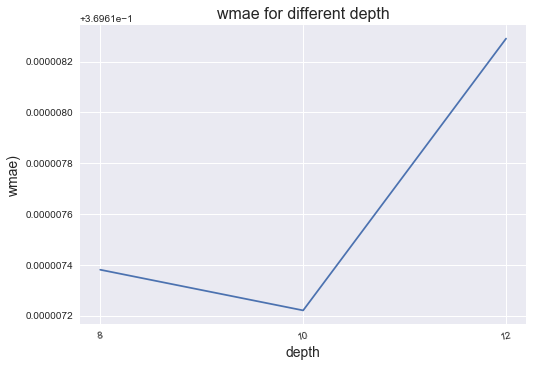

In [24]:
results_depth = {}
for i in [8, 10, 12]:
    result = {}
    print('\n\n\n\nrunning while depth = {}'.format(i))
    params={'booster': 'gblinear',
        'objective': 'reg:linear',
        'eta': 0.1,
        'depth': i,
        'subsample': 1.0,
        'min_child_weight': 5,
        'col_sample_bytree': 0.2,
        'seed': 0,
        'silent': 1,
        }

    watchlist = [(dataset_val, 'val'),(dataset_train,'train')]
    model = xgb.train(params,dataset_train,num_boost_round=5000,early_stopping_rounds=300,evals=watchlist, feval=wmae_xgb,maximize=False)
    pred_xgb = model.predict(dataset_val)
    
    result['predictions'] = pred_xgb
    result['wmae'] = wmae(y_test, pred_xgb)
    results_depth['{}'.format(i)] = result
    
print(results_depth)          # 38 negtive rows
plot_results(results_depth, 'depth') 

In [31]:
a = pd.DataFrame(results_subsample['0.8']['predictions'])
a[a[0]<0].shape

(48, 1)





running while depth = 0.8
[0]	val-wmae:0.689939	train-wmae:0.683292
Multiple eval metrics have been passed: 'train-wmae' will be used for early stopping.

Will train until train-wmae hasn't improved in 300 rounds.
[1]	val-wmae:0.564997	train-wmae:0.55703
[2]	val-wmae:0.52617	train-wmae:0.515546
[3]	val-wmae:0.500777	train-wmae:0.48759
[4]	val-wmae:0.481052	train-wmae:0.465296
[5]	val-wmae:0.465469	train-wmae:0.446988
[6]	val-wmae:0.452822	train-wmae:0.431638
[7]	val-wmae:0.442692	train-wmae:0.418652
[8]	val-wmae:0.434766	train-wmae:0.407592
[9]	val-wmae:0.428513	train-wmae:0.398266
[10]	val-wmae:0.423471	train-wmae:0.390347
[11]	val-wmae:0.419321	train-wmae:0.383647
[12]	val-wmae:0.415943	train-wmae:0.377936
[13]	val-wmae:0.41326	train-wmae:0.373054
[14]	val-wmae:0.411112	train-wmae:0.368985
[15]	val-wmae:0.409377	train-wmae:0.365527
[16]	val-wmae:0.407985	train-wmae:0.362557
[17]	val-wmae:0.406887	train-wmae:0.360017
[18]	val-wmae:0.406003	train-wmae:0.357844
[19]	val-wmae:0.40527

[186]	val-wmae:0.376021	train-wmae:0.317917
[187]	val-wmae:0.375936	train-wmae:0.31784
[188]	val-wmae:0.375867	train-wmae:0.317774
[189]	val-wmae:0.375808	train-wmae:0.317716
[190]	val-wmae:0.375742	train-wmae:0.317654
[191]	val-wmae:0.375679	train-wmae:0.317595
[192]	val-wmae:0.375617	train-wmae:0.317535
[193]	val-wmae:0.375555	train-wmae:0.317476
[194]	val-wmae:0.375494	train-wmae:0.317418
[195]	val-wmae:0.375434	train-wmae:0.317361
[196]	val-wmae:0.375367	train-wmae:0.317298
[197]	val-wmae:0.37531	train-wmae:0.317243
[198]	val-wmae:0.375243	train-wmae:0.31718
[199]	val-wmae:0.375196	train-wmae:0.317135
[200]	val-wmae:0.375142	train-wmae:0.317084
[201]	val-wmae:0.375084	train-wmae:0.317029
[202]	val-wmae:0.375026	train-wmae:0.316972
[203]	val-wmae:0.374959	train-wmae:0.316911
[204]	val-wmae:0.374901	train-wmae:0.316856
[205]	val-wmae:0.374844	train-wmae:0.316802
[206]	val-wmae:0.374783	train-wmae:0.316744
[207]	val-wmae:0.374733	train-wmae:0.316696
[208]	val-wmae:0.374678	train-wmae:

[374]	val-wmae:0.368991	train-wmae:0.311309
[375]	val-wmae:0.368969	train-wmae:0.311289
[376]	val-wmae:0.368951	train-wmae:0.311271
[377]	val-wmae:0.368929	train-wmae:0.31125
[378]	val-wmae:0.368909	train-wmae:0.311231
[379]	val-wmae:0.368887	train-wmae:0.311212
[380]	val-wmae:0.368865	train-wmae:0.311192
[381]	val-wmae:0.368847	train-wmae:0.311174
[382]	val-wmae:0.368826	train-wmae:0.311154
[383]	val-wmae:0.368807	train-wmae:0.311137
[384]	val-wmae:0.368786	train-wmae:0.311117
[385]	val-wmae:0.368767	train-wmae:0.311099
[386]	val-wmae:0.368747	train-wmae:0.31108
[387]	val-wmae:0.368727	train-wmae:0.31106
[388]	val-wmae:0.368707	train-wmae:0.311042
[389]	val-wmae:0.368688	train-wmae:0.311023
[390]	val-wmae:0.368668	train-wmae:0.311005
[391]	val-wmae:0.36865	train-wmae:0.310987
[392]	val-wmae:0.36863	train-wmae:0.310968
[393]	val-wmae:0.368611	train-wmae:0.310951
[394]	val-wmae:0.368592	train-wmae:0.310933
[395]	val-wmae:0.368573	train-wmae:0.310915
[396]	val-wmae:0.368553	train-wmae:0.

[562]	val-wmae:0.36626	train-wmae:0.308746
[563]	val-wmae:0.36625	train-wmae:0.308736
[564]	val-wmae:0.36624	train-wmae:0.308727
[565]	val-wmae:0.366231	train-wmae:0.308717
[566]	val-wmae:0.366221	train-wmae:0.308708
[567]	val-wmae:0.366213	train-wmae:0.308699
[568]	val-wmae:0.366202	train-wmae:0.308689
[569]	val-wmae:0.366193	train-wmae:0.30868
[570]	val-wmae:0.366184	train-wmae:0.30867
[571]	val-wmae:0.366175	train-wmae:0.308662
[572]	val-wmae:0.366164	train-wmae:0.308652
[573]	val-wmae:0.366155	train-wmae:0.308643
[574]	val-wmae:0.366145	train-wmae:0.308634
[575]	val-wmae:0.366136	train-wmae:0.308624
[576]	val-wmae:0.366126	train-wmae:0.308615
[577]	val-wmae:0.366117	train-wmae:0.308606
[578]	val-wmae:0.366108	train-wmae:0.308597
[579]	val-wmae:0.366099	train-wmae:0.308588
[580]	val-wmae:0.366089	train-wmae:0.308578
[581]	val-wmae:0.366081	train-wmae:0.30857
[582]	val-wmae:0.366072	train-wmae:0.30856
[583]	val-wmae:0.366063	train-wmae:0.308552
[584]	val-wmae:0.366054	train-wmae:0.30

[750]	val-wmae:0.364942	train-wmae:0.30738
[751]	val-wmae:0.364937	train-wmae:0.307374
[752]	val-wmae:0.364932	train-wmae:0.307369
[753]	val-wmae:0.364927	train-wmae:0.307363
[754]	val-wmae:0.364922	train-wmae:0.307358
[755]	val-wmae:0.364918	train-wmae:0.307353
[756]	val-wmae:0.364913	train-wmae:0.307347
[757]	val-wmae:0.364908	train-wmae:0.307342
[758]	val-wmae:0.364903	train-wmae:0.307337
[759]	val-wmae:0.364898	train-wmae:0.307331
[760]	val-wmae:0.364893	train-wmae:0.307326
[761]	val-wmae:0.364888	train-wmae:0.30732
[762]	val-wmae:0.364883	train-wmae:0.307315
[763]	val-wmae:0.364879	train-wmae:0.30731
[764]	val-wmae:0.364874	train-wmae:0.307305
[765]	val-wmae:0.36487	train-wmae:0.3073
[766]	val-wmae:0.364865	train-wmae:0.307294
[767]	val-wmae:0.36486	train-wmae:0.307289
[768]	val-wmae:0.364856	train-wmae:0.307284
[769]	val-wmae:0.364851	train-wmae:0.307279
[770]	val-wmae:0.364846	train-wmae:0.307274
[771]	val-wmae:0.364842	train-wmae:0.307269
[772]	val-wmae:0.364837	train-wmae:0.30

[938]	val-wmae:0.36422	train-wmae:0.306573
[939]	val-wmae:0.364217	train-wmae:0.30657
[940]	val-wmae:0.364213	train-wmae:0.306566
[941]	val-wmae:0.36421	train-wmae:0.306563
[942]	val-wmae:0.364208	train-wmae:0.306559
[943]	val-wmae:0.364205	train-wmae:0.306556
[944]	val-wmae:0.364202	train-wmae:0.306552
[945]	val-wmae:0.3642	train-wmae:0.306549
[946]	val-wmae:0.364196	train-wmae:0.306545
[947]	val-wmae:0.364193	train-wmae:0.306542
[948]	val-wmae:0.36419	train-wmae:0.306538
[949]	val-wmae:0.364187	train-wmae:0.306535
[950]	val-wmae:0.364184	train-wmae:0.306532
[951]	val-wmae:0.364182	train-wmae:0.306528
[952]	val-wmae:0.364179	train-wmae:0.306525
[953]	val-wmae:0.364176	train-wmae:0.306522
[954]	val-wmae:0.364173	train-wmae:0.306518
[955]	val-wmae:0.364171	train-wmae:0.306515
[956]	val-wmae:0.364168	train-wmae:0.306511
[957]	val-wmae:0.364165	train-wmae:0.306508
[958]	val-wmae:0.364163	train-wmae:0.306504
[959]	val-wmae:0.36416	train-wmae:0.306501
[960]	val-wmae:0.364158	train-wmae:0.30

[1123]	val-wmae:0.363782	train-wmae:0.306013
[1124]	val-wmae:0.36378	train-wmae:0.30601
[1125]	val-wmae:0.363779	train-wmae:0.306008
[1126]	val-wmae:0.363777	train-wmae:0.306005
[1127]	val-wmae:0.363775	train-wmae:0.306003
[1128]	val-wmae:0.363773	train-wmae:0.306
[1129]	val-wmae:0.363771	train-wmae:0.305997
[1130]	val-wmae:0.363769	train-wmae:0.305995
[1131]	val-wmae:0.363767	train-wmae:0.305992
[1132]	val-wmae:0.363765	train-wmae:0.30599
[1133]	val-wmae:0.363763	train-wmae:0.305987
[1134]	val-wmae:0.363761	train-wmae:0.305985
[1135]	val-wmae:0.363759	train-wmae:0.305982
[1136]	val-wmae:0.363758	train-wmae:0.30598
[1137]	val-wmae:0.363755	train-wmae:0.305977
[1138]	val-wmae:0.363754	train-wmae:0.305975
[1139]	val-wmae:0.363752	train-wmae:0.305972
[1140]	val-wmae:0.363749	train-wmae:0.305969
[1141]	val-wmae:0.363748	train-wmae:0.305967
[1142]	val-wmae:0.363746	train-wmae:0.305964
[1143]	val-wmae:0.363744	train-wmae:0.305962
[1144]	val-wmae:0.363742	train-wmae:0.305959
[1145]	val-wmae:0

[1307]	val-wmae:0.36348	train-wmae:0.305596
[1308]	val-wmae:0.363478	train-wmae:0.305594
[1309]	val-wmae:0.363477	train-wmae:0.305592
[1310]	val-wmae:0.363476	train-wmae:0.30559
[1311]	val-wmae:0.363475	train-wmae:0.305588
[1312]	val-wmae:0.363473	train-wmae:0.305586
[1313]	val-wmae:0.363472	train-wmae:0.305584
[1314]	val-wmae:0.36347	train-wmae:0.305582
[1315]	val-wmae:0.363469	train-wmae:0.30558
[1316]	val-wmae:0.363467	train-wmae:0.305578
[1317]	val-wmae:0.363466	train-wmae:0.305576
[1318]	val-wmae:0.363465	train-wmae:0.305574
[1319]	val-wmae:0.363463	train-wmae:0.305572
[1320]	val-wmae:0.363462	train-wmae:0.30557
[1321]	val-wmae:0.363461	train-wmae:0.305568
[1322]	val-wmae:0.36346	train-wmae:0.305566
[1323]	val-wmae:0.363458	train-wmae:0.305564
[1324]	val-wmae:0.363457	train-wmae:0.305562
[1325]	val-wmae:0.363455	train-wmae:0.30556
[1326]	val-wmae:0.363454	train-wmae:0.305558
[1327]	val-wmae:0.363453	train-wmae:0.305556
[1328]	val-wmae:0.363451	train-wmae:0.305555
[1329]	val-wmae:0

[1490]	val-wmae:0.363263	train-wmae:0.305267
[1491]	val-wmae:0.363262	train-wmae:0.305265
[1492]	val-wmae:0.363261	train-wmae:0.305264
[1493]	val-wmae:0.36326	train-wmae:0.305262
[1494]	val-wmae:0.363259	train-wmae:0.30526
[1495]	val-wmae:0.363258	train-wmae:0.305259
[1496]	val-wmae:0.363258	train-wmae:0.305257
[1497]	val-wmae:0.363257	train-wmae:0.305255
[1498]	val-wmae:0.363255	train-wmae:0.305254
[1499]	val-wmae:0.363254	train-wmae:0.305252
[1500]	val-wmae:0.363253	train-wmae:0.30525
[1501]	val-wmae:0.363252	train-wmae:0.305249
[1502]	val-wmae:0.363251	train-wmae:0.305247
[1503]	val-wmae:0.36325	train-wmae:0.305245
[1504]	val-wmae:0.363249	train-wmae:0.305244
[1505]	val-wmae:0.363248	train-wmae:0.305242
[1506]	val-wmae:0.363247	train-wmae:0.305241
[1507]	val-wmae:0.363246	train-wmae:0.305239
[1508]	val-wmae:0.363245	train-wmae:0.305237
[1509]	val-wmae:0.363244	train-wmae:0.305236
[1510]	val-wmae:0.363243	train-wmae:0.305234
[1511]	val-wmae:0.363242	train-wmae:0.305232
[1512]	val-wma

[1674]	val-wmae:0.363091	train-wmae:0.304987
[1675]	val-wmae:0.36309	train-wmae:0.304986
[1676]	val-wmae:0.363089	train-wmae:0.304984
[1677]	val-wmae:0.363089	train-wmae:0.304983
[1678]	val-wmae:0.363088	train-wmae:0.304982
[1679]	val-wmae:0.363087	train-wmae:0.30498
[1680]	val-wmae:0.363086	train-wmae:0.304979
[1681]	val-wmae:0.363085	train-wmae:0.304977
[1682]	val-wmae:0.363085	train-wmae:0.304976
[1683]	val-wmae:0.363084	train-wmae:0.304975
[1684]	val-wmae:0.363083	train-wmae:0.304973
[1685]	val-wmae:0.363082	train-wmae:0.304972
[1686]	val-wmae:0.363082	train-wmae:0.304971
[1687]	val-wmae:0.363081	train-wmae:0.304969
[1688]	val-wmae:0.36308	train-wmae:0.304968
[1689]	val-wmae:0.363079	train-wmae:0.304966
[1690]	val-wmae:0.363078	train-wmae:0.304965
[1691]	val-wmae:0.363077	train-wmae:0.304964
[1692]	val-wmae:0.363076	train-wmae:0.304962
[1693]	val-wmae:0.363075	train-wmae:0.304961
[1694]	val-wmae:0.363075	train-wmae:0.304959
[1695]	val-wmae:0.363074	train-wmae:0.304958
[1696]	val-wm

[1858]	val-wmae:0.362958	train-wmae:0.304745
[1859]	val-wmae:0.362957	train-wmae:0.304744
[1860]	val-wmae:0.362957	train-wmae:0.304743
[1861]	val-wmae:0.362956	train-wmae:0.304741
[1862]	val-wmae:0.362956	train-wmae:0.30474
[1863]	val-wmae:0.362955	train-wmae:0.304739
[1864]	val-wmae:0.362954	train-wmae:0.304738
[1865]	val-wmae:0.362954	train-wmae:0.304736
[1866]	val-wmae:0.362953	train-wmae:0.304735
[1867]	val-wmae:0.362952	train-wmae:0.304734
[1868]	val-wmae:0.362952	train-wmae:0.304733
[1869]	val-wmae:0.362951	train-wmae:0.304732
[1870]	val-wmae:0.362951	train-wmae:0.30473
[1871]	val-wmae:0.36295	train-wmae:0.304729
[1872]	val-wmae:0.36295	train-wmae:0.304728
[1873]	val-wmae:0.362949	train-wmae:0.304727
[1874]	val-wmae:0.362948	train-wmae:0.304726
[1875]	val-wmae:0.362948	train-wmae:0.304725
[1876]	val-wmae:0.362947	train-wmae:0.304723
[1877]	val-wmae:0.362947	train-wmae:0.304722
[1878]	val-wmae:0.362946	train-wmae:0.304721
[1879]	val-wmae:0.362945	train-wmae:0.30472
[1880]	val-wmae

[2041]	val-wmae:0.362858	train-wmae:0.304548
[2042]	val-wmae:0.362857	train-wmae:0.304547
[2043]	val-wmae:0.362857	train-wmae:0.304546
[2044]	val-wmae:0.362857	train-wmae:0.304545
[2045]	val-wmae:0.362856	train-wmae:0.304544
[2046]	val-wmae:0.362856	train-wmae:0.304543
[2047]	val-wmae:0.362855	train-wmae:0.304542
[2048]	val-wmae:0.362855	train-wmae:0.304541
[2049]	val-wmae:0.362854	train-wmae:0.30454
[2050]	val-wmae:0.362854	train-wmae:0.304539
[2051]	val-wmae:0.362853	train-wmae:0.304538
[2052]	val-wmae:0.362853	train-wmae:0.304537
[2053]	val-wmae:0.362853	train-wmae:0.304536
[2054]	val-wmae:0.362852	train-wmae:0.304535
[2055]	val-wmae:0.362852	train-wmae:0.304535
[2056]	val-wmae:0.362852	train-wmae:0.304534
[2057]	val-wmae:0.362851	train-wmae:0.304533
[2058]	val-wmae:0.362851	train-wmae:0.304532
[2059]	val-wmae:0.36285	train-wmae:0.304531
[2060]	val-wmae:0.36285	train-wmae:0.30453
[2061]	val-wmae:0.36285	train-wmae:0.304529
[2062]	val-wmae:0.362849	train-wmae:0.304528
[2063]	val-wmae

[2224]	val-wmae:0.362802	train-wmae:0.304375
[2225]	val-wmae:0.362801	train-wmae:0.304374
[2226]	val-wmae:0.362801	train-wmae:0.304373
[2227]	val-wmae:0.362801	train-wmae:0.304372
[2228]	val-wmae:0.362801	train-wmae:0.304371
[2229]	val-wmae:0.362801	train-wmae:0.30437
[2230]	val-wmae:0.3628	train-wmae:0.30437
[2231]	val-wmae:0.3628	train-wmae:0.304369
[2232]	val-wmae:0.3628	train-wmae:0.304368
[2233]	val-wmae:0.3628	train-wmae:0.304367
[2234]	val-wmae:0.362799	train-wmae:0.304366
[2235]	val-wmae:0.362799	train-wmae:0.304365
[2236]	val-wmae:0.362799	train-wmae:0.304364
[2237]	val-wmae:0.362798	train-wmae:0.304363
[2238]	val-wmae:0.362798	train-wmae:0.304362
[2239]	val-wmae:0.362798	train-wmae:0.304362
[2240]	val-wmae:0.362798	train-wmae:0.30436
[2241]	val-wmae:0.362798	train-wmae:0.30436
[2242]	val-wmae:0.362797	train-wmae:0.304359
[2243]	val-wmae:0.362797	train-wmae:0.304358
[2244]	val-wmae:0.362797	train-wmae:0.304357
[2245]	val-wmae:0.362797	train-wmae:0.304356
[2246]	val-wmae:0.3627

[2407]	val-wmae:0.362772	train-wmae:0.30422
[2408]	val-wmae:0.362771	train-wmae:0.304219
[2409]	val-wmae:0.362771	train-wmae:0.304218
[2410]	val-wmae:0.362771	train-wmae:0.304217
[2411]	val-wmae:0.362771	train-wmae:0.304217
[2412]	val-wmae:0.362771	train-wmae:0.304216
[2413]	val-wmae:0.362771	train-wmae:0.304215
[2414]	val-wmae:0.362771	train-wmae:0.304214
[2415]	val-wmae:0.362771	train-wmae:0.304213
[2416]	val-wmae:0.362771	train-wmae:0.304213
[2417]	val-wmae:0.36277	train-wmae:0.304212
[2418]	val-wmae:0.36277	train-wmae:0.304211
[2419]	val-wmae:0.36277	train-wmae:0.30421
[2420]	val-wmae:0.36277	train-wmae:0.30421
[2421]	val-wmae:0.36277	train-wmae:0.304209
[2422]	val-wmae:0.36277	train-wmae:0.304208
[2423]	val-wmae:0.36277	train-wmae:0.304207
[2424]	val-wmae:0.36277	train-wmae:0.304206
[2425]	val-wmae:0.36277	train-wmae:0.304206
[2426]	val-wmae:0.36277	train-wmae:0.304205
[2427]	val-wmae:0.362769	train-wmae:0.304204
[2428]	val-wmae:0.362769	train-wmae:0.304203
[2429]	val-wmae:0.36276

[2590]	val-wmae:0.362754	train-wmae:0.304084
[2591]	val-wmae:0.362754	train-wmae:0.304083
[2592]	val-wmae:0.362754	train-wmae:0.304082
[2593]	val-wmae:0.362754	train-wmae:0.304082
[2594]	val-wmae:0.362754	train-wmae:0.304081
[2595]	val-wmae:0.362754	train-wmae:0.30408
[2596]	val-wmae:0.362754	train-wmae:0.30408
[2597]	val-wmae:0.362753	train-wmae:0.304079
[2598]	val-wmae:0.362753	train-wmae:0.304078
[2599]	val-wmae:0.362753	train-wmae:0.304078
[2600]	val-wmae:0.362753	train-wmae:0.304077
[2601]	val-wmae:0.362753	train-wmae:0.304076
[2602]	val-wmae:0.362753	train-wmae:0.304075
[2603]	val-wmae:0.362753	train-wmae:0.304075
[2604]	val-wmae:0.362753	train-wmae:0.304074
[2605]	val-wmae:0.362753	train-wmae:0.304073
[2606]	val-wmae:0.362753	train-wmae:0.304073
[2607]	val-wmae:0.362753	train-wmae:0.304072
[2608]	val-wmae:0.362753	train-wmae:0.304071
[2609]	val-wmae:0.362753	train-wmae:0.304071
[2610]	val-wmae:0.362752	train-wmae:0.30407
[2611]	val-wmae:0.362752	train-wmae:0.304069
[2612]	val-wm

[2774]	val-wmae:0.362745	train-wmae:0.303967
[2775]	val-wmae:0.362745	train-wmae:0.303966
[2776]	val-wmae:0.362745	train-wmae:0.303965
[2777]	val-wmae:0.362745	train-wmae:0.303965
[2778]	val-wmae:0.362745	train-wmae:0.303965
[2779]	val-wmae:0.362745	train-wmae:0.303964
[2780]	val-wmae:0.362745	train-wmae:0.303963
[2781]	val-wmae:0.362745	train-wmae:0.303962
[2782]	val-wmae:0.362745	train-wmae:0.303962
[2783]	val-wmae:0.362745	train-wmae:0.303961
[2784]	val-wmae:0.362745	train-wmae:0.303961
[2785]	val-wmae:0.362745	train-wmae:0.30396
[2786]	val-wmae:0.362745	train-wmae:0.303959
[2787]	val-wmae:0.362745	train-wmae:0.303959
[2788]	val-wmae:0.362745	train-wmae:0.303959
[2789]	val-wmae:0.362745	train-wmae:0.303958
[2790]	val-wmae:0.362745	train-wmae:0.303957
[2791]	val-wmae:0.362745	train-wmae:0.303957
[2792]	val-wmae:0.362744	train-wmae:0.303956
[2793]	val-wmae:0.362745	train-wmae:0.303955
[2794]	val-wmae:0.362744	train-wmae:0.303955
[2795]	val-wmae:0.362744	train-wmae:0.303954
[2796]	val-

[2957]	val-wmae:0.362741	train-wmae:0.303862
[2958]	val-wmae:0.362741	train-wmae:0.303862
[2959]	val-wmae:0.362741	train-wmae:0.303861
[2960]	val-wmae:0.362741	train-wmae:0.303861
[2961]	val-wmae:0.362741	train-wmae:0.30386
[2962]	val-wmae:0.362741	train-wmae:0.30386
[2963]	val-wmae:0.362741	train-wmae:0.303859
[2964]	val-wmae:0.362741	train-wmae:0.303859
[2965]	val-wmae:0.362741	train-wmae:0.303858
[2966]	val-wmae:0.362741	train-wmae:0.303858
[2967]	val-wmae:0.362741	train-wmae:0.303857
[2968]	val-wmae:0.362741	train-wmae:0.303856
[2969]	val-wmae:0.362741	train-wmae:0.303856
[2970]	val-wmae:0.362741	train-wmae:0.303855
[2971]	val-wmae:0.362741	train-wmae:0.303855
[2972]	val-wmae:0.362741	train-wmae:0.303854
[2973]	val-wmae:0.36274	train-wmae:0.303854
[2974]	val-wmae:0.36274	train-wmae:0.303853
[2975]	val-wmae:0.36274	train-wmae:0.303853
[2976]	val-wmae:0.36274	train-wmae:0.303852
[2977]	val-wmae:0.36274	train-wmae:0.303852
[2978]	val-wmae:0.36274	train-wmae:0.303851
[2979]	val-wmae:0.

[3141]	val-wmae:0.362737	train-wmae:0.303767
[3142]	val-wmae:0.362737	train-wmae:0.303767
[3143]	val-wmae:0.362737	train-wmae:0.303766
[3144]	val-wmae:0.362736	train-wmae:0.303766
[3145]	val-wmae:0.362736	train-wmae:0.303765
[3146]	val-wmae:0.362736	train-wmae:0.303765
[3147]	val-wmae:0.362736	train-wmae:0.303764
[3148]	val-wmae:0.362736	train-wmae:0.303764
[3149]	val-wmae:0.362736	train-wmae:0.303763
[3150]	val-wmae:0.362736	train-wmae:0.303763
[3151]	val-wmae:0.362736	train-wmae:0.303762
[3152]	val-wmae:0.362736	train-wmae:0.303762
[3153]	val-wmae:0.362736	train-wmae:0.303761
[3154]	val-wmae:0.362736	train-wmae:0.303761
[3155]	val-wmae:0.362736	train-wmae:0.30376
[3156]	val-wmae:0.362736	train-wmae:0.30376
[3157]	val-wmae:0.362736	train-wmae:0.303759
[3158]	val-wmae:0.362736	train-wmae:0.303759
[3159]	val-wmae:0.362736	train-wmae:0.303758
[3160]	val-wmae:0.362736	train-wmae:0.303758
[3161]	val-wmae:0.362736	train-wmae:0.303757
[3162]	val-wmae:0.362736	train-wmae:0.303757
[3163]	val-w

[3324]	val-wmae:0.362734	train-wmae:0.303682
[3325]	val-wmae:0.362734	train-wmae:0.303681
[3326]	val-wmae:0.362735	train-wmae:0.303681
[3327]	val-wmae:0.362734	train-wmae:0.303681
[3328]	val-wmae:0.362734	train-wmae:0.30368
[3329]	val-wmae:0.362734	train-wmae:0.30368
[3330]	val-wmae:0.362734	train-wmae:0.303679
[3331]	val-wmae:0.362734	train-wmae:0.303679
[3332]	val-wmae:0.362734	train-wmae:0.303678
[3333]	val-wmae:0.362734	train-wmae:0.303678
[3334]	val-wmae:0.362734	train-wmae:0.303678
[3335]	val-wmae:0.362734	train-wmae:0.303677
[3336]	val-wmae:0.362734	train-wmae:0.303677
[3337]	val-wmae:0.362734	train-wmae:0.303676
[3338]	val-wmae:0.362734	train-wmae:0.303676
[3339]	val-wmae:0.362734	train-wmae:0.303675
[3340]	val-wmae:0.362734	train-wmae:0.303675
[3341]	val-wmae:0.362734	train-wmae:0.303674
[3342]	val-wmae:0.362734	train-wmae:0.303674
[3343]	val-wmae:0.362734	train-wmae:0.303674
[3344]	val-wmae:0.362734	train-wmae:0.303673
[3345]	val-wmae:0.362734	train-wmae:0.303673
[3346]	val-w

[3507]	val-wmae:0.362733	train-wmae:0.303605
[3508]	val-wmae:0.362733	train-wmae:0.303604
[3509]	val-wmae:0.362733	train-wmae:0.303604
[3510]	val-wmae:0.362733	train-wmae:0.303604
[3511]	val-wmae:0.362733	train-wmae:0.303603
[3512]	val-wmae:0.362733	train-wmae:0.303603
[3513]	val-wmae:0.362733	train-wmae:0.303602
[3514]	val-wmae:0.362733	train-wmae:0.303602
[3515]	val-wmae:0.362733	train-wmae:0.303602
[3516]	val-wmae:0.362733	train-wmae:0.303601
[3517]	val-wmae:0.362733	train-wmae:0.303601
[3518]	val-wmae:0.362733	train-wmae:0.303601
[3519]	val-wmae:0.362733	train-wmae:0.3036
[3520]	val-wmae:0.362733	train-wmae:0.3036
[3521]	val-wmae:0.362733	train-wmae:0.303599
[3522]	val-wmae:0.362733	train-wmae:0.303599
[3523]	val-wmae:0.362732	train-wmae:0.303598
[3524]	val-wmae:0.362733	train-wmae:0.303598
[3525]	val-wmae:0.362733	train-wmae:0.303598
[3526]	val-wmae:0.362733	train-wmae:0.303597
[3527]	val-wmae:0.362733	train-wmae:0.303597
[3528]	val-wmae:0.362733	train-wmae:0.303596
[3529]	val-wma

[3690]	val-wmae:0.362731	train-wmae:0.303534
[3691]	val-wmae:0.362731	train-wmae:0.303534
[3692]	val-wmae:0.362731	train-wmae:0.303533
[3693]	val-wmae:0.362731	train-wmae:0.303533
[3694]	val-wmae:0.362731	train-wmae:0.303533
[3695]	val-wmae:0.362731	train-wmae:0.303532
[3696]	val-wmae:0.362731	train-wmae:0.303532
[3697]	val-wmae:0.362731	train-wmae:0.303532
[3698]	val-wmae:0.362731	train-wmae:0.303532
[3699]	val-wmae:0.362731	train-wmae:0.303531
[3700]	val-wmae:0.362731	train-wmae:0.303531
[3701]	val-wmae:0.362731	train-wmae:0.30353
[3702]	val-wmae:0.362731	train-wmae:0.30353
[3703]	val-wmae:0.362731	train-wmae:0.30353
[3704]	val-wmae:0.362731	train-wmae:0.303529
[3705]	val-wmae:0.362731	train-wmae:0.303529
[3706]	val-wmae:0.362731	train-wmae:0.303529
[3707]	val-wmae:0.362731	train-wmae:0.303528
[3708]	val-wmae:0.362731	train-wmae:0.303528
[3709]	val-wmae:0.362732	train-wmae:0.303528
[3710]	val-wmae:0.362731	train-wmae:0.303527
[3711]	val-wmae:0.362731	train-wmae:0.303527
[3712]	val-wm

[3873]	val-wmae:0.362731	train-wmae:0.30347
[3874]	val-wmae:0.362731	train-wmae:0.30347
[3875]	val-wmae:0.362731	train-wmae:0.30347
[3876]	val-wmae:0.362731	train-wmae:0.303469
[3877]	val-wmae:0.362731	train-wmae:0.303469
[3878]	val-wmae:0.362731	train-wmae:0.303469
[3879]	val-wmae:0.362731	train-wmae:0.303468
[3880]	val-wmae:0.362731	train-wmae:0.303468
[3881]	val-wmae:0.362731	train-wmae:0.303468
[3882]	val-wmae:0.362731	train-wmae:0.303467
[3883]	val-wmae:0.362731	train-wmae:0.303467
[3884]	val-wmae:0.362731	train-wmae:0.303466
[3885]	val-wmae:0.362731	train-wmae:0.303466
[3886]	val-wmae:0.362731	train-wmae:0.303466
[3887]	val-wmae:0.362731	train-wmae:0.303465
[3888]	val-wmae:0.362731	train-wmae:0.303465
[3889]	val-wmae:0.362731	train-wmae:0.303465
[3890]	val-wmae:0.362731	train-wmae:0.303464
[3891]	val-wmae:0.362731	train-wmae:0.303464
[3892]	val-wmae:0.362732	train-wmae:0.303464
[3893]	val-wmae:0.362731	train-wmae:0.303463
[3894]	val-wmae:0.362731	train-wmae:0.303463
[3895]	val-wm

[4056]	val-wmae:0.362732	train-wmae:0.303411
[4057]	val-wmae:0.362733	train-wmae:0.303411
[4058]	val-wmae:0.362732	train-wmae:0.303411
[4059]	val-wmae:0.362732	train-wmae:0.30341
[4060]	val-wmae:0.362733	train-wmae:0.30341
[4061]	val-wmae:0.362733	train-wmae:0.30341
[4062]	val-wmae:0.362733	train-wmae:0.30341
[4063]	val-wmae:0.362733	train-wmae:0.303409
[4064]	val-wmae:0.362733	train-wmae:0.303409
[4065]	val-wmae:0.362733	train-wmae:0.303409
[4066]	val-wmae:0.362733	train-wmae:0.303408
[4067]	val-wmae:0.362733	train-wmae:0.303408
[4068]	val-wmae:0.362733	train-wmae:0.303408
[4069]	val-wmae:0.362733	train-wmae:0.303407
[4070]	val-wmae:0.362733	train-wmae:0.303407
[4071]	val-wmae:0.362733	train-wmae:0.303407
[4072]	val-wmae:0.362733	train-wmae:0.303407
[4073]	val-wmae:0.362733	train-wmae:0.303406
[4074]	val-wmae:0.362733	train-wmae:0.303406
[4075]	val-wmae:0.362733	train-wmae:0.303406
[4076]	val-wmae:0.362733	train-wmae:0.303405
[4077]	val-wmae:0.362733	train-wmae:0.303405
[4078]	val-wma

[4239]	val-wmae:0.362734	train-wmae:0.303358
[4240]	val-wmae:0.362734	train-wmae:0.303358
[4241]	val-wmae:0.362734	train-wmae:0.303358
[4242]	val-wmae:0.362734	train-wmae:0.303358
[4243]	val-wmae:0.362734	train-wmae:0.303357
[4244]	val-wmae:0.362734	train-wmae:0.303357
[4245]	val-wmae:0.362734	train-wmae:0.303357
[4246]	val-wmae:0.362734	train-wmae:0.303357
[4247]	val-wmae:0.362734	train-wmae:0.303357
[4248]	val-wmae:0.362734	train-wmae:0.303356
[4249]	val-wmae:0.362734	train-wmae:0.303356
[4250]	val-wmae:0.362734	train-wmae:0.303356
[4251]	val-wmae:0.362734	train-wmae:0.303355
[4252]	val-wmae:0.362734	train-wmae:0.303355
[4253]	val-wmae:0.362734	train-wmae:0.303355
[4254]	val-wmae:0.362734	train-wmae:0.303354
[4255]	val-wmae:0.362734	train-wmae:0.303354
[4256]	val-wmae:0.362734	train-wmae:0.303354
[4257]	val-wmae:0.362734	train-wmae:0.303354
[4258]	val-wmae:0.362734	train-wmae:0.303353
[4259]	val-wmae:0.362734	train-wmae:0.303353
[4260]	val-wmae:0.362734	train-wmae:0.303353
[4261]	val

[4422]	val-wmae:0.362737	train-wmae:0.30331
[4423]	val-wmae:0.362737	train-wmae:0.30331
[4424]	val-wmae:0.362737	train-wmae:0.30331
[4425]	val-wmae:0.362737	train-wmae:0.30331
[4426]	val-wmae:0.362737	train-wmae:0.303309
[4427]	val-wmae:0.362737	train-wmae:0.303309
[4428]	val-wmae:0.362737	train-wmae:0.303309
[4429]	val-wmae:0.362737	train-wmae:0.303309
[4430]	val-wmae:0.362737	train-wmae:0.303308
[4431]	val-wmae:0.362737	train-wmae:0.303308
[4432]	val-wmae:0.362737	train-wmae:0.303308
[4433]	val-wmae:0.362737	train-wmae:0.303307
[4434]	val-wmae:0.362737	train-wmae:0.303307
[4435]	val-wmae:0.362737	train-wmae:0.303307
[4436]	val-wmae:0.362737	train-wmae:0.303307
[4437]	val-wmae:0.362737	train-wmae:0.303306
[4438]	val-wmae:0.362737	train-wmae:0.303306
[4439]	val-wmae:0.362737	train-wmae:0.303306
[4440]	val-wmae:0.362737	train-wmae:0.303306
[4441]	val-wmae:0.362737	train-wmae:0.303306
[4442]	val-wmae:0.362737	train-wmae:0.303305
[4443]	val-wmae:0.362737	train-wmae:0.303305
[4444]	val-wma

[4606]	val-wmae:0.36274	train-wmae:0.303266
[4607]	val-wmae:0.36274	train-wmae:0.303265
[4608]	val-wmae:0.36274	train-wmae:0.303265
[4609]	val-wmae:0.36274	train-wmae:0.303265
[4610]	val-wmae:0.36274	train-wmae:0.303265
[4611]	val-wmae:0.36274	train-wmae:0.303264
[4612]	val-wmae:0.36274	train-wmae:0.303264
[4613]	val-wmae:0.36274	train-wmae:0.303264
[4614]	val-wmae:0.36274	train-wmae:0.303264
[4615]	val-wmae:0.36274	train-wmae:0.303263
[4616]	val-wmae:0.36274	train-wmae:0.303263
[4617]	val-wmae:0.36274	train-wmae:0.303263
[4618]	val-wmae:0.36274	train-wmae:0.303263
[4619]	val-wmae:0.36274	train-wmae:0.303263
[4620]	val-wmae:0.362741	train-wmae:0.303262
[4621]	val-wmae:0.362741	train-wmae:0.303262
[4622]	val-wmae:0.362741	train-wmae:0.303262
[4623]	val-wmae:0.362741	train-wmae:0.303262
[4624]	val-wmae:0.362741	train-wmae:0.303261
[4625]	val-wmae:0.362741	train-wmae:0.303261
[4626]	val-wmae:0.36274	train-wmae:0.303261
[4627]	val-wmae:0.362741	train-wmae:0.303261
[4628]	val-wmae:0.362741	

[4789]	val-wmae:0.362744	train-wmae:0.303225
[4790]	val-wmae:0.362744	train-wmae:0.303224
[4791]	val-wmae:0.362744	train-wmae:0.303224
[4792]	val-wmae:0.362744	train-wmae:0.303224
[4793]	val-wmae:0.362744	train-wmae:0.303224
[4794]	val-wmae:0.362744	train-wmae:0.303224
[4795]	val-wmae:0.362744	train-wmae:0.303223
[4796]	val-wmae:0.362744	train-wmae:0.303223
[4797]	val-wmae:0.362744	train-wmae:0.303223
[4798]	val-wmae:0.362744	train-wmae:0.303223
[4799]	val-wmae:0.362744	train-wmae:0.303223
[4800]	val-wmae:0.362744	train-wmae:0.303222
[4801]	val-wmae:0.362744	train-wmae:0.303222
[4802]	val-wmae:0.362744	train-wmae:0.303222
[4803]	val-wmae:0.362744	train-wmae:0.303222
[4804]	val-wmae:0.362744	train-wmae:0.303221
[4805]	val-wmae:0.362745	train-wmae:0.303221
[4806]	val-wmae:0.362745	train-wmae:0.303221
[4807]	val-wmae:0.362744	train-wmae:0.303221
[4808]	val-wmae:0.362744	train-wmae:0.303221
[4809]	val-wmae:0.362745	train-wmae:0.30322
[4810]	val-wmae:0.362745	train-wmae:0.30322
[4811]	val-w

[4972]	val-wmae:0.362749	train-wmae:0.303187
[4973]	val-wmae:0.362749	train-wmae:0.303187
[4974]	val-wmae:0.362749	train-wmae:0.303187
[4975]	val-wmae:0.362749	train-wmae:0.303186
[4976]	val-wmae:0.362749	train-wmae:0.303186
[4977]	val-wmae:0.362749	train-wmae:0.303186
[4978]	val-wmae:0.362749	train-wmae:0.303186
[4979]	val-wmae:0.362749	train-wmae:0.303185
[4980]	val-wmae:0.362749	train-wmae:0.303185
[4981]	val-wmae:0.362749	train-wmae:0.303185
[4982]	val-wmae:0.362749	train-wmae:0.303185
[4983]	val-wmae:0.362749	train-wmae:0.303185
[4984]	val-wmae:0.362749	train-wmae:0.303184
[4985]	val-wmae:0.362749	train-wmae:0.303184
[4986]	val-wmae:0.362749	train-wmae:0.303184
[4987]	val-wmae:0.362749	train-wmae:0.303184
[4988]	val-wmae:0.362749	train-wmae:0.303183
[4989]	val-wmae:0.362749	train-wmae:0.303183
[4990]	val-wmae:0.362749	train-wmae:0.303183
[4991]	val-wmae:0.362749	train-wmae:0.303183
[4992]	val-wmae:0.362749	train-wmae:0.303183
[4993]	val-wmae:0.362749	train-wmae:0.303183
[4994]	val

[157]	val-wmae:0.378853	train-wmae:0.320474
[158]	val-wmae:0.378755	train-wmae:0.320383
[159]	val-wmae:0.378666	train-wmae:0.320302
[160]	val-wmae:0.37856	train-wmae:0.320202
[161]	val-wmae:0.37848	train-wmae:0.320128
[162]	val-wmae:0.378417	train-wmae:0.320071
[163]	val-wmae:0.378316	train-wmae:0.31998
[164]	val-wmae:0.378225	train-wmae:0.319897
[165]	val-wmae:0.378141	train-wmae:0.319821
[166]	val-wmae:0.378044	train-wmae:0.319734
[167]	val-wmae:0.377964	train-wmae:0.31966
[168]	val-wmae:0.377869	train-wmae:0.319573
[169]	val-wmae:0.377781	train-wmae:0.319491
[170]	val-wmae:0.377709	train-wmae:0.319423
[171]	val-wmae:0.377629	train-wmae:0.319349
[172]	val-wmae:0.377545	train-wmae:0.319272
[173]	val-wmae:0.377465	train-wmae:0.319198
[174]	val-wmae:0.377388	train-wmae:0.319129
[175]	val-wmae:0.377303	train-wmae:0.319048
[176]	val-wmae:0.377225	train-wmae:0.318975
[177]	val-wmae:0.377143	train-wmae:0.3189
[178]	val-wmae:0.377074	train-wmae:0.318833
[179]	val-wmae:0.376997	train-wmae:0.3

[345]	val-wmae:0.369842	train-wmae:0.312107
[346]	val-wmae:0.369815	train-wmae:0.312082
[347]	val-wmae:0.369786	train-wmae:0.312055
[348]	val-wmae:0.369763	train-wmae:0.312034
[349]	val-wmae:0.369741	train-wmae:0.312013
[350]	val-wmae:0.369715	train-wmae:0.311989
[351]	val-wmae:0.36969	train-wmae:0.311966
[352]	val-wmae:0.369667	train-wmae:0.311945
[353]	val-wmae:0.369638	train-wmae:0.311919
[354]	val-wmae:0.369619	train-wmae:0.311901
[355]	val-wmae:0.369598	train-wmae:0.311881
[356]	val-wmae:0.36957	train-wmae:0.311855
[357]	val-wmae:0.369544	train-wmae:0.311831
[358]	val-wmae:0.369529	train-wmae:0.311817
[359]	val-wmae:0.369501	train-wmae:0.311792
[360]	val-wmae:0.369475	train-wmae:0.311767
[361]	val-wmae:0.369456	train-wmae:0.31175
[362]	val-wmae:0.369431	train-wmae:0.311727
[363]	val-wmae:0.369404	train-wmae:0.311702
[364]	val-wmae:0.369389	train-wmae:0.311688
[365]	val-wmae:0.369363	train-wmae:0.311664
[366]	val-wmae:0.369337	train-wmae:0.311639
[367]	val-wmae:0.369314	train-wmae:

[533]	val-wmae:0.366666	train-wmae:0.309149
[534]	val-wmae:0.366657	train-wmae:0.309139
[535]	val-wmae:0.366645	train-wmae:0.309129
[536]	val-wmae:0.366632	train-wmae:0.309115
[537]	val-wmae:0.36662	train-wmae:0.309105
[538]	val-wmae:0.366611	train-wmae:0.309094
[539]	val-wmae:0.366601	train-wmae:0.309084
[540]	val-wmae:0.366593	train-wmae:0.309077
[541]	val-wmae:0.366579	train-wmae:0.309063
[542]	val-wmae:0.366569	train-wmae:0.309053
[543]	val-wmae:0.366561	train-wmae:0.309046
[544]	val-wmae:0.366548	train-wmae:0.309033
[545]	val-wmae:0.366535	train-wmae:0.30902
[546]	val-wmae:0.366529	train-wmae:0.309012
[547]	val-wmae:0.366518	train-wmae:0.309002
[548]	val-wmae:0.366508	train-wmae:0.308993
[549]	val-wmae:0.366497	train-wmae:0.308982
[550]	val-wmae:0.366487	train-wmae:0.308973
[551]	val-wmae:0.366476	train-wmae:0.308961
[552]	val-wmae:0.366465	train-wmae:0.308951
[553]	val-wmae:0.366455	train-wmae:0.308941
[554]	val-wmae:0.366449	train-wmae:0.308934
[555]	val-wmae:0.366435	train-wmae

[721]	val-wmae:0.365175	train-wmae:0.307624
[722]	val-wmae:0.365168	train-wmae:0.307618
[723]	val-wmae:0.365164	train-wmae:0.307613
[724]	val-wmae:0.365158	train-wmae:0.307607
[725]	val-wmae:0.365152	train-wmae:0.3076
[726]	val-wmae:0.365148	train-wmae:0.307594
[727]	val-wmae:0.365142	train-wmae:0.307589
[728]	val-wmae:0.365139	train-wmae:0.307584
[729]	val-wmae:0.36513	train-wmae:0.307576
[730]	val-wmae:0.365125	train-wmae:0.30757
[731]	val-wmae:0.365121	train-wmae:0.307565
[732]	val-wmae:0.365117	train-wmae:0.307559
[733]	val-wmae:0.365114	train-wmae:0.307555
[734]	val-wmae:0.365105	train-wmae:0.307547
[735]	val-wmae:0.365098	train-wmae:0.30754
[736]	val-wmae:0.365094	train-wmae:0.307535
[737]	val-wmae:0.365087	train-wmae:0.307528
[738]	val-wmae:0.365082	train-wmae:0.307523
[739]	val-wmae:0.365077	train-wmae:0.307517
[740]	val-wmae:0.365071	train-wmae:0.307511
[741]	val-wmae:0.365065	train-wmae:0.307505
[742]	val-wmae:0.365061	train-wmae:0.307499
[743]	val-wmae:0.365056	train-wmae:0.

[909]	val-wmae:0.36437	train-wmae:0.306734
[910]	val-wmae:0.364365	train-wmae:0.306729
[911]	val-wmae:0.364364	train-wmae:0.306726
[912]	val-wmae:0.364359	train-wmae:0.306721
[913]	val-wmae:0.364356	train-wmae:0.306718
[914]	val-wmae:0.364353	train-wmae:0.306714
[915]	val-wmae:0.364349	train-wmae:0.30671
[916]	val-wmae:0.364346	train-wmae:0.306707
[917]	val-wmae:0.364345	train-wmae:0.306704
[918]	val-wmae:0.364342	train-wmae:0.306701
[919]	val-wmae:0.364337	train-wmae:0.306696
[920]	val-wmae:0.364333	train-wmae:0.306692
[921]	val-wmae:0.364331	train-wmae:0.306688
[922]	val-wmae:0.364328	train-wmae:0.306685
[923]	val-wmae:0.364324	train-wmae:0.30668
[924]	val-wmae:0.364321	train-wmae:0.306677
[925]	val-wmae:0.364318	train-wmae:0.306673
[926]	val-wmae:0.364315	train-wmae:0.30667
[927]	val-wmae:0.364312	train-wmae:0.306666
[928]	val-wmae:0.364309	train-wmae:0.306662
[929]	val-wmae:0.364306	train-wmae:0.306658
[930]	val-wmae:0.364303	train-wmae:0.306655
[931]	val-wmae:0.3643	train-wmae:0.3

[1094]	val-wmae:0.363889	train-wmae:0.306134
[1095]	val-wmae:0.363887	train-wmae:0.306131
[1096]	val-wmae:0.363885	train-wmae:0.306128
[1097]	val-wmae:0.363883	train-wmae:0.306126
[1098]	val-wmae:0.363881	train-wmae:0.306123
[1099]	val-wmae:0.363878	train-wmae:0.30612
[1100]	val-wmae:0.363877	train-wmae:0.306118
[1101]	val-wmae:0.363875	train-wmae:0.306115
[1102]	val-wmae:0.363874	train-wmae:0.306113
[1103]	val-wmae:0.363871	train-wmae:0.306109
[1104]	val-wmae:0.363869	train-wmae:0.306107
[1105]	val-wmae:0.363867	train-wmae:0.306104
[1106]	val-wmae:0.363865	train-wmae:0.306101
[1107]	val-wmae:0.363862	train-wmae:0.306098
[1108]	val-wmae:0.363861	train-wmae:0.306096
[1109]	val-wmae:0.363858	train-wmae:0.306093
[1110]	val-wmae:0.363856	train-wmae:0.30609
[1111]	val-wmae:0.363855	train-wmae:0.306089
[1112]	val-wmae:0.363852	train-wmae:0.306085
[1113]	val-wmae:0.363849	train-wmae:0.306082
[1114]	val-wmae:0.363848	train-wmae:0.306079
[1115]	val-wmae:0.363846	train-wmae:0.306076
[1116]	val-w

[1277]	val-wmae:0.363559	train-wmae:0.305692
[1278]	val-wmae:0.363558	train-wmae:0.30569
[1279]	val-wmae:0.363557	train-wmae:0.305689
[1280]	val-wmae:0.363555	train-wmae:0.305686
[1281]	val-wmae:0.363554	train-wmae:0.305684
[1282]	val-wmae:0.363553	train-wmae:0.305682
[1283]	val-wmae:0.363551	train-wmae:0.30568
[1284]	val-wmae:0.36355	train-wmae:0.305679
[1285]	val-wmae:0.363548	train-wmae:0.305676
[1286]	val-wmae:0.363546	train-wmae:0.305674
[1287]	val-wmae:0.363545	train-wmae:0.305672
[1288]	val-wmae:0.363544	train-wmae:0.30567
[1289]	val-wmae:0.363542	train-wmae:0.305667
[1290]	val-wmae:0.36354	train-wmae:0.305665
[1291]	val-wmae:0.363539	train-wmae:0.305663
[1292]	val-wmae:0.363537	train-wmae:0.305661
[1293]	val-wmae:0.363538	train-wmae:0.30566
[1294]	val-wmae:0.363534	train-wmae:0.305657
[1295]	val-wmae:0.363533	train-wmae:0.305655
[1296]	val-wmae:0.363532	train-wmae:0.305653
[1297]	val-wmae:0.36353	train-wmae:0.305651
[1298]	val-wmae:0.363531	train-wmae:0.30565
[1299]	val-wmae:0.

[1461]	val-wmae:0.363325	train-wmae:0.305345
[1462]	val-wmae:0.363324	train-wmae:0.305343
[1463]	val-wmae:0.363323	train-wmae:0.305341
[1464]	val-wmae:0.363323	train-wmae:0.30534
[1465]	val-wmae:0.363321	train-wmae:0.305338
[1466]	val-wmae:0.36332	train-wmae:0.305336
[1467]	val-wmae:0.363319	train-wmae:0.305334
[1468]	val-wmae:0.363318	train-wmae:0.305333
[1469]	val-wmae:0.363318	train-wmae:0.305332
[1470]	val-wmae:0.363316	train-wmae:0.30533
[1471]	val-wmae:0.363316	train-wmae:0.305329
[1472]	val-wmae:0.363314	train-wmae:0.305326
[1473]	val-wmae:0.363313	train-wmae:0.305325
[1474]	val-wmae:0.363313	train-wmae:0.305323
[1475]	val-wmae:0.363311	train-wmae:0.305321
[1476]	val-wmae:0.36331	train-wmae:0.30532
[1477]	val-wmae:0.363308	train-wmae:0.305318
[1478]	val-wmae:0.363307	train-wmae:0.305316
[1479]	val-wmae:0.363305	train-wmae:0.305314
[1480]	val-wmae:0.363304	train-wmae:0.305312
[1481]	val-wmae:0.363303	train-wmae:0.30531
[1482]	val-wmae:0.363302	train-wmae:0.305309
[1483]	val-wmae:

[1644]	val-wmae:0.363142	train-wmae:0.305054
[1645]	val-wmae:0.363141	train-wmae:0.305052
[1646]	val-wmae:0.363141	train-wmae:0.305051
[1647]	val-wmae:0.36314	train-wmae:0.30505
[1648]	val-wmae:0.363139	train-wmae:0.305048
[1649]	val-wmae:0.363138	train-wmae:0.305047
[1650]	val-wmae:0.363137	train-wmae:0.305045
[1651]	val-wmae:0.363136	train-wmae:0.305043
[1652]	val-wmae:0.363137	train-wmae:0.305043
[1653]	val-wmae:0.363135	train-wmae:0.305041
[1654]	val-wmae:0.363134	train-wmae:0.30504
[1655]	val-wmae:0.363133	train-wmae:0.305038
[1656]	val-wmae:0.363132	train-wmae:0.305036
[1657]	val-wmae:0.363131	train-wmae:0.305035
[1658]	val-wmae:0.36313	train-wmae:0.305033
[1659]	val-wmae:0.363129	train-wmae:0.305032
[1660]	val-wmae:0.363128	train-wmae:0.305031
[1661]	val-wmae:0.363127	train-wmae:0.305029
[1662]	val-wmae:0.363127	train-wmae:0.305028
[1663]	val-wmae:0.363126	train-wmae:0.305026
[1664]	val-wmae:0.363126	train-wmae:0.305025
[1665]	val-wmae:0.363124	train-wmae:0.305023
[1666]	val-wma

[1828]	val-wmae:0.362999	train-wmae:0.304802
[1829]	val-wmae:0.362997	train-wmae:0.3048
[1830]	val-wmae:0.362996	train-wmae:0.304799
[1831]	val-wmae:0.362996	train-wmae:0.304798
[1832]	val-wmae:0.362995	train-wmae:0.304796
[1833]	val-wmae:0.362995	train-wmae:0.304795
[1834]	val-wmae:0.362994	train-wmae:0.304794
[1835]	val-wmae:0.362993	train-wmae:0.304793
[1836]	val-wmae:0.362993	train-wmae:0.304792
[1837]	val-wmae:0.362991	train-wmae:0.30479
[1838]	val-wmae:0.362991	train-wmae:0.304789
[1839]	val-wmae:0.362991	train-wmae:0.304788
[1840]	val-wmae:0.362989	train-wmae:0.304786
[1841]	val-wmae:0.362989	train-wmae:0.304784
[1842]	val-wmae:0.362988	train-wmae:0.304783
[1843]	val-wmae:0.362988	train-wmae:0.304782
[1844]	val-wmae:0.362987	train-wmae:0.304781
[1845]	val-wmae:0.362986	train-wmae:0.30478
[1846]	val-wmae:0.362986	train-wmae:0.304779
[1847]	val-wmae:0.362985	train-wmae:0.304777
[1848]	val-wmae:0.362985	train-wmae:0.304776
[1849]	val-wmae:0.362984	train-wmae:0.304775
[1850]	val-wma

[2012]	val-wmae:0.362888	train-wmae:0.304594
[2013]	val-wmae:0.362888	train-wmae:0.304593
[2014]	val-wmae:0.362888	train-wmae:0.304592
[2015]	val-wmae:0.362887	train-wmae:0.304591
[2016]	val-wmae:0.362886	train-wmae:0.30459
[2017]	val-wmae:0.362886	train-wmae:0.304589
[2018]	val-wmae:0.362886	train-wmae:0.304588
[2019]	val-wmae:0.362886	train-wmae:0.304587
[2020]	val-wmae:0.362885	train-wmae:0.304586
[2021]	val-wmae:0.362885	train-wmae:0.304585
[2022]	val-wmae:0.362885	train-wmae:0.304584
[2023]	val-wmae:0.362884	train-wmae:0.304583
[2024]	val-wmae:0.362883	train-wmae:0.304582
[2025]	val-wmae:0.362883	train-wmae:0.304581
[2026]	val-wmae:0.362883	train-wmae:0.30458
[2027]	val-wmae:0.362882	train-wmae:0.304579
[2028]	val-wmae:0.362882	train-wmae:0.304578
[2029]	val-wmae:0.362881	train-wmae:0.304577
[2030]	val-wmae:0.36288	train-wmae:0.304575
[2031]	val-wmae:0.36288	train-wmae:0.304574
[2032]	val-wmae:0.36288	train-wmae:0.304573
[2033]	val-wmae:0.36288	train-wmae:0.304572
[2034]	val-wmae:

[2195]	val-wmae:0.362824	train-wmae:0.304416
[2196]	val-wmae:0.362824	train-wmae:0.304415
[2197]	val-wmae:0.362824	train-wmae:0.304414
[2198]	val-wmae:0.362823	train-wmae:0.304413
[2199]	val-wmae:0.362823	train-wmae:0.304412
[2200]	val-wmae:0.362824	train-wmae:0.304412
[2201]	val-wmae:0.362823	train-wmae:0.30441
[2202]	val-wmae:0.362822	train-wmae:0.304409
[2203]	val-wmae:0.362822	train-wmae:0.304408
[2204]	val-wmae:0.362822	train-wmae:0.304407
[2205]	val-wmae:0.362822	train-wmae:0.304407
[2206]	val-wmae:0.362822	train-wmae:0.304406
[2207]	val-wmae:0.362822	train-wmae:0.304405
[2208]	val-wmae:0.362822	train-wmae:0.304404
[2209]	val-wmae:0.362822	train-wmae:0.304404
[2210]	val-wmae:0.362821	train-wmae:0.304402
[2211]	val-wmae:0.36282	train-wmae:0.304401
[2212]	val-wmae:0.362821	train-wmae:0.304401
[2213]	val-wmae:0.36282	train-wmae:0.304399
[2214]	val-wmae:0.36282	train-wmae:0.304399
[2215]	val-wmae:0.36282	train-wmae:0.304398
[2216]	val-wmae:0.362819	train-wmae:0.304397
[2217]	val-wmae

[2379]	val-wmae:0.362788	train-wmae:0.304255
[2380]	val-wmae:0.362788	train-wmae:0.304254
[2381]	val-wmae:0.362788	train-wmae:0.304253
[2382]	val-wmae:0.362788	train-wmae:0.304253
[2383]	val-wmae:0.362788	train-wmae:0.304252
[2384]	val-wmae:0.362788	train-wmae:0.304251
[2385]	val-wmae:0.362787	train-wmae:0.30425
[2386]	val-wmae:0.362787	train-wmae:0.304249
[2387]	val-wmae:0.362787	train-wmae:0.304248
[2388]	val-wmae:0.362787	train-wmae:0.304247
[2389]	val-wmae:0.362787	train-wmae:0.304247
[2390]	val-wmae:0.362787	train-wmae:0.304246
[2391]	val-wmae:0.362787	train-wmae:0.304245
[2392]	val-wmae:0.362787	train-wmae:0.304244
[2393]	val-wmae:0.362787	train-wmae:0.304243
[2394]	val-wmae:0.362786	train-wmae:0.304242
[2395]	val-wmae:0.362786	train-wmae:0.304242
[2396]	val-wmae:0.362786	train-wmae:0.304241
[2397]	val-wmae:0.362786	train-wmae:0.30424
[2398]	val-wmae:0.362786	train-wmae:0.304239
[2399]	val-wmae:0.362786	train-wmae:0.304239
[2400]	val-wmae:0.362786	train-wmae:0.304238
[2401]	val-w

[2562]	val-wmae:0.362768	train-wmae:0.304115
[2563]	val-wmae:0.362768	train-wmae:0.304114
[2564]	val-wmae:0.362768	train-wmae:0.304113
[2565]	val-wmae:0.362768	train-wmae:0.304113
[2566]	val-wmae:0.362768	train-wmae:0.304112
[2567]	val-wmae:0.362768	train-wmae:0.304111
[2568]	val-wmae:0.362768	train-wmae:0.30411
[2569]	val-wmae:0.362768	train-wmae:0.30411
[2570]	val-wmae:0.362767	train-wmae:0.304109
[2571]	val-wmae:0.362767	train-wmae:0.304108
[2572]	val-wmae:0.362768	train-wmae:0.304108
[2573]	val-wmae:0.362767	train-wmae:0.304107
[2574]	val-wmae:0.362767	train-wmae:0.304106
[2575]	val-wmae:0.362767	train-wmae:0.304106
[2576]	val-wmae:0.362767	train-wmae:0.304105
[2577]	val-wmae:0.362766	train-wmae:0.304104
[2578]	val-wmae:0.362767	train-wmae:0.304104
[2579]	val-wmae:0.362766	train-wmae:0.304102
[2580]	val-wmae:0.362766	train-wmae:0.304102
[2581]	val-wmae:0.362767	train-wmae:0.304101
[2582]	val-wmae:0.362766	train-wmae:0.3041
[2583]	val-wmae:0.362766	train-wmae:0.3041
[2584]	val-wmae:

[2746]	val-wmae:0.362756	train-wmae:0.303993
[2747]	val-wmae:0.362757	train-wmae:0.303993
[2748]	val-wmae:0.362757	train-wmae:0.303993
[2749]	val-wmae:0.362756	train-wmae:0.303992
[2750]	val-wmae:0.362756	train-wmae:0.303991
[2751]	val-wmae:0.362756	train-wmae:0.303991
[2752]	val-wmae:0.362756	train-wmae:0.30399
[2753]	val-wmae:0.362756	train-wmae:0.303989
[2754]	val-wmae:0.362756	train-wmae:0.303989
[2755]	val-wmae:0.362757	train-wmae:0.303989
[2756]	val-wmae:0.362756	train-wmae:0.303987
[2757]	val-wmae:0.362757	train-wmae:0.303987
[2758]	val-wmae:0.362756	train-wmae:0.303986
[2759]	val-wmae:0.362756	train-wmae:0.303985
[2760]	val-wmae:0.362756	train-wmae:0.303985
[2761]	val-wmae:0.362756	train-wmae:0.303984
[2762]	val-wmae:0.362756	train-wmae:0.303984
[2763]	val-wmae:0.362756	train-wmae:0.303983
[2764]	val-wmae:0.362756	train-wmae:0.303982
[2765]	val-wmae:0.362756	train-wmae:0.303982
[2766]	val-wmae:0.362756	train-wmae:0.303981
[2767]	val-wmae:0.362755	train-wmae:0.303981
[2768]	val-

[2929]	val-wmae:0.36275	train-wmae:0.303886
[2930]	val-wmae:0.36275	train-wmae:0.303886
[2931]	val-wmae:0.36275	train-wmae:0.303885
[2932]	val-wmae:0.36275	train-wmae:0.303885
[2933]	val-wmae:0.36275	train-wmae:0.303884
[2934]	val-wmae:0.36275	train-wmae:0.303883
[2935]	val-wmae:0.36275	train-wmae:0.303883
[2936]	val-wmae:0.36275	train-wmae:0.303882
[2937]	val-wmae:0.36275	train-wmae:0.303882
[2938]	val-wmae:0.36275	train-wmae:0.303881
[2939]	val-wmae:0.36275	train-wmae:0.303881
[2940]	val-wmae:0.36275	train-wmae:0.30388
[2941]	val-wmae:0.36275	train-wmae:0.30388
[2942]	val-wmae:0.36275	train-wmae:0.303879
[2943]	val-wmae:0.36275	train-wmae:0.303879
[2944]	val-wmae:0.362751	train-wmae:0.303879
[2945]	val-wmae:0.36275	train-wmae:0.303878
[2946]	val-wmae:0.362751	train-wmae:0.303877
[2947]	val-wmae:0.36275	train-wmae:0.303876
[2948]	val-wmae:0.36275	train-wmae:0.303876
[2949]	val-wmae:0.36275	train-wmae:0.303875
[2950]	val-wmae:0.362749	train-wmae:0.303874
[2951]	val-wmae:0.362749	train-

[3113]	val-wmae:0.362745	train-wmae:0.303789
[3114]	val-wmae:0.362745	train-wmae:0.303788
[3115]	val-wmae:0.362745	train-wmae:0.303788
[3116]	val-wmae:0.362745	train-wmae:0.303787
[3117]	val-wmae:0.362745	train-wmae:0.303787
[3118]	val-wmae:0.362745	train-wmae:0.303787
[3119]	val-wmae:0.362745	train-wmae:0.303786
[3120]	val-wmae:0.362745	train-wmae:0.303785
[3121]	val-wmae:0.362745	train-wmae:0.303785
[3122]	val-wmae:0.362745	train-wmae:0.303784
[3123]	val-wmae:0.362745	train-wmae:0.303784
[3124]	val-wmae:0.362745	train-wmae:0.303783
[3125]	val-wmae:0.362744	train-wmae:0.303783
[3126]	val-wmae:0.362744	train-wmae:0.303782
[3127]	val-wmae:0.362744	train-wmae:0.303782
[3128]	val-wmae:0.362744	train-wmae:0.303781
[3129]	val-wmae:0.362744	train-wmae:0.303781
[3130]	val-wmae:0.362744	train-wmae:0.30378
[3131]	val-wmae:0.362744	train-wmae:0.30378
[3132]	val-wmae:0.362744	train-wmae:0.303779
[3133]	val-wmae:0.362745	train-wmae:0.303779
[3134]	val-wmae:0.362744	train-wmae:0.303778
[3135]	val-w

[3296]	val-wmae:0.362741	train-wmae:0.303701
[3297]	val-wmae:0.362741	train-wmae:0.303701
[3298]	val-wmae:0.362741	train-wmae:0.3037
[3299]	val-wmae:0.362741	train-wmae:0.3037
[3300]	val-wmae:0.362741	train-wmae:0.303699
[3301]	val-wmae:0.362741	train-wmae:0.303699
[3302]	val-wmae:0.362741	train-wmae:0.303698
[3303]	val-wmae:0.362741	train-wmae:0.303698
[3304]	val-wmae:0.362741	train-wmae:0.303698
[3305]	val-wmae:0.362741	train-wmae:0.303697
[3306]	val-wmae:0.362741	train-wmae:0.303697
[3307]	val-wmae:0.362741	train-wmae:0.303696
[3308]	val-wmae:0.362741	train-wmae:0.303696
[3309]	val-wmae:0.362741	train-wmae:0.303695
[3310]	val-wmae:0.362741	train-wmae:0.303695
[3311]	val-wmae:0.362741	train-wmae:0.303694
[3312]	val-wmae:0.362741	train-wmae:0.303694
[3313]	val-wmae:0.362741	train-wmae:0.303693
[3314]	val-wmae:0.362741	train-wmae:0.303693
[3315]	val-wmae:0.362741	train-wmae:0.303693
[3316]	val-wmae:0.362741	train-wmae:0.303692
[3317]	val-wmae:0.362741	train-wmae:0.303692
[3318]	val-wma

[3481]	val-wmae:0.362739	train-wmae:0.303621
[3482]	val-wmae:0.362739	train-wmae:0.303621
[3483]	val-wmae:0.362739	train-wmae:0.30362
[3484]	val-wmae:0.362739	train-wmae:0.30362
[3485]	val-wmae:0.362739	train-wmae:0.303619
[3486]	val-wmae:0.362739	train-wmae:0.303619
[3487]	val-wmae:0.362739	train-wmae:0.303619
[3488]	val-wmae:0.362739	train-wmae:0.303618
[3489]	val-wmae:0.362739	train-wmae:0.303618
[3490]	val-wmae:0.362739	train-wmae:0.303617
[3491]	val-wmae:0.362739	train-wmae:0.303617
[3492]	val-wmae:0.362739	train-wmae:0.303616
[3493]	val-wmae:0.362739	train-wmae:0.303616
[3494]	val-wmae:0.362739	train-wmae:0.303616
[3495]	val-wmae:0.362739	train-wmae:0.303615
[3496]	val-wmae:0.362739	train-wmae:0.303615
[3497]	val-wmae:0.362739	train-wmae:0.303614
[3498]	val-wmae:0.362739	train-wmae:0.303614
[3499]	val-wmae:0.362739	train-wmae:0.303614
[3500]	val-wmae:0.362738	train-wmae:0.303613
[3501]	val-wmae:0.362739	train-wmae:0.303613
[3502]	val-wmae:0.362739	train-wmae:0.303612
[3503]	val-w

[3664]	val-wmae:0.362737	train-wmae:0.303549
[3665]	val-wmae:0.362737	train-wmae:0.303549
[3666]	val-wmae:0.362736	train-wmae:0.303548
[3667]	val-wmae:0.362737	train-wmae:0.303548
[3668]	val-wmae:0.362737	train-wmae:0.303548
[3669]	val-wmae:0.362737	train-wmae:0.303547
[3670]	val-wmae:0.362737	train-wmae:0.303547
[3671]	val-wmae:0.362737	train-wmae:0.303547
[3672]	val-wmae:0.362737	train-wmae:0.303546
[3673]	val-wmae:0.362737	train-wmae:0.303546
[3674]	val-wmae:0.362737	train-wmae:0.303545
[3675]	val-wmae:0.362737	train-wmae:0.303545
[3676]	val-wmae:0.362737	train-wmae:0.303545
[3677]	val-wmae:0.362737	train-wmae:0.303544
[3678]	val-wmae:0.362736	train-wmae:0.303544
[3679]	val-wmae:0.362737	train-wmae:0.303544
[3680]	val-wmae:0.362736	train-wmae:0.303543
[3681]	val-wmae:0.362736	train-wmae:0.303543
[3682]	val-wmae:0.362736	train-wmae:0.303542
[3683]	val-wmae:0.362737	train-wmae:0.303542
[3684]	val-wmae:0.362737	train-wmae:0.303542
[3685]	val-wmae:0.362736	train-wmae:0.303541
[3686]	val

[3847]	val-wmae:0.362735	train-wmae:0.303483
[3848]	val-wmae:0.362735	train-wmae:0.303483
[3849]	val-wmae:0.362735	train-wmae:0.303483
[3850]	val-wmae:0.362735	train-wmae:0.303483
[3851]	val-wmae:0.362735	train-wmae:0.303482
[3852]	val-wmae:0.362735	train-wmae:0.303482
[3853]	val-wmae:0.362736	train-wmae:0.303482
[3854]	val-wmae:0.362735	train-wmae:0.303481
[3855]	val-wmae:0.362735	train-wmae:0.303481
[3856]	val-wmae:0.362735	train-wmae:0.30348
[3857]	val-wmae:0.362735	train-wmae:0.30348
[3858]	val-wmae:0.362735	train-wmae:0.30348
[3859]	val-wmae:0.362735	train-wmae:0.303479
[3860]	val-wmae:0.362736	train-wmae:0.30348
[3861]	val-wmae:0.362735	train-wmae:0.303479
[3862]	val-wmae:0.362735	train-wmae:0.303478
[3863]	val-wmae:0.362735	train-wmae:0.303478
[3864]	val-wmae:0.362735	train-wmae:0.303478
[3865]	val-wmae:0.362735	train-wmae:0.303477
[3866]	val-wmae:0.362735	train-wmae:0.303477
[3867]	val-wmae:0.362735	train-wmae:0.303477
[3868]	val-wmae:0.362735	train-wmae:0.303476
[3869]	val-wma

[4030]	val-wmae:0.362736	train-wmae:0.303423
[4031]	val-wmae:0.362736	train-wmae:0.303423
[4032]	val-wmae:0.362736	train-wmae:0.303423
[4033]	val-wmae:0.362736	train-wmae:0.303422
[4034]	val-wmae:0.362736	train-wmae:0.303422
[4035]	val-wmae:0.362736	train-wmae:0.303422
[4036]	val-wmae:0.362736	train-wmae:0.303421
[4037]	val-wmae:0.362736	train-wmae:0.303421
[4038]	val-wmae:0.362736	train-wmae:0.303421
[4039]	val-wmae:0.362736	train-wmae:0.30342
[4040]	val-wmae:0.362736	train-wmae:0.30342
[4041]	val-wmae:0.362737	train-wmae:0.30342
[4042]	val-wmae:0.362736	train-wmae:0.30342
[4043]	val-wmae:0.362736	train-wmae:0.303419
[4044]	val-wmae:0.362736	train-wmae:0.303419
[4045]	val-wmae:0.362736	train-wmae:0.303419
[4046]	val-wmae:0.362736	train-wmae:0.303418
[4047]	val-wmae:0.362736	train-wmae:0.303418
[4048]	val-wmae:0.362736	train-wmae:0.303418
[4049]	val-wmae:0.362736	train-wmae:0.303417
[4050]	val-wmae:0.362736	train-wmae:0.303417
[4051]	val-wmae:0.362737	train-wmae:0.303417
[4052]	val-wma

[4213]	val-wmae:0.362737	train-wmae:0.303369
[4214]	val-wmae:0.362737	train-wmae:0.303369
[4215]	val-wmae:0.362737	train-wmae:0.303368
[4216]	val-wmae:0.362737	train-wmae:0.303368
[4217]	val-wmae:0.362737	train-wmae:0.303368
[4218]	val-wmae:0.362737	train-wmae:0.303368
[4219]	val-wmae:0.362737	train-wmae:0.303367
[4220]	val-wmae:0.362737	train-wmae:0.303367
[4221]	val-wmae:0.362737	train-wmae:0.303367
[4222]	val-wmae:0.362737	train-wmae:0.303367
[4223]	val-wmae:0.362737	train-wmae:0.303366
[4224]	val-wmae:0.362737	train-wmae:0.303366
[4225]	val-wmae:0.362737	train-wmae:0.303366
[4226]	val-wmae:0.362737	train-wmae:0.303365
[4227]	val-wmae:0.362737	train-wmae:0.303365
[4228]	val-wmae:0.362737	train-wmae:0.303365
[4229]	val-wmae:0.362737	train-wmae:0.303365
[4230]	val-wmae:0.362737	train-wmae:0.303364
[4231]	val-wmae:0.362737	train-wmae:0.303364
[4232]	val-wmae:0.362737	train-wmae:0.303364
[4233]	val-wmae:0.362737	train-wmae:0.303363
[4234]	val-wmae:0.362737	train-wmae:0.303363
[4235]	val

[4396]	val-wmae:0.362739	train-wmae:0.30332
[4397]	val-wmae:0.362739	train-wmae:0.30332
[4398]	val-wmae:0.362739	train-wmae:0.303319
[4399]	val-wmae:0.362739	train-wmae:0.303319
[4400]	val-wmae:0.36274	train-wmae:0.303319
[4401]	val-wmae:0.36274	train-wmae:0.303319
[4402]	val-wmae:0.36274	train-wmae:0.303319
[4403]	val-wmae:0.36274	train-wmae:0.303318
[4404]	val-wmae:0.36274	train-wmae:0.303318
[4405]	val-wmae:0.36274	train-wmae:0.303318
[4406]	val-wmae:0.36274	train-wmae:0.303317
[4407]	val-wmae:0.36274	train-wmae:0.303317
[4408]	val-wmae:0.362739	train-wmae:0.303317
[4409]	val-wmae:0.36274	train-wmae:0.303317
[4410]	val-wmae:0.36274	train-wmae:0.303316
[4411]	val-wmae:0.36274	train-wmae:0.303317
[4412]	val-wmae:0.36274	train-wmae:0.303316
[4413]	val-wmae:0.36274	train-wmae:0.303316
[4414]	val-wmae:0.36274	train-wmae:0.303315
[4415]	val-wmae:0.36274	train-wmae:0.303315
[4416]	val-wmae:0.36274	train-wmae:0.303315
[4417]	val-wmae:0.36274	train-wmae:0.303315
[4418]	val-wmae:0.362741	trai

[4580]	val-wmae:0.362742	train-wmae:0.303274
[4581]	val-wmae:0.362742	train-wmae:0.303274
[4582]	val-wmae:0.362742	train-wmae:0.303274
[4583]	val-wmae:0.362743	train-wmae:0.303274
[4584]	val-wmae:0.362742	train-wmae:0.303273
[4585]	val-wmae:0.362742	train-wmae:0.303273
[4586]	val-wmae:0.362743	train-wmae:0.303273
[4587]	val-wmae:0.362743	train-wmae:0.303273
[4588]	val-wmae:0.362743	train-wmae:0.303272
[4589]	val-wmae:0.362743	train-wmae:0.303272
[4590]	val-wmae:0.362742	train-wmae:0.303272
[4591]	val-wmae:0.362743	train-wmae:0.303272
[4592]	val-wmae:0.362743	train-wmae:0.303272
[4593]	val-wmae:0.362743	train-wmae:0.303272
[4594]	val-wmae:0.362743	train-wmae:0.303271
[4595]	val-wmae:0.362743	train-wmae:0.303271
[4596]	val-wmae:0.362743	train-wmae:0.303271
[4597]	val-wmae:0.362743	train-wmae:0.30327
[4598]	val-wmae:0.362743	train-wmae:0.30327
[4599]	val-wmae:0.362743	train-wmae:0.30327
[4600]	val-wmae:0.362743	train-wmae:0.30327
[4601]	val-wmae:0.362743	train-wmae:0.303269
[4602]	val-wma

[4763]	val-wmae:0.362745	train-wmae:0.303232
[4764]	val-wmae:0.362745	train-wmae:0.303232
[4765]	val-wmae:0.362745	train-wmae:0.303232
[4766]	val-wmae:0.362745	train-wmae:0.303232
[4767]	val-wmae:0.362745	train-wmae:0.303231
[4768]	val-wmae:0.362745	train-wmae:0.303231
[4769]	val-wmae:0.362745	train-wmae:0.303231
[4770]	val-wmae:0.362745	train-wmae:0.303231
[4771]	val-wmae:0.362745	train-wmae:0.303231
[4772]	val-wmae:0.362745	train-wmae:0.30323
[4773]	val-wmae:0.362745	train-wmae:0.30323
[4774]	val-wmae:0.362745	train-wmae:0.30323
[4775]	val-wmae:0.362746	train-wmae:0.30323
[4776]	val-wmae:0.362745	train-wmae:0.30323
[4777]	val-wmae:0.362745	train-wmae:0.303229
[4778]	val-wmae:0.362745	train-wmae:0.303229
[4779]	val-wmae:0.362746	train-wmae:0.303229
[4780]	val-wmae:0.362746	train-wmae:0.303229
[4781]	val-wmae:0.362746	train-wmae:0.303229
[4782]	val-wmae:0.362746	train-wmae:0.303228
[4783]	val-wmae:0.362746	train-wmae:0.303228
[4784]	val-wmae:0.362746	train-wmae:0.303228
[4785]	val-wmae

[4946]	val-wmae:0.36275	train-wmae:0.303194
[4947]	val-wmae:0.362749	train-wmae:0.303194
[4948]	val-wmae:0.36275	train-wmae:0.303194
[4949]	val-wmae:0.362749	train-wmae:0.303193
[4950]	val-wmae:0.362749	train-wmae:0.303193
[4951]	val-wmae:0.36275	train-wmae:0.303193
[4952]	val-wmae:0.36275	train-wmae:0.303192
[4953]	val-wmae:0.36275	train-wmae:0.303192
[4954]	val-wmae:0.36275	train-wmae:0.303192
[4955]	val-wmae:0.362749	train-wmae:0.303192
[4956]	val-wmae:0.36275	train-wmae:0.303192
[4957]	val-wmae:0.362749	train-wmae:0.303191
[4958]	val-wmae:0.362749	train-wmae:0.303191
[4959]	val-wmae:0.36275	train-wmae:0.303191
[4960]	val-wmae:0.362749	train-wmae:0.303191
[4961]	val-wmae:0.362749	train-wmae:0.303191
[4962]	val-wmae:0.36275	train-wmae:0.30319
[4963]	val-wmae:0.36275	train-wmae:0.30319
[4964]	val-wmae:0.36275	train-wmae:0.30319
[4965]	val-wmae:0.36275	train-wmae:0.30319
[4966]	val-wmae:0.36275	train-wmae:0.30319
[4967]	val-wmae:0.36275	train-wmae:0.30319
[4968]	val-wmae:0.36275	train-

[132]	val-wmae:0.381137	train-wmae:0.322661
[133]	val-wmae:0.381015	train-wmae:0.322548
[134]	val-wmae:0.380896	train-wmae:0.322437
[135]	val-wmae:0.380793	train-wmae:0.322339
[136]	val-wmae:0.380681	train-wmae:0.322234
[137]	val-wmae:0.380558	train-wmae:0.32212
[138]	val-wmae:0.38045	train-wmae:0.322018
[139]	val-wmae:0.380319	train-wmae:0.321894
[140]	val-wmae:0.380244	train-wmae:0.321822
[141]	val-wmae:0.380202	train-wmae:0.321773
[142]	val-wmae:0.380045	train-wmae:0.321633
[143]	val-wmae:0.379944	train-wmae:0.321537
[144]	val-wmae:0.379832	train-wmae:0.321433
[145]	val-wmae:0.379689	train-wmae:0.321304
[146]	val-wmae:0.379607	train-wmae:0.321228
[147]	val-wmae:0.379539	train-wmae:0.32116
[148]	val-wmae:0.379415	train-wmae:0.321049
[149]	val-wmae:0.379297	train-wmae:0.320942
[150]	val-wmae:0.379207	train-wmae:0.320858
[151]	val-wmae:0.379147	train-wmae:0.320797
[152]	val-wmae:0.379015	train-wmae:0.320677
[153]	val-wmae:0.37891	train-wmae:0.320581
[154]	val-wmae:0.378823	train-wmae:0

[320]	val-wmae:0.370397	train-wmae:0.312633
[321]	val-wmae:0.370364	train-wmae:0.312602
[322]	val-wmae:0.370343	train-wmae:0.312582
[323]	val-wmae:0.370307	train-wmae:0.31255
[324]	val-wmae:0.370284	train-wmae:0.312527
[325]	val-wmae:0.370261	train-wmae:0.312506
[326]	val-wmae:0.370229	train-wmae:0.312477
[327]	val-wmae:0.370206	train-wmae:0.312455
[328]	val-wmae:0.370177	train-wmae:0.31243
[329]	val-wmae:0.370152	train-wmae:0.312405
[330]	val-wmae:0.370125	train-wmae:0.31238
[331]	val-wmae:0.370099	train-wmae:0.312356
[332]	val-wmae:0.370072	train-wmae:0.312329
[333]	val-wmae:0.370048	train-wmae:0.312309
[334]	val-wmae:0.370019	train-wmae:0.312283
[335]	val-wmae:0.36999	train-wmae:0.312257
[336]	val-wmae:0.369965	train-wmae:0.312234
[337]	val-wmae:0.369941	train-wmae:0.312211
[338]	val-wmae:0.369917	train-wmae:0.312189
[339]	val-wmae:0.369889	train-wmae:0.312163
[340]	val-wmae:0.369865	train-wmae:0.312141
[341]	val-wmae:0.369838	train-wmae:0.312116
[342]	val-wmae:0.369816	train-wmae:0

[508]	val-wmae:0.3669	train-wmae:0.309375
[509]	val-wmae:0.366888	train-wmae:0.309365
[510]	val-wmae:0.366876	train-wmae:0.309353
[511]	val-wmae:0.366862	train-wmae:0.30934
[512]	val-wmae:0.366852	train-wmae:0.309331
[513]	val-wmae:0.366838	train-wmae:0.309318
[514]	val-wmae:0.366827	train-wmae:0.309308
[515]	val-wmae:0.366821	train-wmae:0.309301
[516]	val-wmae:0.366804	train-wmae:0.309285
[517]	val-wmae:0.366791	train-wmae:0.309273
[518]	val-wmae:0.366781	train-wmae:0.309263
[519]	val-wmae:0.366768	train-wmae:0.309252
[520]	val-wmae:0.366758	train-wmae:0.309242
[521]	val-wmae:0.366744	train-wmae:0.309229
[522]	val-wmae:0.366733	train-wmae:0.309218
[523]	val-wmae:0.366722	train-wmae:0.309209
[524]	val-wmae:0.36671	train-wmae:0.309198
[525]	val-wmae:0.3667	train-wmae:0.309188
[526]	val-wmae:0.366687	train-wmae:0.309175
[527]	val-wmae:0.366674	train-wmae:0.309164
[528]	val-wmae:0.366666	train-wmae:0.309155
[529]	val-wmae:0.366654	train-wmae:0.309143
[530]	val-wmae:0.366643	train-wmae:0.3

[695]	val-wmae:0.365296	train-wmae:0.307761
[696]	val-wmae:0.365288	train-wmae:0.307752
[697]	val-wmae:0.365282	train-wmae:0.307746
[698]	val-wmae:0.365276	train-wmae:0.307739
[699]	val-wmae:0.36527	train-wmae:0.307733
[700]	val-wmae:0.365265	train-wmae:0.307726
[701]	val-wmae:0.365259	train-wmae:0.307721
[702]	val-wmae:0.365254	train-wmae:0.307715
[703]	val-wmae:0.365247	train-wmae:0.307708
[704]	val-wmae:0.365241	train-wmae:0.307701
[705]	val-wmae:0.365236	train-wmae:0.307695
[706]	val-wmae:0.365229	train-wmae:0.307688
[707]	val-wmae:0.365223	train-wmae:0.307682
[708]	val-wmae:0.365216	train-wmae:0.307675
[709]	val-wmae:0.36521	train-wmae:0.307669
[710]	val-wmae:0.365205	train-wmae:0.307664
[711]	val-wmae:0.3652	train-wmae:0.307658
[712]	val-wmae:0.365195	train-wmae:0.307651
[713]	val-wmae:0.365189	train-wmae:0.307645
[714]	val-wmae:0.365182	train-wmae:0.307638
[715]	val-wmae:0.365177	train-wmae:0.307632
[716]	val-wmae:0.365171	train-wmae:0.307626
[717]	val-wmae:0.365166	train-wmae:0

[883]	val-wmae:0.364433	train-wmae:0.30681
[884]	val-wmae:0.364429	train-wmae:0.306806
[885]	val-wmae:0.364425	train-wmae:0.306801
[886]	val-wmae:0.364421	train-wmae:0.306797
[887]	val-wmae:0.36442	train-wmae:0.306795
[888]	val-wmae:0.364415	train-wmae:0.306791
[889]	val-wmae:0.364411	train-wmae:0.306786
[890]	val-wmae:0.364408	train-wmae:0.306782
[891]	val-wmae:0.364406	train-wmae:0.306779
[892]	val-wmae:0.364401	train-wmae:0.306775
[893]	val-wmae:0.364398	train-wmae:0.306771
[894]	val-wmae:0.364396	train-wmae:0.306768
[895]	val-wmae:0.364392	train-wmae:0.306764
[896]	val-wmae:0.36439	train-wmae:0.30676
[897]	val-wmae:0.364386	train-wmae:0.306757
[898]	val-wmae:0.364382	train-wmae:0.306752
[899]	val-wmae:0.364379	train-wmae:0.306748
[900]	val-wmae:0.364376	train-wmae:0.306745
[901]	val-wmae:0.364373	train-wmae:0.306741
[902]	val-wmae:0.36437	train-wmae:0.306737
[903]	val-wmae:0.364366	train-wmae:0.306733
[904]	val-wmae:0.364366	train-wmae:0.306732
[905]	val-wmae:0.364361	train-wmae:0.

[1069]	val-wmae:0.363928	train-wmae:0.306189
[1070]	val-wmae:0.363924	train-wmae:0.306185
[1071]	val-wmae:0.363921	train-wmae:0.306181
[1072]	val-wmae:0.363919	train-wmae:0.306178
[1073]	val-wmae:0.363917	train-wmae:0.306175
[1074]	val-wmae:0.363915	train-wmae:0.306173
[1075]	val-wmae:0.363913	train-wmae:0.30617
[1076]	val-wmae:0.36391	train-wmae:0.306167
[1077]	val-wmae:0.363908	train-wmae:0.306164
[1078]	val-wmae:0.363906	train-wmae:0.306161
[1079]	val-wmae:0.363904	train-wmae:0.306159
[1080]	val-wmae:0.363902	train-wmae:0.306156
[1081]	val-wmae:0.3639	train-wmae:0.306154
[1082]	val-wmae:0.363897	train-wmae:0.30615
[1083]	val-wmae:0.363895	train-wmae:0.306147
[1084]	val-wmae:0.363893	train-wmae:0.306145
[1085]	val-wmae:0.363891	train-wmae:0.306142
[1086]	val-wmae:0.363889	train-wmae:0.306139
[1087]	val-wmae:0.363887	train-wmae:0.306136
[1088]	val-wmae:0.363885	train-wmae:0.306133
[1089]	val-wmae:0.363883	train-wmae:0.30613
[1090]	val-wmae:0.36388	train-wmae:0.306127
[1091]	val-wmae:0

[1252]	val-wmae:0.363585	train-wmae:0.305732
[1253]	val-wmae:0.363583	train-wmae:0.30573
[1254]	val-wmae:0.363582	train-wmae:0.305727
[1255]	val-wmae:0.363581	train-wmae:0.305725
[1256]	val-wmae:0.363578	train-wmae:0.305723
[1257]	val-wmae:0.363577	train-wmae:0.305721
[1258]	val-wmae:0.363576	train-wmae:0.305719
[1259]	val-wmae:0.363574	train-wmae:0.305717
[1260]	val-wmae:0.363572	train-wmae:0.305714
[1261]	val-wmae:0.36357	train-wmae:0.305712
[1262]	val-wmae:0.36357	train-wmae:0.30571
[1263]	val-wmae:0.363568	train-wmae:0.305708
[1264]	val-wmae:0.363566	train-wmae:0.305705
[1265]	val-wmae:0.363565	train-wmae:0.305703
[1266]	val-wmae:0.363563	train-wmae:0.305701
[1267]	val-wmae:0.363563	train-wmae:0.3057
[1268]	val-wmae:0.363559	train-wmae:0.305696
[1269]	val-wmae:0.363558	train-wmae:0.305695
[1270]	val-wmae:0.363557	train-wmae:0.305692
[1271]	val-wmae:0.363556	train-wmae:0.305691
[1272]	val-wmae:0.363554	train-wmae:0.305689
[1273]	val-wmae:0.363552	train-wmae:0.305686
[1274]	val-wmae:

[1435]	val-wmae:0.363344	train-wmae:0.305378
[1436]	val-wmae:0.363343	train-wmae:0.305376
[1437]	val-wmae:0.363341	train-wmae:0.305373
[1438]	val-wmae:0.363342	train-wmae:0.305373
[1439]	val-wmae:0.363339	train-wmae:0.30537
[1440]	val-wmae:0.363338	train-wmae:0.305369
[1441]	val-wmae:0.363337	train-wmae:0.305367
[1442]	val-wmae:0.363336	train-wmae:0.305365
[1443]	val-wmae:0.363334	train-wmae:0.305363
[1444]	val-wmae:0.363334	train-wmae:0.305362
[1445]	val-wmae:0.363333	train-wmae:0.30536
[1446]	val-wmae:0.363331	train-wmae:0.305358
[1447]	val-wmae:0.36333	train-wmae:0.305356
[1448]	val-wmae:0.363329	train-wmae:0.305355
[1449]	val-wmae:0.363328	train-wmae:0.305353
[1450]	val-wmae:0.363327	train-wmae:0.305352
[1451]	val-wmae:0.363326	train-wmae:0.30535
[1452]	val-wmae:0.363324	train-wmae:0.305348
[1453]	val-wmae:0.363323	train-wmae:0.305346
[1454]	val-wmae:0.363322	train-wmae:0.305345
[1455]	val-wmae:0.363321	train-wmae:0.305343
[1456]	val-wmae:0.363322	train-wmae:0.305343
[1457]	val-wma

[1619]	val-wmae:0.363157	train-wmae:0.305082
[1620]	val-wmae:0.363156	train-wmae:0.30508
[1621]	val-wmae:0.363156	train-wmae:0.30508
[1622]	val-wmae:0.363155	train-wmae:0.305078
[1623]	val-wmae:0.363154	train-wmae:0.305077
[1624]	val-wmae:0.363153	train-wmae:0.305075
[1625]	val-wmae:0.363152	train-wmae:0.305073
[1626]	val-wmae:0.363151	train-wmae:0.305072
[1627]	val-wmae:0.36315	train-wmae:0.305071
[1628]	val-wmae:0.363149	train-wmae:0.305069
[1629]	val-wmae:0.363148	train-wmae:0.305067
[1630]	val-wmae:0.363147	train-wmae:0.305066
[1631]	val-wmae:0.363146	train-wmae:0.305064
[1632]	val-wmae:0.363147	train-wmae:0.305064
[1633]	val-wmae:0.363145	train-wmae:0.305062
[1634]	val-wmae:0.363144	train-wmae:0.30506
[1635]	val-wmae:0.363143	train-wmae:0.305059
[1636]	val-wmae:0.363142	train-wmae:0.305057
[1637]	val-wmae:0.363142	train-wmae:0.305056
[1638]	val-wmae:0.363141	train-wmae:0.305055
[1639]	val-wmae:0.36314	train-wmae:0.305053
[1640]	val-wmae:0.363138	train-wmae:0.305051
[1641]	val-wmae

[1802]	val-wmae:0.363009	train-wmae:0.304829
[1803]	val-wmae:0.363009	train-wmae:0.304828
[1804]	val-wmae:0.363008	train-wmae:0.304827
[1805]	val-wmae:0.363008	train-wmae:0.304825
[1806]	val-wmae:0.363007	train-wmae:0.304824
[1807]	val-wmae:0.363006	train-wmae:0.304823
[1808]	val-wmae:0.363006	train-wmae:0.304821
[1809]	val-wmae:0.363006	train-wmae:0.304821
[1810]	val-wmae:0.363005	train-wmae:0.304819
[1811]	val-wmae:0.363004	train-wmae:0.304817
[1812]	val-wmae:0.363003	train-wmae:0.304816
[1813]	val-wmae:0.363003	train-wmae:0.304815
[1814]	val-wmae:0.363002	train-wmae:0.304814
[1815]	val-wmae:0.363001	train-wmae:0.304812
[1816]	val-wmae:0.363	train-wmae:0.304811
[1817]	val-wmae:0.363	train-wmae:0.30481
[1818]	val-wmae:0.363	train-wmae:0.304809
[1819]	val-wmae:0.362999	train-wmae:0.304807
[1820]	val-wmae:0.362998	train-wmae:0.304806
[1821]	val-wmae:0.362997	train-wmae:0.304804
[1822]	val-wmae:0.362997	train-wmae:0.304803
[1823]	val-wmae:0.362996	train-wmae:0.304802
[1824]	val-wmae:0.36

[1986]	val-wmae:0.362896	train-wmae:0.304616
[1987]	val-wmae:0.362895	train-wmae:0.304614
[1988]	val-wmae:0.362895	train-wmae:0.304613
[1989]	val-wmae:0.362894	train-wmae:0.304612
[1990]	val-wmae:0.362894	train-wmae:0.304611
[1991]	val-wmae:0.362893	train-wmae:0.30461
[1992]	val-wmae:0.362893	train-wmae:0.304609
[1993]	val-wmae:0.362893	train-wmae:0.304608
[1994]	val-wmae:0.362892	train-wmae:0.304607
[1995]	val-wmae:0.362892	train-wmae:0.304606
[1996]	val-wmae:0.362891	train-wmae:0.304605
[1997]	val-wmae:0.362891	train-wmae:0.304604
[1998]	val-wmae:0.36289	train-wmae:0.304603
[1999]	val-wmae:0.36289	train-wmae:0.304602
[2000]	val-wmae:0.362889	train-wmae:0.304601
[2001]	val-wmae:0.362889	train-wmae:0.3046
[2002]	val-wmae:0.362888	train-wmae:0.304599
[2003]	val-wmae:0.362888	train-wmae:0.304597
[2004]	val-wmae:0.362887	train-wmae:0.304597
[2005]	val-wmae:0.362888	train-wmae:0.304597
[2006]	val-wmae:0.362887	train-wmae:0.304595
[2007]	val-wmae:0.362886	train-wmae:0.304594
[2008]	val-wmae

[2169]	val-wmae:0.362826	train-wmae:0.304435
[2170]	val-wmae:0.362827	train-wmae:0.304435
[2171]	val-wmae:0.362826	train-wmae:0.304433
[2172]	val-wmae:0.362826	train-wmae:0.304432
[2173]	val-wmae:0.362826	train-wmae:0.304432
[2174]	val-wmae:0.362826	train-wmae:0.304431
[2175]	val-wmae:0.362825	train-wmae:0.304429
[2176]	val-wmae:0.362825	train-wmae:0.304429
[2177]	val-wmae:0.362826	train-wmae:0.304428
[2178]	val-wmae:0.362825	train-wmae:0.304427
[2179]	val-wmae:0.362824	train-wmae:0.304426
[2180]	val-wmae:0.362826	train-wmae:0.304426
[2181]	val-wmae:0.362824	train-wmae:0.304424
[2182]	val-wmae:0.362824	train-wmae:0.304424
[2183]	val-wmae:0.362824	train-wmae:0.304423
[2184]	val-wmae:0.362824	train-wmae:0.304422
[2185]	val-wmae:0.362823	train-wmae:0.30442
[2186]	val-wmae:0.362824	train-wmae:0.30442
[2187]	val-wmae:0.362824	train-wmae:0.304419
[2188]	val-wmae:0.362823	train-wmae:0.304418
[2189]	val-wmae:0.362822	train-wmae:0.304417
[2190]	val-wmae:0.362822	train-wmae:0.304416
[2191]	val-w

[2353]	val-wmae:0.362788	train-wmae:0.304271
[2354]	val-wmae:0.362788	train-wmae:0.304271
[2355]	val-wmae:0.362788	train-wmae:0.304269
[2356]	val-wmae:0.362788	train-wmae:0.304269
[2357]	val-wmae:0.362788	train-wmae:0.304268
[2358]	val-wmae:0.362787	train-wmae:0.304267
[2359]	val-wmae:0.362787	train-wmae:0.304266
[2360]	val-wmae:0.362787	train-wmae:0.304265
[2361]	val-wmae:0.362787	train-wmae:0.304265
[2362]	val-wmae:0.362786	train-wmae:0.304264
[2363]	val-wmae:0.362786	train-wmae:0.304263
[2364]	val-wmae:0.362786	train-wmae:0.304262
[2365]	val-wmae:0.362786	train-wmae:0.304261
[2366]	val-wmae:0.362786	train-wmae:0.30426
[2367]	val-wmae:0.362786	train-wmae:0.304259
[2368]	val-wmae:0.362785	train-wmae:0.304259
[2369]	val-wmae:0.362785	train-wmae:0.304258
[2370]	val-wmae:0.362785	train-wmae:0.304257
[2371]	val-wmae:0.362785	train-wmae:0.304256
[2372]	val-wmae:0.362785	train-wmae:0.304255
[2373]	val-wmae:0.362785	train-wmae:0.304254
[2374]	val-wmae:0.362784	train-wmae:0.304253
[2375]	val-

[2536]	val-wmae:0.362767	train-wmae:0.304129
[2537]	val-wmae:0.362767	train-wmae:0.304128
[2538]	val-wmae:0.362767	train-wmae:0.304127
[2539]	val-wmae:0.362767	train-wmae:0.304127
[2540]	val-wmae:0.362767	train-wmae:0.304126
[2541]	val-wmae:0.362767	train-wmae:0.304125
[2542]	val-wmae:0.362767	train-wmae:0.304125
[2543]	val-wmae:0.362767	train-wmae:0.304124
[2544]	val-wmae:0.362767	train-wmae:0.304123
[2545]	val-wmae:0.362767	train-wmae:0.304123
[2546]	val-wmae:0.362766	train-wmae:0.304122
[2547]	val-wmae:0.362766	train-wmae:0.304121
[2548]	val-wmae:0.362766	train-wmae:0.30412
[2549]	val-wmae:0.362766	train-wmae:0.30412
[2550]	val-wmae:0.362766	train-wmae:0.304119
[2551]	val-wmae:0.362766	train-wmae:0.304118
[2552]	val-wmae:0.362767	train-wmae:0.304118
[2553]	val-wmae:0.362766	train-wmae:0.304117
[2554]	val-wmae:0.362766	train-wmae:0.304116
[2555]	val-wmae:0.362766	train-wmae:0.304115
[2556]	val-wmae:0.362765	train-wmae:0.304115
[2557]	val-wmae:0.362765	train-wmae:0.304114
[2558]	val-w

[2719]	val-wmae:0.362755	train-wmae:0.304007
[2720]	val-wmae:0.362754	train-wmae:0.304006
[2721]	val-wmae:0.362755	train-wmae:0.304006
[2722]	val-wmae:0.362755	train-wmae:0.304005
[2723]	val-wmae:0.362755	train-wmae:0.304004
[2724]	val-wmae:0.362754	train-wmae:0.304003
[2725]	val-wmae:0.362755	train-wmae:0.304003
[2726]	val-wmae:0.362755	train-wmae:0.304003
[2727]	val-wmae:0.362754	train-wmae:0.304002
[2728]	val-wmae:0.362754	train-wmae:0.304001
[2729]	val-wmae:0.362754	train-wmae:0.304
[2730]	val-wmae:0.362754	train-wmae:0.304
[2731]	val-wmae:0.362754	train-wmae:0.303999
[2732]	val-wmae:0.362755	train-wmae:0.303999
[2733]	val-wmae:0.362754	train-wmae:0.303998
[2734]	val-wmae:0.362754	train-wmae:0.303997
[2735]	val-wmae:0.362754	train-wmae:0.303997
[2736]	val-wmae:0.362754	train-wmae:0.303996
[2737]	val-wmae:0.362754	train-wmae:0.303995
[2738]	val-wmae:0.362754	train-wmae:0.303995
[2739]	val-wmae:0.362754	train-wmae:0.303994
[2740]	val-wmae:0.362754	train-wmae:0.303993
[2741]	val-wmae:

[2903]	val-wmae:0.362749	train-wmae:0.303898
[2904]	val-wmae:0.362749	train-wmae:0.303897
[2905]	val-wmae:0.362748	train-wmae:0.303897
[2906]	val-wmae:0.362749	train-wmae:0.303897
[2907]	val-wmae:0.362748	train-wmae:0.303896
[2908]	val-wmae:0.362748	train-wmae:0.303895
[2909]	val-wmae:0.362749	train-wmae:0.303895
[2910]	val-wmae:0.362749	train-wmae:0.303894
[2911]	val-wmae:0.362748	train-wmae:0.303893
[2912]	val-wmae:0.362748	train-wmae:0.303893
[2913]	val-wmae:0.362749	train-wmae:0.303893
[2914]	val-wmae:0.362748	train-wmae:0.303892
[2915]	val-wmae:0.362748	train-wmae:0.303891
[2916]	val-wmae:0.362748	train-wmae:0.30389
[2917]	val-wmae:0.362748	train-wmae:0.30389
[2918]	val-wmae:0.362748	train-wmae:0.303889
[2919]	val-wmae:0.362748	train-wmae:0.303889
[2920]	val-wmae:0.362748	train-wmae:0.303888
[2921]	val-wmae:0.362748	train-wmae:0.303888
[2922]	val-wmae:0.362748	train-wmae:0.303887
[2923]	val-wmae:0.362748	train-wmae:0.303887
[2924]	val-wmae:0.362748	train-wmae:0.303886
[2925]	val-w

[3086]	val-wmae:0.362744	train-wmae:0.3038
[3087]	val-wmae:0.362743	train-wmae:0.3038
[3088]	val-wmae:0.362744	train-wmae:0.303799
[3089]	val-wmae:0.362744	train-wmae:0.303799
[3090]	val-wmae:0.362744	train-wmae:0.303798
[3091]	val-wmae:0.362744	train-wmae:0.303797
[3092]	val-wmae:0.362744	train-wmae:0.303797
[3093]	val-wmae:0.362743	train-wmae:0.303796
[3094]	val-wmae:0.362744	train-wmae:0.303796
[3095]	val-wmae:0.362744	train-wmae:0.303796
[3096]	val-wmae:0.362744	train-wmae:0.303795
[3097]	val-wmae:0.362744	train-wmae:0.303795
[3098]	val-wmae:0.362744	train-wmae:0.303794
[3099]	val-wmae:0.362743	train-wmae:0.303794
[3100]	val-wmae:0.362743	train-wmae:0.303793
[3101]	val-wmae:0.362743	train-wmae:0.303792
[3102]	val-wmae:0.362743	train-wmae:0.303792
[3103]	val-wmae:0.362743	train-wmae:0.303791
[3104]	val-wmae:0.362743	train-wmae:0.303791
[3105]	val-wmae:0.362743	train-wmae:0.303791
[3106]	val-wmae:0.362743	train-wmae:0.30379
[3107]	val-wmae:0.362743	train-wmae:0.30379
[3108]	val-wmae:

[3270]	val-wmae:0.36274	train-wmae:0.303711
[3271]	val-wmae:0.36274	train-wmae:0.303711
[3272]	val-wmae:0.36274	train-wmae:0.30371
[3273]	val-wmae:0.36274	train-wmae:0.30371
[3274]	val-wmae:0.36274	train-wmae:0.303709
[3275]	val-wmae:0.36274	train-wmae:0.303709
[3276]	val-wmae:0.36274	train-wmae:0.303708
[3277]	val-wmae:0.36274	train-wmae:0.303708
[3278]	val-wmae:0.36274	train-wmae:0.303707
[3279]	val-wmae:0.36274	train-wmae:0.303707
[3280]	val-wmae:0.36274	train-wmae:0.303706
[3281]	val-wmae:0.36274	train-wmae:0.303706
[3282]	val-wmae:0.36274	train-wmae:0.303706
[3283]	val-wmae:0.36274	train-wmae:0.303705
[3284]	val-wmae:0.36274	train-wmae:0.303705
[3285]	val-wmae:0.36274	train-wmae:0.303705
[3286]	val-wmae:0.36274	train-wmae:0.303704
[3287]	val-wmae:0.36274	train-wmae:0.303703
[3288]	val-wmae:0.36274	train-wmae:0.303703
[3289]	val-wmae:0.36274	train-wmae:0.303703
[3290]	val-wmae:0.36274	train-wmae:0.303702
[3291]	val-wmae:0.36274	train-wmae:0.303702
[3292]	val-wmae:0.36274	train-wmae

[3454]	val-wmae:0.362738	train-wmae:0.303631
[3455]	val-wmae:0.362738	train-wmae:0.303631
[3456]	val-wmae:0.362738	train-wmae:0.30363
[3457]	val-wmae:0.362738	train-wmae:0.30363
[3458]	val-wmae:0.362738	train-wmae:0.303629
[3459]	val-wmae:0.362738	train-wmae:0.303629
[3460]	val-wmae:0.362738	train-wmae:0.303629
[3461]	val-wmae:0.362738	train-wmae:0.303628
[3462]	val-wmae:0.362738	train-wmae:0.303627
[3463]	val-wmae:0.362738	train-wmae:0.303627
[3464]	val-wmae:0.362738	train-wmae:0.303627
[3465]	val-wmae:0.362738	train-wmae:0.303626
[3466]	val-wmae:0.362738	train-wmae:0.303626
[3467]	val-wmae:0.362739	train-wmae:0.303626
[3468]	val-wmae:0.362738	train-wmae:0.303625
[3469]	val-wmae:0.362738	train-wmae:0.303625
[3470]	val-wmae:0.362738	train-wmae:0.303624
[3471]	val-wmae:0.362738	train-wmae:0.303624
[3472]	val-wmae:0.362738	train-wmae:0.303623
[3473]	val-wmae:0.362738	train-wmae:0.303623
[3474]	val-wmae:0.362738	train-wmae:0.303623
[3475]	val-wmae:0.362738	train-wmae:0.303622
[3476]	val-w

[3637]	val-wmae:0.362736	train-wmae:0.303558
[3638]	val-wmae:0.362737	train-wmae:0.303558
[3639]	val-wmae:0.362735	train-wmae:0.303557
[3640]	val-wmae:0.362736	train-wmae:0.303557
[3641]	val-wmae:0.362736	train-wmae:0.303556
[3642]	val-wmae:0.362736	train-wmae:0.303556
[3643]	val-wmae:0.362736	train-wmae:0.303556
[3644]	val-wmae:0.362736	train-wmae:0.303555
[3645]	val-wmae:0.362736	train-wmae:0.303555
[3646]	val-wmae:0.362736	train-wmae:0.303555
[3647]	val-wmae:0.362736	train-wmae:0.303554
[3648]	val-wmae:0.362735	train-wmae:0.303554
[3649]	val-wmae:0.362735	train-wmae:0.303553
[3650]	val-wmae:0.362735	train-wmae:0.303553
[3651]	val-wmae:0.362736	train-wmae:0.303553
[3652]	val-wmae:0.362736	train-wmae:0.303552
[3653]	val-wmae:0.362736	train-wmae:0.303552
[3654]	val-wmae:0.362736	train-wmae:0.303552
[3655]	val-wmae:0.362735	train-wmae:0.303551
[3656]	val-wmae:0.362736	train-wmae:0.303551
[3657]	val-wmae:0.362736	train-wmae:0.30355
[3658]	val-wmae:0.362735	train-wmae:0.30355
[3659]	val-w

[3820]	val-wmae:0.362735	train-wmae:0.303492
[3821]	val-wmae:0.362734	train-wmae:0.303491
[3822]	val-wmae:0.362734	train-wmae:0.303491
[3823]	val-wmae:0.362734	train-wmae:0.30349
[3824]	val-wmae:0.362734	train-wmae:0.30349
[3825]	val-wmae:0.362734	train-wmae:0.30349
[3826]	val-wmae:0.362734	train-wmae:0.303489
[3827]	val-wmae:0.362735	train-wmae:0.303489
[3828]	val-wmae:0.362734	train-wmae:0.303489
[3829]	val-wmae:0.362735	train-wmae:0.303488
[3830]	val-wmae:0.362735	train-wmae:0.303488
[3831]	val-wmae:0.362735	train-wmae:0.303488
[3832]	val-wmae:0.362735	train-wmae:0.303487
[3833]	val-wmae:0.362734	train-wmae:0.303487
[3834]	val-wmae:0.362735	train-wmae:0.303487
[3835]	val-wmae:0.362735	train-wmae:0.303487
[3836]	val-wmae:0.362735	train-wmae:0.303486
[3837]	val-wmae:0.362735	train-wmae:0.303486
[3838]	val-wmae:0.362735	train-wmae:0.303485
[3839]	val-wmae:0.362734	train-wmae:0.303485
[3840]	val-wmae:0.362734	train-wmae:0.303485
[3841]	val-wmae:0.362735	train-wmae:0.303484
[3842]	val-wm

[4003]	val-wmae:0.362735	train-wmae:0.303431
[4004]	val-wmae:0.362735	train-wmae:0.303431
[4005]	val-wmae:0.362735	train-wmae:0.30343
[4006]	val-wmae:0.362735	train-wmae:0.30343
[4007]	val-wmae:0.362735	train-wmae:0.30343
[4008]	val-wmae:0.362736	train-wmae:0.30343
[4009]	val-wmae:0.362736	train-wmae:0.303429
[4010]	val-wmae:0.362736	train-wmae:0.303429
[4011]	val-wmae:0.362736	train-wmae:0.303428
[4012]	val-wmae:0.362736	train-wmae:0.303428
[4013]	val-wmae:0.362736	train-wmae:0.303428
[4014]	val-wmae:0.362736	train-wmae:0.303427
[4015]	val-wmae:0.362735	train-wmae:0.303427
[4016]	val-wmae:0.362735	train-wmae:0.303427
[4017]	val-wmae:0.362735	train-wmae:0.303426
[4018]	val-wmae:0.362736	train-wmae:0.303426
[4019]	val-wmae:0.362736	train-wmae:0.303426
[4020]	val-wmae:0.362736	train-wmae:0.303426
[4021]	val-wmae:0.362736	train-wmae:0.303425
[4022]	val-wmae:0.362735	train-wmae:0.303425
[4023]	val-wmae:0.362736	train-wmae:0.303425
[4024]	val-wmae:0.362736	train-wmae:0.303424
[4025]	val-wma

[4186]	val-wmae:0.362737	train-wmae:0.303376
[4187]	val-wmae:0.362737	train-wmae:0.303376
[4188]	val-wmae:0.362736	train-wmae:0.303376
[4189]	val-wmae:0.362736	train-wmae:0.303375
[4190]	val-wmae:0.362736	train-wmae:0.303375
[4191]	val-wmae:0.362736	train-wmae:0.303375
[4192]	val-wmae:0.362736	train-wmae:0.303375
[4193]	val-wmae:0.362736	train-wmae:0.303374
[4194]	val-wmae:0.362736	train-wmae:0.303374
[4195]	val-wmae:0.362736	train-wmae:0.303374
[4196]	val-wmae:0.362736	train-wmae:0.303373
[4197]	val-wmae:0.362736	train-wmae:0.303373
[4198]	val-wmae:0.362736	train-wmae:0.303373
[4199]	val-wmae:0.362736	train-wmae:0.303373
[4200]	val-wmae:0.362736	train-wmae:0.303372
[4201]	val-wmae:0.362736	train-wmae:0.303372
[4202]	val-wmae:0.362736	train-wmae:0.303372
[4203]	val-wmae:0.362736	train-wmae:0.303371
[4204]	val-wmae:0.362736	train-wmae:0.303371
[4205]	val-wmae:0.362736	train-wmae:0.303371
[4206]	val-wmae:0.362736	train-wmae:0.30337
[4207]	val-wmae:0.362737	train-wmae:0.30337
[4208]	val-w

[4369]	val-wmae:0.362739	train-wmae:0.303327
[4370]	val-wmae:0.362738	train-wmae:0.303326
[4371]	val-wmae:0.362738	train-wmae:0.303326
[4372]	val-wmae:0.362739	train-wmae:0.303326
[4373]	val-wmae:0.362738	train-wmae:0.303325
[4374]	val-wmae:0.362738	train-wmae:0.303325
[4375]	val-wmae:0.362738	train-wmae:0.303325
[4376]	val-wmae:0.362738	train-wmae:0.303324
[4377]	val-wmae:0.362738	train-wmae:0.303324
[4378]	val-wmae:0.362738	train-wmae:0.303324
[4379]	val-wmae:0.362738	train-wmae:0.303324
[4380]	val-wmae:0.362739	train-wmae:0.303323
[4381]	val-wmae:0.362739	train-wmae:0.303323
[4382]	val-wmae:0.362739	train-wmae:0.303323
[4383]	val-wmae:0.362739	train-wmae:0.303323
[4384]	val-wmae:0.362739	train-wmae:0.303322
[4385]	val-wmae:0.362739	train-wmae:0.303322
[4386]	val-wmae:0.362739	train-wmae:0.303322
[4387]	val-wmae:0.362739	train-wmae:0.303322
[4388]	val-wmae:0.362739	train-wmae:0.303321
[4389]	val-wmae:0.362739	train-wmae:0.303321
[4390]	val-wmae:0.362739	train-wmae:0.303321
[4391]	val

[4553]	val-wmae:0.362742	train-wmae:0.30328
[4554]	val-wmae:0.362742	train-wmae:0.30328
[4555]	val-wmae:0.362742	train-wmae:0.30328
[4556]	val-wmae:0.362742	train-wmae:0.30328
[4557]	val-wmae:0.362742	train-wmae:0.303279
[4558]	val-wmae:0.362742	train-wmae:0.303279
[4559]	val-wmae:0.362742	train-wmae:0.303279
[4560]	val-wmae:0.362742	train-wmae:0.303279
[4561]	val-wmae:0.362742	train-wmae:0.303278
[4562]	val-wmae:0.362742	train-wmae:0.303278
[4563]	val-wmae:0.362742	train-wmae:0.303278
[4564]	val-wmae:0.362742	train-wmae:0.303278
[4565]	val-wmae:0.362742	train-wmae:0.303277
[4566]	val-wmae:0.362742	train-wmae:0.303277
[4567]	val-wmae:0.362742	train-wmae:0.303277
[4568]	val-wmae:0.362742	train-wmae:0.303277
[4569]	val-wmae:0.362742	train-wmae:0.303276
[4570]	val-wmae:0.362742	train-wmae:0.303276
[4571]	val-wmae:0.362742	train-wmae:0.303276
[4572]	val-wmae:0.362742	train-wmae:0.303276
[4573]	val-wmae:0.362742	train-wmae:0.303275
[4574]	val-wmae:0.362742	train-wmae:0.303275
[4575]	val-wma

[4736]	val-wmae:0.362744	train-wmae:0.303238
[4737]	val-wmae:0.362744	train-wmae:0.303237
[4738]	val-wmae:0.362744	train-wmae:0.303237
[4739]	val-wmae:0.362744	train-wmae:0.303237
[4740]	val-wmae:0.362744	train-wmae:0.303237
[4741]	val-wmae:0.362744	train-wmae:0.303236
[4742]	val-wmae:0.362744	train-wmae:0.303236
[4743]	val-wmae:0.362744	train-wmae:0.303236
[4744]	val-wmae:0.362745	train-wmae:0.303236
[4745]	val-wmae:0.362744	train-wmae:0.303236
[4746]	val-wmae:0.362744	train-wmae:0.303235
[4747]	val-wmae:0.362744	train-wmae:0.303235
[4748]	val-wmae:0.362745	train-wmae:0.303235
[4749]	val-wmae:0.362744	train-wmae:0.303235
[4750]	val-wmae:0.362745	train-wmae:0.303234
[4751]	val-wmae:0.362745	train-wmae:0.303234
[4752]	val-wmae:0.362745	train-wmae:0.303234
[4753]	val-wmae:0.362745	train-wmae:0.303234
[4754]	val-wmae:0.362745	train-wmae:0.303234
[4755]	val-wmae:0.362745	train-wmae:0.303233
[4756]	val-wmae:0.362745	train-wmae:0.303233
[4757]	val-wmae:0.362745	train-wmae:0.303233
[4758]	val

[4919]	val-wmae:0.362748	train-wmae:0.303199
[4920]	val-wmae:0.362749	train-wmae:0.303198
[4921]	val-wmae:0.362749	train-wmae:0.303198
[4922]	val-wmae:0.362749	train-wmae:0.303198
[4923]	val-wmae:0.362748	train-wmae:0.303198
[4924]	val-wmae:0.362749	train-wmae:0.303197
[4925]	val-wmae:0.362749	train-wmae:0.303197
[4926]	val-wmae:0.362749	train-wmae:0.303197
[4927]	val-wmae:0.362749	train-wmae:0.303197
[4928]	val-wmae:0.362749	train-wmae:0.303197
[4929]	val-wmae:0.362749	train-wmae:0.303197
[4930]	val-wmae:0.362748	train-wmae:0.303196
[4931]	val-wmae:0.362749	train-wmae:0.303196
[4932]	val-wmae:0.362748	train-wmae:0.303196
[4933]	val-wmae:0.362749	train-wmae:0.303196
[4934]	val-wmae:0.362749	train-wmae:0.303196
[4935]	val-wmae:0.362749	train-wmae:0.303195
[4936]	val-wmae:0.362749	train-wmae:0.303195
[4937]	val-wmae:0.362749	train-wmae:0.303195
[4938]	val-wmae:0.362749	train-wmae:0.303195
[4939]	val-wmae:0.362749	train-wmae:0.303194
[4940]	val-wmae:0.362749	train-wmae:0.303194
[4941]	val

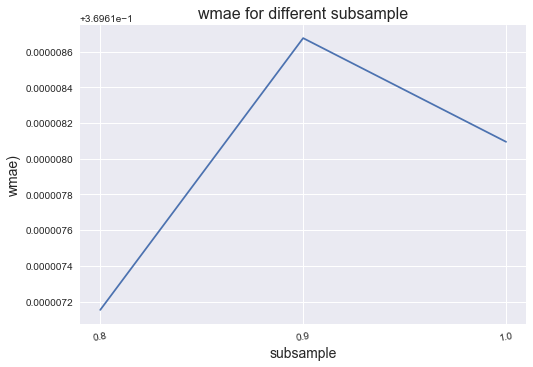

In [25]:
results_subsample = {}
for i in [0.8, 0.9, 1.0]:
    result = {}
    print('\n\n\n\nrunning while subsample = {}'.format(i))
    params={'booster': 'gblinear',
        'objective': 'reg:linear',
        'eta': 0.1,
        'depth': 10,
        'subsample': i,
        'min_child_weight': 5,
        'col_sample_bytree': 0.2,
        'seed': 0,
        'silent': 1,
        }

    watchlist = [(dataset_val, 'val'),(dataset_train,'train')]
    model = xgb.train(params,dataset_train,num_boost_round=5000,early_stopping_rounds=300,evals=watchlist, feval=wmae_xgb,maximize=False)
    pred_xgb = model.predict(dataset_val)
    
    result['predictions'] = pred_xgb
    result['wmae'] = wmae(y_test, pred_xgb)
    results_subsample['{}'.format(i)] = result
    
print(results_subsample)          # 76 negtive rows
plot_results(results_subsample, 'subsample') 

In [41]:
pred_xgb = model.predict(dataset_test)

In [42]:
baseline = pd.read_csv('other/submission_baseline.csv', header=None)[1].tolist()
predictions_rec = pred_xgb.tolist()
n = 0
for i in range(len(predictions_rec)):
    if predictions_rec[i] < 0:
        predictions_rec[i] = baseline[i]
        n += 1
print(n)

91


In [44]:
xgb_2 = pd.DataFrame()
xgb_2['shop_id'] = range(1, 3001)
xgb_2['pred_amt'] = predictions_rec
xgb_2.to_csv('xgb_2_rec.csv', header=False, index=None)

In [256]:
b = pd.read_csv('t_sales_sum.csv')
a = b[b['dt']=='2016-08-31'].groupby('shop_id')[['sale_amt_3m']].mean()
a.to_csv('091011.csv', header=None)               

**提交四：**9、10、11预测，test为**0.751966**

# 4、submit

In [265]:
xgb_lambda = pd.read_csv('xgb_0.csv', header=None)
for i in range(3000):
    xgb_lambda.iloc[i]['sale_amt_3m'] = round(results_lambda['0.25']['predictions'][i]+0.01,2)
xgb_lambda.to_csv('xgb_1.csv', header=None)  
xgb_lambda

,sale_amt_3m
shop_id,
1,225613.60
2,73110.96
3,222046.35
4,218815.90
5,133316.60
6,105455.84
7,70269.95
8,144102.29
9,30481.67


In [9]:
submission = pd.DataFrame()
submission['shop_id'] = range(1, 3001)
submission['pred_3m'] = results_lambda['0.25']['predictions']
submission.to_csv('xgb_1.csv', header=False, index=None, encoding='utf-8', sep=',')

NameError: name 'pred_amt' is not defined

In [245]:
import csv
lines = []
with open('xgb_0.csv') as f:
    spamreader = csv.reader(f, delimiter=',')
    for row in spamreader:
        line = []
        line.append(row[0])
        line.append(row[1])
        lines.append(line)
with open('xgb_1.csv', 'w', newline='') as f:
    spamwriter = csv.writer(f, delimiter=',')
    for line in lines:
        spamwriter.writerow(line)

In [8]:
a = pd.read_csv('xgb_0.csv', header=None)
a.columns = ['shop_id', 'pre_sale']
a_ = a.groupby('shop_id')[['pre_sale']].mean()
a_.to_csv('xgb_1.csv',header=None, encoding='utf-8')

**xgb预测结果存在负数，对其取后三月平均**

In [53]:
data_sales_sum = pd.read_csv('t_sales_sum.csv')
data_sales_sum_meanlast3month = data_sales_sum[data_sales_sum['dt']>'2016-11-29'].groupby('shop_id')[['sale_amt_3m']].mean()
data_sales_sum_meanlast3month.iloc[1147]['sale_amt_3m']

516914.87666666665

In [60]:
a = pd.read_csv('xgb_0.csv', header=None)
a.columns = ['shop_id', 'pre_sale']
list_neg = a[a['pre_sale']<0].index.tolist()
pre_sale = a['pre_sale'].tolist()
for i in list_neg:
    pre_sale[i] = data_sales_sum_meanlast3month.iloc[i]['sale_amt_3m']
a['pre_sale'] = pre_sale
a.to_csv('xgb_1.csv',header=False, index=None)

**提交五**，xgb（lambda=0.25，replace neg_value with average of last3month）,**0.985542**